# GSDMM Code for Text Analysis

# 1) Importing Libraries

Installing needed Libraries  and import all libraries which will be used in the code

In [ ]:
InstallFastText = False

In [ ]:
if InstallFastText : 
  !pip install fasttext

In [ ]:
pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-x74fk0ex
  Running command git clone -q https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-x74fk0ex


In [ ]:
if InstallFastText : 
  import fasttext.util
  fasttext.util.download_model('en', if_exists='ignore') 
  EnglishWE = fasttext.load_model('/content/cc.en.300.bin')

In [ ]:
import numpy as np 
import pandas as pd
from gsdmm import MovieGroupProcess
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy,re,os,nltk,random
from gensim.models.ldamulticore import LdaMulticore
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
! python -m spacy download en_core_web_sm
from nltk.corpus import stopwords
from tqdm import tqdm 
from wordcloud import WordCloud
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

import warnings,os,csv, nltk,spacy,re
from warnings import filterwarnings
filterwarnings('ignore')

nltk.download('punkt')
from nltk.tokenize import word_tokenize
regex = re.compile('[^a-zA-Z]')
nltk.download('stopwords')
from nltk.corpus import stopwords
StopWords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-26 19:25:55.093027: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 12.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2) Data Cleansing

In [ ]:
# import pandas as pd
# import os,re
# from tqdm import tqdm

Check HTML

In [ ]:
DataCleaning = False
if DataCleaning: 
  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0]!='_']
  HTMLWords = []
  for File in tqdm(DataFiles) : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
              'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    HTMLWords.extend( [ re.findall(r'<.*?>', str(i)) for i in data[ThisCol].tolist()])
  HTMLWords= [i for i in HTMLWords if len(i)>0]
  print(f'\nNumber of HTML Words : {len(HTMLWords)}')

Check <> existence

In [ ]:
if DataCleaning: 
  HTMLWords = []
  for File in tqdm(DataFiles) : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
              'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    HTMLWords.extend([i for i in data[ThisCol].tolist() if '<' in str(i)])
    HTMLWords.extend([i for i in data[ThisCol].tolist() if '>' in str(i)])
  print(f'\nHTML Words : {HTMLWords}')

Word TR

In [ ]:
if DataCleaning: 
  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0]=='C']
  HTMLWords = []
  for File in DataFiles : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
              'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    print(File)
    AllText = ' '.join([str(i) for i in data['CleanedText'].tolist()])
    TR = [i for i in AllText.split() if i.lower().strip() == 'tr' ]
    print(TR)
    print('----------------------------------')

write SW in Latex Format

In [ ]:
if DataCleaning : 
  CustomizedStopWords =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
                        'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
                        'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through','to', 'from', 'in',
                        'on', 'off', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such','only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
                        'will', 'just', 'don', "don't", 'should', "should've"]
  RemovedWords = ['&amp','amp','lia','li','ul','ol','blockquote','strong','table','font','image','someone','anyone','everyone','hello','hi','morning','can','use','evening','bye','b','em','mark','small','del','ins','sub','sup','tr']

  A = []
  A.extend(CustomizedStopWords)
  A.extend(RemovedWords)
  len(A)
  for k in range(0,150,10) : 
    print(' & '.join([i for i in A[k:k+10]]) + str(''))

Data Cleaning

In [ ]:
if DataCleaning: 
  CustomizedStopWords =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
                        'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
                        'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through','to', 'from', 'in',
                        'on', 'off', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such','only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
                        'will', 'just', 'don', "don't", 'should', "should've"]
  RemovedWords = ['&amp','amp','lia','li','ul','ol','blockquote','strong','table','font','image','someone','anyone','everyone','hello','hi','morning','can','use','evening','bye','b','em','mark','small','del','ins','sub','sup','tr']
  CustomizedStopWords.extend(RemovedWords)

  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  AllWordsWEDF = pd.read_csv(os.path.join(MainPath ,'0 Data','_AllWordsWE.csv'))
  EnglishWE = pd.read_csv(os.path.join(MainPath ,'0 Data','_EnglishWE.csv'))
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0]!='_']
  print(len(DataFiles))

  ValidEnglishWords = EnglishWE['Word'].tolist()
  print(len(ValidEnglishWords))
  print(AllWordsWEDF.shape,EnglishWE.shape)
  ##############################################################
  WordDict = {}
  for File in tqdm(DataFiles) : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
              'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    ThisFileWords = ' '.join([str(i).lower().strip() for i in data[ThisCol].tolist()])
    ThisFileWords = [re.sub('[^A-Za-z0-9]+', '',i) for i in ThisFileWords.split()]
    
    OriginalWords = list(set(ThisFileWords))
    AllTextSet = list(set(ThisFileWords) & set(ValidEnglishWords))
    RemovedWords = [i for i in OriginalWords if not i in AllTextSet]
    WordDict[File.split('.')[0]] = {'OriginalWords': OriginalWords,'CleanedWords' : AllTextSet,'RemovedWords' : RemovedWords}


  AllLists = []
  Columns = []
  AllRemovedWords = []
  for k,v in WordDict.items() : 
    AllRemovedWords.extend(v['RemovedWords'])
    for i,j in v.items() : 
      Columns.append(f'{k}_{i}')
      j.insert(0,len(j))
      AllLists.append(j)

  print(len(AllRemovedWords))  
  AllRemovedWords = list(set(AllRemovedWords))
  print(len(AllRemovedWords))  
  AllRemovedWords.insert(0,len(AllRemovedWords))
  Columns.append('AllRemovedWords')
  AllLists.append(AllRemovedWords)
  WordsDF = pd.DataFrame(AllLists,index= Columns).T
  WordsDF.to_csv(os.path.join(MainPath ,'0 Data',f'_WordsStatistics.csv'))    

  ##############################################################
  def DataCleaning(x,AllTextSet) : 
    x = ' '.join([str(i).lower().strip() for i in str(x).split()])
    x = ' '.join([i for i in x.split() if i in AllTextSet])
    return x
  for File in tqdm(DataFiles) : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
              'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    ThisFileWords = ' '.join([str(i).lower() for i in data[ThisCol].tolist()])
    AllTextSet = list(set(ThisFileWords.split()) & set(ValidEnglishWords))
    AllTextSet = [str(i) for i in AllTextSet if not i in RemovedWords]
    AllTextSet = [i for i in AllTextSet if not i in CustomizedStopWords]
    AllTextSet = [i for i in AllTextSet if  i.isalpha()]
    AllTextSet = [i for i in AllTextSet if  len(i) >1]
    
    data['CleanedText'] = data[ThisCol].apply(lambda x : DataCleaning(x,AllTextSet))
    data.to_csv(os.path.join(MainPath ,'0 Data',f'Cleaned_{File}'))

Data Cleaning Statistics Table

In [ ]:
DataCleaning = True
import pandas as pd
import os
import  numpy as np

In [ ]:
if DataCleaning: 
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data'
  Files = [i for i in os.listdir(Path) if i[:7] == 'Cleaned']

  ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
            'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}
  for j in range(1,6) : 
    SmallPhrases = {}
    for File in Files : 
      print(f'For file {File}')
      data = pd.read_csv(os.path.join(Path,File))
      FileName = str(File).replace('Cleaned_','')
      WordLengthBefore = [len(str(i).split()) for i in data[ColName[FileName]].tolist()]
      WordLengthAfter = [len(str(i).split()) for i in data['CleanedText'].tolist()]
      print(f'Before : Mean {np.mean(WordLengthBefore)} ,Min {np.min(WordLengthBefore)} ,Max {np.max(WordLengthBefore)} ,SD {np.std(WordLengthBefore)}  ')
      print(f'After : Mean {np.mean(WordLengthAfter)} ,Min {np.min(WordLengthAfter)} ,Max {np.max(WordLengthAfter)} ,SD {np.std(WordLengthAfter)} \n ')
      print('-------------------------------------------------------------')
      SmallPhrases[f'{FileName} BeforeCleaning'] = [str(i) for i in data[ColName[FileName]].tolist() if len(str(i).split()) <= j]
      SmallPhrases[f'{FileName} AfterCleaning'] = [str(i) for i in data['CleanedText'].tolist() if len(str(i).split()) <= j]
    pd.concat([pd.DataFrame([len(i) for i in SmallPhrases.values()],index=list(SmallPhrases.keys())).T,pd.DataFrame(list(SmallPhrases.values()),index=list(SmallPhrases.keys())).T],axis=0).to_csv(os.path.join(Path,f'_SmallWords_{j}.csv'))  

For file Cleaned_Orange TrustPilot Reviews.csv
Before : Mean 87.98597194388778 ,Min 2 ,Max 856 ,SD 111.98656967324956  
After : Mean 36.85871743486974 ,Min 2 ,Max 347 ,SD 45.84188079942591 
 
-------------------------------------------------------------
For file Cleaned_BTBusiness.csv
Before : Mean 130.61968085106383 ,Min 2 ,Max 1705 ,SD 154.04327775393102  
After : Mean 52.9813829787234 ,Min 2 ,Max 539 ,SD 60.712324576927365 
 
-------------------------------------------------------------
For file Cleaned_VirginMedia TrustPilot Reviews.csv
Before : Mean 78.04797979797979 ,Min 2 ,Max 932 ,SD 90.85738753484033  
After : Mean 34.32020202020202 ,Min 2 ,Max 365 ,SD 38.032037212127385 
 
-------------------------------------------------------------
For file Cleaned_BT Forums Community.csv
Before : Mean 98.99734395750332 ,Min 2 ,Max 1156 ,SD 97.72243666497268  
After : Mean 40.43691899070385 ,Min 2 ,Max 541 ,SD 39.624134690901876 
 
-----------------------------------------------------------

Check if one-word sentence

In [ ]:
if DataCleaning: 
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data'
  Files = [i for i in os.listdir(Path) if i[:7] == 'Cleaned']

  ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
            'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}

  for File in Files : 
    data = pd.read_csv(os.path.join(Path,File))
    OriginalShape =  data.shape[0]
    data['WordLength'] = data['CleanedText'].apply(lambda x : len(str(x).split()))
    data = data[data['WordLength']>1]
    print(f'for {File}  Dropped : {OriginalShape - data.shape[0]} rows')
    data.reset_index(inplace=True)
    data.to_csv(os.path.join(Path,File))
# for Cleaned_Vodafone Final Reviews.csv  Dropped : 4 rows
# for Cleaned_BT TrustPilot Reviews.csv  Dropped : 7 rows
# for Cleaned_VirginMedia TrustPilot Reviews.csv  Dropped : 20 rows
# for Cleaned_BT Forums Community.csv  Dropped : 8 rows
# for Cleaned_Orange TrustPilot Reviews.csv  Dropped : 134 rows
# for Cleaned_BTBusiness.csv  Dropped : 4 rows

In [ ]:
if DataCleaning: 
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data'
  Files = [i for i in os.listdir(Path) if i[:7] == 'Cleaned']

  ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
            'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}

  for File in Files : 
    data = pd.read_csv(os.path.join(Path,File))
    OriginalShape =  data.shape[0]
    data['WordLength'] = data['CleanedText'].apply(lambda x : len(str(x).split()))
    data = data[data['WordLength']>1]
    print(f'for {File}  Dropped : {OriginalShape - data.shape[0]} rows')
    data.reset_index(inplace=True)
    data.to_csv(os.path.join(Path,File))


# for Cleaned_Vodafone Final Reviews.csv  Dropped : 0 rows
# for Cleaned_BT TrustPilot Reviews.csv  Dropped : 0 rows
# for Cleaned_VirginMedia TrustPilot Reviews.csv  Dropped : 0 rows
# for Cleaned_BT Forums Community.csv  Dropped : 0 rows
# for Cleaned_Orange TrustPilot Reviews.csv  Dropped : 0 rows
# for Cleaned_BTBusiness.csv  Dropped : 0 rows    

# 3) Defining Functions

In [ ]:

# Gensims Functions
# all gensim functions which used to generate GSDMMM topic modeling
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text      

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out      
def top_words(mgp,cluster_word_distribution, top_cluster, values):
  Text = ''
  TheseResults = []
  for cluster in top_cluster:
    sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
    Text+= "\nCluster %s : %s"%(cluster,sort_dicts)
    TheseResults.append([cluster,sort_dicts])
  return Text,TheseResults  

In [ ]:
def WordDifference(Word1,Word2) :
  global SavedWords
  Word1,Word2 = Word1.lower(),Word2.lower()
  if not  Word1 in SavedWords.keys() or not  Word2 in SavedWords.keys() : print('Word not found')
  ThisResult = np.linalg.norm(np.array(SavedWords[Word1])-np.array(SavedWords[Word2]), ord = 2) 
  return ThisResult

In [ ]:
# Cleaning Clusters
# clean data before processed by topic modeling
def ClusterClean(x) : 
  if ',' in str(x) : 
    List = [re.sub('[^A-Za-z0-9,]+', '', i).split(',')  for i in x.split('),')]
    List = [[i[0],int(i[1])] for i in List]
    # List = [i  for i in x.split('),')]
    ThisList = []
    for l in range(0,len(List),2) : 
      if l < len(List)-1 : 
        ThisList.append((List[l],List[l+1]))

    return List
  else :
    return x

In [ ]:
# Applying GSDMM
# applying gsdmm model through several steps
MainPath,SelectedData = None,None
def ApplyGSDMM(K): 
  global MainPath,SelectedData
  if  os.path.exists(os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {K}.csv')) :
     print(f'Cluster {K} Exists')
     return None
  print(f'Applying for Cluster {K}')
  tokens_reviews = list(sent_to_words(data['CleanedText']))
  tokens_reviews = make_n_grams(tokens_reviews)
  reviews_lemmatized = lemmatization(tokens_reviews, allowed_postags=['NOUN', 'VERB', 'ADV'])
  reviews_lemmatized = remove_stopwords(reviews_lemmatized)
  print(reviews_lemmatized)
  np.random.seed(0)
  Results =[]
  X = 0
  
  for Alpha in list(np.linspace(0.05,1,20)) :  # using different values for alpha
    for Beta in list(np.linspace(0.05,1,20)) : # using different values for beta
      X+=1
      print(f'Phase Number {X}')
      mgp = MovieGroupProcess(K=K, alpha=Alpha, beta=Beta, n_iters=30)
      vocab = set(x for review in reviews_lemmatized for x in review)
      n_terms = len(vocab)
      model = mgp.fit(reviews_lemmatized, n_terms)
      doc_count = np.array(mgp.cluster_doc_count)
      top_index = doc_count.argsort()[-10:][::-1]
      Loss =0
      for i in range(K) : 
        Loss += abs((1/K)-(doc_count[i]/sum(doc_count)))
      Results.append({'Parameters' : [Alpha,Beta],
                      'Loss':Loss,
                      'Doc Number':doc_count,
                      'Top Index':doc_count.argsort()[-10:][::-1],
                      'Top Words' : top_words(mgp,mgp.cluster_word_distribution, top_index, 10)[0],
                      'All Words' : top_words(mgp,mgp.cluster_word_distribution, top_index, 100)[1]})
  
  
  ResultsDF = pd.DataFrame(columns = ['Parameters', 'Loss', 'Doc Number', 'Top Index', 'Top Words', 'All Words'])
  for n,i in enumerate(Results) : 
    ResultsDF.loc[n] = list(i.values())
  ResultsDF  
  TotalCluster = [f'Cluster {i}' for i in range(K)]
  for j in TotalCluster : 
    ResultsDF[j] =ResultsDF['Top Words'].apply(lambda x : [i for i in str(x.strip('\n')).split('\n') if j in i][0].strip(f'{j} : ').strip('[]'))
  
  for j in range(K) : 
    ResultsDF[f'All Cluster {j}'] = ResultsDF['All Words'].apply(lambda x : [i[1] for i in x if i[0]==j])
  if not os.path.exists(os.path.join(MainPath,SelectedData,'01 GSDMMFiles')) :  os.makedirs(os.path.join(MainPath,SelectedData,'01 GSDMMFiles'))
  ResultsDF.to_csv(os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {K}.csv'))  # saving in 01 folder
  return Results

BCV :  Euclidean Equation


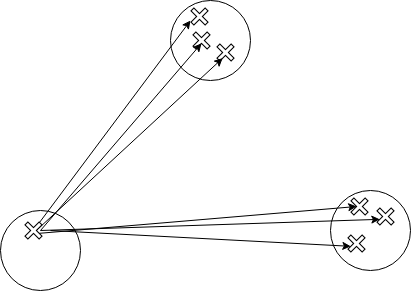



---



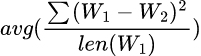





In [ ]:
EmptySentences = {}
EmptySentencesIndex = 0
def ClustersCostFunctionAllWords(Clusters,ShowResults = True) : 
  global GetAllWords,SavedWords
  global EmptySentences,EmptySentencesIndex
  
  ClustersDiffs = []
  BetweenDiffs = []
  if ShowResults : print('Calculating Within Clusters Variance')
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    AllWords = Cl.split("'")[1::2]
    if len(AllWords) > 5 : 
      Diffs = []
      for i in range(len(AllWords)-1) : 
        for j in range(i+1,len(AllWords)) : 
          if AllWords[i] in SavedWords.keys() and AllWords[j] in SavedWords.keys() : 
            Diffs.append(float(WordDifference(AllWords[i],AllWords[j])))
          else : 
            Diffs.append(0)
      if len(Diffs) <= 1 : 
        EmptySentencesIndex+=1
        EmptySentences[EmptySentencesIndex] = ['AllWords_Within',Clusters]
        print(f'Total Empty Sentence {EmptySentencesIndex}')
      ClustersDiffs.append(np.mean(Diffs))
      
  ClusterWords = []
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
  if ShowResults : print('Calculating Between Clusters Variance')
  for i in range(len(ClusterWords)) : 
    TheseWords = ClusterWords[i]
    ExList = [j for j in range(len(ClusterWords)) if j != i]
    OtherWords = []
    for k in ExList : 
      OtherWords.extend(ClusterWords[k])
    
    for Word1 in TheseWords : 
      for Word2 in OtherWords : 
        if Word1 in SavedWords.keys() and Word2 in SavedWords.keys() : 
          BetweenDiffs.append(float(WordDifference(Word1,Word2)))
        else : 
          BetweenDiffs.append(0)
  F1 = np.mean(BetweenDiffs)
  F2 = np.mean(ClustersDiffs)

  if len(ClustersDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['AllWords_Within',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}')
  if len(BetweenDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['AllWords_Between',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}') 
  if ShowResults : print(f'Between Clusters Variance is {F1} and Within Clusters Variance is {F2}')
  return F1,F2    

BCV : Mean Equation


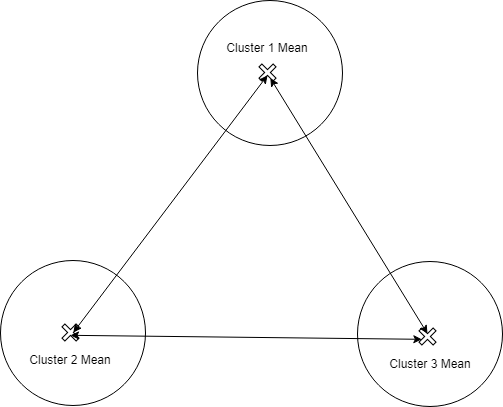


---

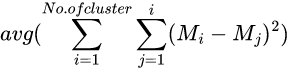

In [ ]:
def ClustersCostFunctionMean(Clusters,ShowResults = True) : 
  global GetAllWords,SavedWords
  ClustersDiffs = []
  BetweenDiffs = []
  if ShowResults : print('Calculating Within Clusters Variance')
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    AllWords = Cl.split("'")[1::2]
    if len(AllWords) > 5 : 
      Diffs = []
      for i in range(len(AllWords)-1) : 
        for j in range(i+1,len(AllWords)) : 
          if AllWords[i] in SavedWords.keys() and AllWords[j] in SavedWords.keys() : 
            Diffs.append(float(WordDifference(AllWords[i],AllWords[j])))
          else : 
            Diffs.append(0)
      ClustersDiffs.append(np.mean(Diffs))
  ClusterWords = []
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
  if ShowResults : print('Calculating Between Clusters Variance')

  TheseWordsValuesMean = []
  for i in range(len(ClusterWords)) : 
    TheseWords = ClusterWords[i]
    for EachWord in TheseWords : 
      EachWord = EachWord.lower()
      if not EachWord in SavedWords.keys() : 
        if EachWord in EnglishWE.keys()  : 
          SavedWords[EachWord] = [i for i in EnglishWE[EachWord]]
        else : 
          SavedWords[EachWord] = [0 for i in range(300)]
    TheseWordsValues = [SavedWords[i] for i in TheseWords]
    if len(TheseWordsValues) > 0 : 
      TheseWordsValuesMean.append([np.matrix(TheseWordsValues).T[i].mean() for i in range(300)])
  
  for a in range(len(TheseWordsValuesMean)) : 
    for b in range(a+1,len(TheseWordsValuesMean)) : 
      BetweenDiffs.append(sum([(float(g)-float(m))**2 for g,m in zip(TheseWordsValuesMean[a],TheseWordsValuesMean[b])]))

  F1 = np.mean(BetweenDiffs)
  F2 = np.mean(ClustersDiffs)
  global EmptySentences,EmptySentencesIndex
  if len(ClustersDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Mean_Within',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}')
  if len(BetweenDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Mean_Between',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}') 
  if ShowResults : print(f'Between Clusters Variance is {F1} and Within Clusters Variance is {F2}')
  return F1,F2  

BCV : Min Equation

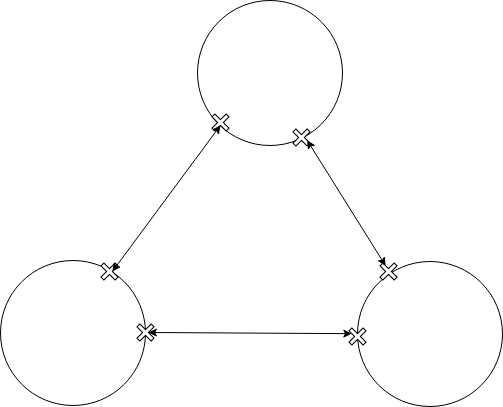

---


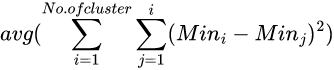


In [ ]:
def ClustersCostFunctionMin(Clusters,ShowResults = True) : 
  global GetAllWords,SavedWords
  ClustersDiffs = []
  BetweenDiffs = []
  if ShowResults : print('Calculating Within Clusters Variance')
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    AllWords = Cl.split("'")[1::2]
    if len(AllWords) > 5 : 
      Diffs = []
      for i in range(len(AllWords)-1) : 
        for j in range(i+1,len(AllWords)) : 
          if AllWords[i] in SavedWords.keys() and AllWords[j] in SavedWords.keys() : 
            Diffs.append(float(WordDifference(AllWords[i],AllWords[j])))
          else : 
            Diffs.append(0)
      ClustersDiffs.append(np.mean(Diffs))
  ClusterWords = []
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
  if ShowResults : print('Calculating Between Clusters Variance')
  AllTheseWords = []
  for i in range(len(ClusterWords)) : 
    TheseWords = ClusterWords[i]
    for EachWord in TheseWords : 
      EachWord = EachWord.lower()
      if not EachWord in SavedWords.keys() : 
        if EachWord in EnglishWE.keys()  : 
          SavedWords[EachWord] = [i for i in EnglishWE[EachWord]]
        else : 
          SavedWords[EachWord] = [0 for i in range(300)]
    TheseWordsValues = [SavedWords[i] for i in TheseWords]
    AllTheseWords.append(TheseWordsValues)
  for EachGroup in AllTheseWords : 
    for OtherGroup in [Group for Group in AllTheseWords if Group != EachGroup ] : 
      GroupsWordsDiff = []
      for WordA in  EachGroup : 
        for WordB in OtherGroup : 
          if WordA != WordB : 
            GroupsWordsDiff.append(sum([(float(g)-float(m))**2 for g,m in zip(WordA,WordB)]))
      if len(GroupsWordsDiff) > 0 : BetweenDiffs.append(min(GroupsWordsDiff))

  F1 = np.mean(BetweenDiffs)
  F2 = np.mean(ClustersDiffs)
  global EmptySentences,EmptySentencesIndex
  if len(ClustersDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Min_Within',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}')
  if len(BetweenDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Min_Between',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}') 
  if ShowResults : print(f'Between Clusters Variance is {F1} and Within Clusters Variance is {F2}')
  return F1,F2    

BCV : Max Equation : 


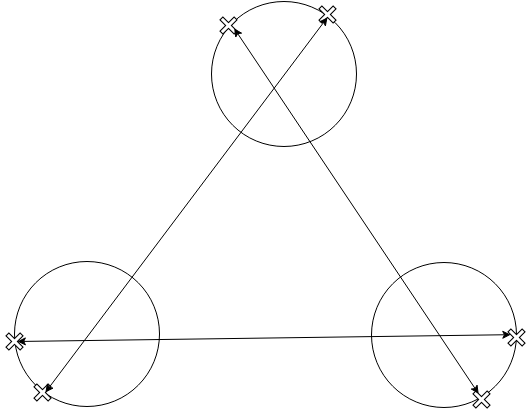


---


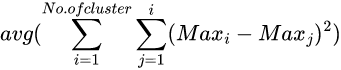



In [ ]:
def ClustersCostFunctionMax(Clusters,ShowResults = True) : 
  global GetAllWords,SavedWords
  ClustersDiffs = []
  BetweenDiffs = []
  if ShowResults : print('Calculating Within Clusters Variance')
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    AllWords = Cl.split("'")[1::2]
    if len(AllWords) > 5 : 
      Diffs = []
      for i in range(len(AllWords)-1) : 
        for j in range(i+1,len(AllWords)) : 
          if AllWords[i] in SavedWords.keys() and AllWords[j] in SavedWords.keys() : 
            Diffs.append(float(WordDifference(AllWords[i],AllWords[j])))
          else : 
            Diffs.append(0)
      ClustersDiffs.append(np.mean(Diffs))
  ClusterWords = []
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
  if ShowResults : print('Calculating Between Clusters Variance')

  AllTheseWords = []
  for i in range(len(ClusterWords)) : 
    TheseWords = ClusterWords[i]
    for EachWord in TheseWords : 
      EachWord = EachWord.lower()
      if not EachWord in SavedWords.keys() : 
        if EachWord in EnglishWE.keys()  : 
          SavedWords[EachWord] = [i for i in EnglishWE[EachWord]]
        else : 
          SavedWords[EachWord] = [0 for i in range(300)]
    TheseWordsValues = [SavedWords[i] for i in TheseWords]
    AllTheseWords.append(TheseWordsValues)
  for EachGroup in AllTheseWords : 
    for OtherGroup in [Group for Group in AllTheseWords if Group != EachGroup ] : 
      GroupsWordsDiff = []
      for WordA in  EachGroup : 
        for WordB in OtherGroup : 
          if WordA != WordB : 
            GroupsWordsDiff.append(sum([(float(g)-float(m))**2 for g,m in zip(WordA,WordB)]))
      
      if len(GroupsWordsDiff) > 0 : BetweenDiffs.append(max(GroupsWordsDiff))
  F1 = np.mean(BetweenDiffs)
  F2 = np.mean(ClustersDiffs)
  global EmptySentences,EmptySentencesIndex
  if len(ClustersDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Max_Within',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}')
  if len(BetweenDiffs) <= 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Max_Between',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}') 
  if ShowResults : print(f'Between Clusters Variance is {F1} and Within Clusters Variance is {F2}')
  return F1,F2    

Coherence CF

In [ ]:
def ClustersCostFunctionCoherence(Clusters,ShowResults = True) : 
  ClusterWords = []
  for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
    if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
  if ShowResults : print('Calculating Between Clusters Variance')
  AllTheseDict = {}
  for i in range(len(ClusterWords)) : 
    TheseWords = ClusterWords[i]
    TheseWords = [k.lower().strip() for k in TheseWords]
    AllTheseDict[i] = TheseWords
  AllCoherence = []
  for a in range(len(list(AllTheseDict.keys()))) : 
    for b in range(a+1,len(list(AllTheseDict.keys()))) : 
      if len(AllTheseDict[a]) > 1 and len(AllTheseDict[b])> 1 : 
        topics = [AllTheseDict[a],AllTheseDict[b]]
        AllNeededWords = []
        AllNeededWords.extend(AllTheseDict[a])
        AllNeededWords.extend(AllTheseDict[b])
        gensim_dictionary = corpora.Dictionary()
        for i,w in enumerate(AllNeededWords) : 
          common_dictionary.token2id[w] = i
          gensim_dictionary.token2id[w] = i
        common_corpus = [gensim_dictionary.doc2bow(text) for text in topics]
        cm = CoherenceModel(topics=topics, corpus=common_corpus, dictionary=common_dictionary, coherence='u_mass') 
        coherence = cm.get_coherence() 
        AllCoherence.append(float(coherence))

  global EmptySentences,EmptySentencesIndex
  if len(AllCoherence) < 1 : 
    EmptySentencesIndex+=1
    EmptySentences[EmptySentencesIndex] = ['Coherence',Clusters]
    print(f'Total Empty Sentence {EmptySentencesIndex}')

  if len(AllCoherence) > 0 : 
    return np.mean(AllCoherence)
  else : 
    return 0.0



# 4) Reading Data

Read data files and other needed files

In [ ]:
MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
AllWordsWEDF = pd.read_csv(os.path.join(MainPath ,'0 Data','_AllWordsWE.csv'))
DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
DataFiles = [i for i in DataFiles if i[0:7]=='Cleaned']
DataFiles

['Cleaned_Orange TrustPilot Reviews.csv',
 'Cleaned_BT Forums Community.csv',
 'Cleaned_BTBusiness.csv',
 'Cleaned_VirginMedia TrustPilot Reviews.csv',
 'Cleaned_Vodafone Final Reviews.csv',
 'Cleaned_BT TrustPilot Reviews.csv']

In [ ]:
AllWordsWEDF.shape

(13150, 302)

In [ ]:
SelectedData = 'Cleaned_BTBusiness.csv'
data = pd.read_csv(os.path.join(MainPath,'0 Data',SelectedData))
SelectedData= SelectedData.split('.')[0].split('_')[1]
data.head()

,Unnamed: 0,level_0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Title,Link,Description,Day,Month,Year,Hour,Creator,Topic,CleanedText,WordLength
0,0,0,0,0,0,0,Phone line topics,https://business.forums.bt.com/t5/Phone-line/b...,Phone line topics,28,Mar,2022,18,Phone-systems,Phone-systems,phone line topics,3
1,1,1,1,1,1,1,Number suddenly ported to the cloud because of...,https://business.forums.bt.com/t5/Phone-line/N...,We've been a BT customer for well over 40 year...,24,Mar,2022,19,mji1,Phone-systems,bt customer well over telephones restaurant bu...,227
2,2,2,2,2,2,2,Frequently Asked Questions - Phone lines,https://business.forums.bt.com/t5/Phone-line/F...,STRONG How do I do proper telephone line check...,24,Mar,2022,11,BethM,Phone-systems,proper telephone line checking wiring issues p...,19
3,3,3,3,3,3,3,BT Business and Yealink DECT IP Phone W56H - C...,https://business.forums.bt.com/t5/Phone-line/B...,I have been successfully using my pin number t...,23,Mar,2022,17,JMakunde,Phone-systems,successfully using pin number access voice mes...,30
4,4,4,4,4,4,4,My Organisation's landline seems to have been ...,https://business.forums.bt.com/t5/Phone-line/M...,I am posting this here as i can't find any inf...,16,Mar,2022,10,Mark36,Phone-systems,posting find information online number emergen...,33


In [ ]:
AllWordsWEDF

,Unnamed: 0,Word,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,intelligence,-0.039600,0.012034,0.033639,0.001810,-0.020430,-0.060765,0.031610,-0.016949,...,0.027104,-0.010242,-0.016732,-0.027142,0.010277,0.003018,-0.004028,0.054435,0.003422,0.045983
1,1,depression,0.004949,-0.011027,0.010456,0.015319,-0.022187,-0.015624,0.022220,0.032474,...,0.012749,0.023130,-0.039826,0.007452,-0.034503,0.014328,-0.021100,0.048555,-0.013832,0.035723
2,2,struggling,-0.045228,-0.031944,0.021103,0.031503,-0.027489,0.026314,0.002070,-0.010945,...,-0.013659,0.044654,-0.030316,0.000690,-0.044235,-0.004485,-0.011587,0.026413,0.041287,0.029917
3,3,digging,-0.012862,-0.037650,0.104086,0.058724,0.018422,0.017858,-0.037077,-0.009809,...,0.018607,-0.083788,-0.056141,-0.028351,-0.001951,0.031245,-0.096252,0.056746,0.003492,-0.009233
4,4,stateof,-0.046541,-0.080600,0.030734,-0.029795,-0.115020,-0.012623,0.052024,0.037695,...,0.012097,0.045391,-0.050226,0.007966,-0.009850,-0.082594,0.022340,0.013933,-0.021022,0.000470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,13145,pensions,-0.041018,-0.026982,0.020721,0.021009,-0.062561,0.084143,0.035531,0.052674,...,-0.023579,0.076845,-0.070934,0.049994,0.017827,0.006968,0.078676,0.066093,0.075547,-0.008346
13146,13146,entering,-0.004147,-0.007018,0.027332,0.047578,0.004806,0.014130,-0.006545,-0.010432,...,-0.008038,0.005229,-0.036507,0.037145,0.010837,-0.051557,-0.020004,-0.005943,0.032385,-0.006952
13147,13147,process,-0.005326,-0.043743,0.056301,0.024296,-0.044747,-0.014962,0.011513,-0.020239,...,0.033516,-0.006007,-0.021965,0.048916,-0.062956,0.000207,0.025076,0.078896,-0.034493,0.055268
13148,13148,soup,0.086494,-0.034879,0.033680,0.135005,0.100521,0.012003,0.112352,-0.098445,...,-0.055727,0.028216,-0.210460,-0.049721,0.012702,0.013785,0.002381,0.186352,0.039673,-0.106732


In [ ]:
# Word Embedding
# get the embedding value for english words
EnglishWE = {k:v for k,v in zip(AllWordsWEDF['Word'].tolist(),[AllWordsWEDF.loc[j,:].tolist()[2:] for j in range(AllWordsWEDF.shape[0])])}
print(len(list(EnglishWE.keys())))
 

13150


# 5) Applying GSDMM

In [ ]:
# applying gsdmm topic modeling
TrainTheModel = False
if TrainTheModel : 
  # ApplyGSDMM(3)
  # ApplyGSDMM(4)
  ApplyGSDMM(5)
  # ApplyGSDMM(6)
  # ApplyGSDMM(7)
  # ApplyGSDMM(8)
  # ApplyGSDMM(9)
  # ApplyGSDMM(10)


# 6) Evaluation Methods

Testing Coherence : c_uci

In [ ]:
# Clusters = SortedResults[0]

# ClusterWords = []
# for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
#   if len(Cl.split("'")[1::2]) > 5  : ClusterWords.append(Cl.split("'")[1::2])    
# AllTheseDict = {}
# for i in range(len(ClusterWords)) : 
#   TheseWords = ClusterWords[i]
#   TheseWords = [k.lower().strip() for k in TheseWords]
#   AllTheseDict[i] = TheseWords
# AllCoherence = []

# for a in range(len(list(AllTheseDict.keys()))) : # 0 ,1 ,2 , 3
#   for b in range(a+1,len(list(AllTheseDict.keys()))) : 
#     if len(AllTheseDict[a]) > 1 and len(AllTheseDict[b])> 1 : 
#       topics = [AllTheseDict[a],AllTheseDict[b]]
#       AllNeededWords = []
#       AllNeededWords.extend(AllTheseDict[a])
#       AllNeededWords.extend(AllTheseDict[b])
#       gensim_dictionary = corpora.Dictionary()
#       for i,w in enumerate(AllNeededWords) : 
#         common_dictionary.token2id[w] = i
#         gensim_dictionary.token2id[w] = i
#       common_corpus = [gensim_dictionary.doc2bow(text) for text in topics]
#       cm = CoherenceModel(topics=topics, texts=' '.join([str(i) for i in data['CleanedText'].tolist()]), dictionary=common_dictionary, coherence='c_uci')  
      
#       coherence = cm.get_coherence() 
#       AllCoherence.append(float(coherence))
# AllCoherence      

### 5.6) Apply CFs

In [ ]:
GetAllWords = []
for w in tqdm(range(3,11)) : 
  ThisFile =os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {w}.csv')
  

  if os.path.exists(ThisFile) : 
    ResultsData = pd.read_csv(ThisFile)  
    for i in range(w) : 
      ResultsData[f'Cluster {i}'] = ResultsData[f'Cluster {i}'].apply(lambda x :  ClusterClean(x))
    for i in ResultsData['Top Words'].tolist() : 
      for j in i.split('Cluster')[1:] : 
        GetAllWords.extend(j.split("'")[1::2]) 
print(f'\nTotal Number of Unique Words {str(len(set(GetAllWords)))}')
p = 0
for i in set(GetAllWords) : 
  if i in EnglishWE.keys() : 
    p+=1
print(f'Number of Exist Words is {p} and Percentage of Words Exists in English Words {100*np.round(p/len(set(GetAllWords)),3)} %')
SavedWords = {}
for word in GetAllWords : 
  if word in EnglishWE.keys() : 
    SavedWords[word] = [i for i in EnglishWE[word]]
print(f'Number of Words in SavedWords {len(list(SavedWords.keys()))} ')

100%|██████████| 8/8 [00:00<00:00, 34.95it/s]



Total Number of Unique Words 201
Number of Exist Words is 194 and Percentage of Words Exists in English Words 96.5 %
Number of Words in SavedWords 194 


In [ ]:
Evaluate = False
if Evaluate : 
  for w in range(3,11) : 
    ThisFile = os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {w}.csv')

    if os.path.exists(ThisFile) : 
      ResultsData = pd.read_csv(ThisFile)  
      ResultsData['Parameters'] = ResultsData['Parameters'].apply(lambda x : [float(i) for i in x.strip('[]').split(',')])
      ResultsData['Doc Number'] = ResultsData['Doc Number'].apply(lambda x : [int(i) for i in x.strip('[]').split()])
      ResultsData['Top Index'] = ResultsData['Top Index'].apply(lambda x : [int(i) for i in x.strip('[]').split()])
      Losses = ResultsData['Loss'].tolist()
      Losses.sort()
      for i in range(w) : 
        ResultsData[f'Cluster {i}'] = ResultsData[f'Cluster {i}'].apply(lambda x :  ClusterClean(x))
      Losses = ResultsData['Loss'].tolist()
      Losses.sort()

      SortedResults = []
      for Loss in Losses : 
        for i in range(ResultsData.shape[0]) :
          if Loss ==ResultsData['Loss'][i] : 
            SortedResults.append({k:v for k,v in zip(list(ResultsData.keys()),[ResultsData[j][i] for j in list(ResultsData.keys())])})

      for i in tqdm (range(len(SortedResults))) : 
        for Cl in SortedResults[i]['Top Words'].split('Cluster')[1:] : 
          AllWords = Cl.split("'")[1::2]
      
      CostFunctionResults = {}
      for i in tqdm (range(len(SortedResults))) : 
        ThisClusterValue = list(ClustersCostFunctionAllWords(SortedResults[i],ShowResults=False))
        CostFunctionResults[i] = {'AllBCV':ThisClusterValue[0],'AllWCV':ThisClusterValue[1]}
    
      for i in tqdm (range(len(SortedResults))) : 
        ThisClusterValue = list(ClustersCostFunctionMean(SortedResults[i],ShowResults=False))
        CostFunctionResults[i]['MeanBCV'] = ThisClusterValue[0]
        CostFunctionResults[i]['MeanWCV'] = ThisClusterValue[1]
    
      for i in tqdm (range(len(SortedResults))) : 
        ThisClusterValue = list(ClustersCostFunctionMin(SortedResults[i],ShowResults=False))
        CostFunctionResults[i]['MinBCV'] = ThisClusterValue[0]
        CostFunctionResults[i]['MinWCV'] = ThisClusterValue[1]

      for i in tqdm (range(len(SortedResults))) : 
        ThisClusterValue = list(ClustersCostFunctionMax(SortedResults[i],ShowResults=False))
        CostFunctionResults[i]['MaxBCV'] = ThisClusterValue[0]
        CostFunctionResults[i]['MaxWCV'] = ThisClusterValue[1]
        CostFunctionResults[i]['CohBCV'] = ClustersCostFunctionCoherence(SortedResults[i],ShowResults=False)


      for i in tqdm(CostFunctionResults.keys()): 
        AllBCV =  CostFunctionResults[i]['AllBCV']
        AllWCV =  CostFunctionResults[i]['AllWCV']
        MeanBCV =  CostFunctionResults[i]['MeanBCV']
        MinBCV =  CostFunctionResults[i]['MinBCV']
        MaxBCV =  CostFunctionResults[i]['MaxBCV']    
        CohBCV = CostFunctionResults[i]['CohBCV']                 

        ThisAllD,ThisMeanD,ThisMinD,ThisMaxD,ThisCohD = {},{},{},{},{}
        l=0
        for a in np.linspace(0.01, 1, num=5) : 
          for b in np.linspace(0.01, 1, num=5): 
            l+=1
            ThisAllD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(AllBCV))]
            ThisMeanD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MeanBCV))]
            ThisMinD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MinBCV))]
            ThisMaxD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MaxBCV))]
            ThisCohD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(CohBCV))]
        CostFunctionResults[i]['AllCF'] = ThisAllD
        CostFunctionResults[i]['MeanCF'] = ThisMeanD
        CostFunctionResults[i]['MinCF'] = ThisMinD
        CostFunctionResults[i]['MaxCF'] = ThisMaxD
        CostFunctionResults[i]['CohCF'] = ThisCohD
      for i in range(len(SortedResults)) : 
        for Item in ['AllBCV','AllWCV','MeanBCV','MinWCV','MaxBCV','MeanWCV','MinBCV','MaxWCV','CohBCV','AllCF','MeanCF','MinCF','MaxCF','CohCF'] : 
          SortedResults[i][Item] = CostFunctionResults[i][Item]

      Alpha,Beta,A,B,AllBCV,MeanBCV,MinBCV,MaxBCV,CohBCV,WCV,IDs,AllCF,MeanCF,MinCF,MaxCF,CohCF = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
      n=0
      for i in SortedResults : 
        for k in i['MeanCF'].values() : 
          MeanCF.append(k[2])
        for k in i['MinCF'].values() : 
          MinCF.append(k[2])
        for k in i['MaxCF'].values() : 
          MaxCF.append(k[2])      
        for k in i['CohCF'].values() : 
          CohCF.append(k[2])      
        for j,k in i['AllCF'].items() : 
          n+=1
          IDs.append(n)
          AllCF.append(k[2])
          AllBCV.append(i['AllBCV'])
          MeanBCV.append(i['MeanBCV'])
          MinBCV.append(i['MinBCV'])
          MaxBCV.append(i['MaxBCV'])
          CohBCV.append(i['CohBCV'])
          WCV.append(i['AllWCV'])
          A.append(k[0])
          B.append(k[1])
          Alpha.append(i['Parameters'][0])
          Beta.append(i['Parameters'][1])

      ResultsDF = pd.DataFrame(list(zip(IDs,Alpha,Beta,A,B,WCV,AllBCV,AllCF,MeanBCV,MeanCF,MinBCV,MinCF,MaxBCV,MaxCF,CohBCV,CohCF)),columns = ['IDs','Alpha','Beta','A','B','WCV','AllBCV','AllCF','MeanBCV','MeanCF','MinBCV','MinCF','MaxBCV','MaxCF','CohBCV','CohCF'])
      if not os.path.exists(os.path.join(MainPath,SelectedData,'02 Result DF'))  :  os.makedirs(os.path.join(MainPath,SelectedData,'02 Result DF'))
      ResultsDF.to_csv(os.path.join(MainPath,SelectedData,'02 Result DF' ,f'ResultsDF{w}.csv'))

In [ ]:
if Evaluate : 
  for w in range(3,11) : 
    ThisFile = os.path.join(MainPath,SelectedData,'02 Result DF' ,f'ResultsDF{w}.csv')
    if not os.path.exists(os.path.join(MainPath,SelectedData,'03 Best Values')) :  os.makedirs(os.path.join(MainPath,SelectedData,'03 Best Values'))
    if os.path.exists(ThisFile) : 
      ResultsDF = pd.read_csv(ThisFile) 
      if 'index' in ResultsDF.columns : ResultsDF.drop(['index'],axis=1,inplace=True)
      if 'Unnamed: 0' in ResultsDF.columns : ResultsDF.drop(['Unnamed: 0'],axis=1,inplace=True)
      CalculatedCFs = ['AllCF','MeanCF','MinCF','MaxCF','CohCF']
      CFsDataFrame = pd.DataFrame()
      for CF in CalculatedCFs : 
        ResultLists = []
        for A in ResultsDF['A'].unique() : 
          for B in ResultsDF['B'].unique() : 
            MinCF = ResultsDF[ResultsDF['A'] == A][ResultsDF['B'] == B][CF].min()
            ThisList = ResultsDF[ResultsDF[CF] == MinCF].iloc[0,:].tolist()
            ResultLists.append([ThisList[0]] + ThisList[3:5]+ThisList[1:3]+ThisList[5:])
        col_names = ['Trial Number','A','B','Alpha','Beta','WCV','AllBCV','AllCF','MeanBCV','MeanCF','MinBCV','MinCF','MaxBCV','MaxCF','CohBCV','CohCF']
        
        ThisCFsDataFrame = pd.DataFrame(ResultLists, columns=col_names)
        ThisCFsDataFrame['SelectedCF'] = CF
        print(tabulate(ResultLists, headers=col_names, tablefmt="fancy_grid"))
        CFsDataFrame = pd.concat([CFsDataFrame,ThisCFsDataFrame],axis=0)
      CFsDataFrame.to_csv(os.path.join(MainPath,SelectedData,'03 Best Values',f'BestCFValue{w}.csv'))        

In [ ]:
if Evaluate : 
  Paths = [os.path.join(MainPath,SelectedData,'02 Result DF')  ,os.path.join(MainPath,SelectedData,'03 Best Values')]
  for Path in Paths : 
    if len(Path) > 1 : 
      for File in os.listdir(Path) : 
        ThisFile = os.path.join(Path,File)
        data = pd.read_csv(ThisFile)
        print(f'for file {File} Number of Nulss is {set(data.isna().sum().values)}')

### 5.6) Evaluation Methods

In [ ]:
if Evaluate : 
  for w in range(3,11) : 
    ThisFile =os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{w}.csv')
    if os.path.exists(ThisFile) : 
      data = pd.read_csv(ThisFile)  
      print(f'for clutser {w} shape is  {data.shape}')
      for alpha in data['Alpha'].unique() : 
        for beta in data['Beta'].unique() : 
          if len(data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()) !=1 : print('error')
          if len(data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()) !=1 : print('error')
          if len(data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()) !=1 : print('error')
          if len(data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()) !=1 : print('error')
          if len(data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()) !=1 : print('error')

      AllBCVDict = {}
      n=0
      for alpha in data['Alpha'].unique() : 
        for beta in data['Beta'].unique() : 
          n+=1
          AllBCVDict[n] = {'Alpha': alpha,
                          'Beta':beta,
                          'AllBCV':data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()[0],
                          'MeanBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()[0],
                          'MinBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()[0],
                          'MaxBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()[0],
                          'WBCV':data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0],
                          'CohBCV':data[data['Alpha']==alpha][data['Beta']==beta]['CohBCV'].unique()[0],
                          'EqualParameters_AllBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()[0],
                          'EqualParameters_MeanBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()[0],
                          'EqualParameters_MinBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()[0],
                          'EqualParameters_MaxBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()[0],
                          'EqualParameters_CohBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['CohBCV'].unique()[0]}
      data = pd.DataFrame(AllBCVDict).T
      data.fillna(99,inplace=True)
      data['MincF'] = data.apply(lambda x : min(x.AllBCV,x.MeanBCV,x.MinBCV,x.MaxBCV,x.WBCV,x.CohBCV,x.EqualParameters_AllBCV,x.EqualParameters_MeanBCV,x.EqualParameters_MinBCV,x.EqualParameters_MaxBCV,x.EqualParameters_CohBCV),axis=1)
      data = data.sort_values(['Alpha', 'Beta'],ascending = [True, True])

      if not os.path.exists(os.path.join(MainPath,SelectedData, '06 Combined CFs')) :  os.makedirs(os.path.join(MainPath,SelectedData, '06 Combined CFs'))
      data.to_csv(os.path.join(MainPath,SelectedData, '06 Combined CFs',f'CombinedCFs{w}.csv'))

In [ ]:
if Evaluate : 
  for w in range(3,11) : 
    ThisFile = os.path.join(MainPath,SelectedData,'06 Combined CFs',f'CombinedCFs{w}.csv')
    if os.path.exists(ThisFile) : 
      data = pd.read_csv(ThisFile)  
      print(data.shape)

In [ ]:
data

,Unnamed: 0,level_0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Title,Link,Description,Day,Month,Year,Hour,Creator,Topic,CleanedText,WordLength
0,0,0,0,0,0,0,Phone line topics,https://business.forums.bt.com/t5/Phone-line/b...,Phone line topics,28,Mar,2022,18,Phone-systems,Phone-systems,phone line topics,3
1,1,1,1,1,1,1,Number suddenly ported to the cloud because of...,https://business.forums.bt.com/t5/Phone-line/N...,We've been a BT customer for well over 40 year...,24,Mar,2022,19,mji1,Phone-systems,bt customer well over telephones restaurant bu...,227
2,2,2,2,2,2,2,Frequently Asked Questions - Phone lines,https://business.forums.bt.com/t5/Phone-line/F...,STRONG How do I do proper telephone line check...,24,Mar,2022,11,BethM,Phone-systems,proper telephone line checking wiring issues p...,19
3,3,3,3,3,3,3,BT Business and Yealink DECT IP Phone W56H - C...,https://business.forums.bt.com/t5/Phone-line/B...,I have been successfully using my pin number t...,23,Mar,2022,17,JMakunde,Phone-systems,successfully using pin number access voice mes...,30
4,4,4,4,4,4,4,My Organisation's landline seems to have been ...,https://business.forums.bt.com/t5/Phone-line/M...,I am posting this here as i can't find any inf...,16,Mar,2022,10,Mark36,Phone-systems,posting find information online number emergen...,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,371,371,371,375,375,1,The legal stuff - BT Business Community Terms ...,https://business.forums.bt.com/t5/What-s-new/T...,STRONG BT Business Community Forums Terms of U...,4,Mar,2022,18,AnitaM,Announcements,bt business community forums terms,5
372,372,372,372,376,376,2,Making Changes,https://business.forums.bt.com/t5/What-s-new/M...,We're currently working on the Community Forum...,1,Mar,2022,11,BethM,Announcements,currently working community forum see new look...,12
373,373,373,373,378,378,4,How to Self-serve,https://business.forums.bt.com/t5/What-s-new/H...,We have several ways you can self-serve on our...,25,Mar,2022,14,BethM,Announcements,several ways website business ne,5
374,374,374,374,379,379,5,Community rules,https://business.forums.bt.com/t5/What-s-new/C...,Our terms and conditions help us to make sure ...,25,Mar,2022,14,BethM,Announcements,terms conditions help us make sure members fee...,18


In [ ]:
if Evaluate : 
  ValuesDict = {}
  for CF in ['AllBCV', 'MeanBCV', 'MinBCV', 'MaxBCV','WBCV','CohBCV','EqualParameters_AllBCV', 'EqualParameters_MeanBCV','EqualParameters_MinBCV', 'EqualParameters_MaxBCV', 'EqualParameters_CohBCV', 'MincF'] : 
    ValuesDict[CF] = {'MinCF':data[CF].min(),'Alpha' : data[data[CF] == data[CF].min()]['Alpha'].values[0],'Beta' : data[data[CF] == data[CF].min()]['Beta'].values[0]}
  ValuesDict  

In [ ]:
if Evaluate :  pd.DataFrame(ValuesDict).T

# 7) Charts and Graphs

### 6.1) Alpha Vs BCV Values

In [ ]:
for n in range(3,11) : 
  ThisFile =os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{n}.csv')
  
  if os.path.exists(ThisFile) : 
    data = pd.read_csv(ThisFile)
    for AValue in tqdm(sorted(list(data['A'].unique()))) : 
      ThisData = data[data['A']==AValue][data['B']==0.01]
      ThisData.reset_index(inplace=True)
      ThisData.drop(['index','Unnamed: 0'],axis=1,inplace=True)

      ThisAlphaValues = {}
      for i in ThisData['Beta'].unique() : 
        Data = ThisData[ThisData['Beta']==i]
        for j in Data['Alpha'].unique() : 
          if j in ThisAlphaValues.keys() : 
            ThisAlphaValues[j][i] =np.mean(Data[Data['Alpha']==j]['AllBCV'].tolist())
          else : 
            ThisAlphaValues[j] ={i : np.mean(Data[Data['Alpha']==j]['AllBCV'].tolist()) }
      ThisAlphaValues = dict(sorted(ThisAlphaValues.items()))

      ThisBetaValues = sorted(list(ThisAlphaValues[1.0].keys()))

      plt.figure(figsize = (30,15))

      for k in range(4) : 
        plt.subplot(2,2,k+1)
        plt.title('Alpha vs BCV Values')
        plt.xlabel('Alpha')
        plt.ylabel('All BCV')
        X = list(ThisAlphaValues.keys())
        for j in ThisBetaValues[k*5:(k+1)*5] : 
          plt.plot(X,[i[j] for i in ThisAlphaValues.values()],alpha=0.5,label = np.round(j,2))

        plt.legend(loc = 'best')

      if not os.path.exists(os.path.join(MainPath,SelectedData, '04 Alpha vs BCV Values')) :  os.makedirs(os.path.join(MainPath,SelectedData, '04 Alpha vs BCV Values'))
      plt.savefig(os.path.join(MainPath,SelectedData, '04 Alpha vs BCV Values', f'For {n} Clusters and A equals {AValue}.png'))

    for BValue in tqdm(sorted(list(data['B'].unique()))) : 
      ThisData = data[data['A']==0.01][data['B']==BValue]
      ThisData.reset_index(inplace=True)
      ThisData.drop(['index','Unnamed: 0'],axis=1,inplace=True)

      ThisAlphaValues = {}
      for i in ThisData['Beta'].unique() : 
        Data = ThisData[ThisData['Beta']==i]
        for j in Data['Alpha'].unique() : 
          if j in ThisAlphaValues.keys() : 
            ThisAlphaValues[j][i] =np.mean(Data[Data['Alpha']==j]['AllBCV'].tolist())
          else : 
            ThisAlphaValues[j] ={i : np.mean(Data[Data['Alpha']==j]['AllBCV'].tolist()) }
      ThisAlphaValues = dict(sorted(ThisAlphaValues.items()))

      ThisBetaValues = sorted(list(ThisAlphaValues[1.0].keys()))

      plt.figure(figsize = (30,15))

      for k in range(4) : 
        plt.subplot(2,2,k+1)
        plt.title('Alpha vs BCV Values')
        plt.xlabel('Alpha')
        plt.ylabel('All BCV')
        X = list(ThisAlphaValues.keys())
        for j in ThisBetaValues[k*5:(k+1)*5] : 
          plt.plot(X,[i[j] for i in ThisAlphaValues.values()],alpha=0.5,label = np.round(j,2))

        

        plt.legend(loc = 'best')

      plt.savefig(os.path.join(MainPath,SelectedData, '04 Alpha vs BCV Values',  f'For {n} Clusters and B equals {BValue}.png')  )

Output hidden; open in https://colab.research.google.com to view.

### 6.2) Beta Vs BCV Values

In [ ]:
for n in range(3,11) : 
  ThisFile =os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{n}.csv')
  
  if os.path.exists(ThisFile) : 
    data = pd.read_csv(ThisFile)
    for AValue in tqdm(sorted(list(data['A'].unique()))) : 
      ThisData = data[data['A']==AValue][data['B']==0.01]
      ThisData.reset_index(inplace=True)
      ThisData.drop(['index','Unnamed: 0'],axis=1,inplace=True)

      BetaValues = {}
      for i in ThisData['Alpha'].unique() : 
        Data = ThisData[ThisData['Alpha']==i]
        for j in Data['Beta'].unique() : 
          if j in BetaValues.keys() : 
            BetaValues[j][i] =np.mean(Data[Data['Beta']==j]['AllBCV'].tolist())
          else : 
            BetaValues[j] ={i : np.mean(Data[Data['Beta']==j]['AllBCV'].tolist()) }
      BetaValues = dict(sorted(BetaValues.items()))

      AlphaValues = sorted(list(BetaValues[1.0].keys()))

      plt.figure(figsize = (30,15))

      for k in range(4) : 
        plt.subplot(2,2,k+1)
        plt.title('Beta vs BCV Values')
        plt.xlabel('Beta')
        plt.ylabel('All BCV')
        X = list(BetaValues.keys())
        for j in AlphaValues[k*5:(k+1)*5] : 
          plt.plot(X,[i[j] for i in BetaValues.values()],alpha=0.5,label = np.round(j,2))

        plt.legend(loc = 'best')

      if not os.path.exists(os.path.join(MainPath,SelectedData, '05 Beta vs BCV Values')) :  os.makedirs(os.path.join(MainPath,SelectedData, '05 Beta vs BCV Values'))
      plt.savefig(os.path.join(MainPath,SelectedData, '05 Beta vs BCV Values', f'For {n} Clusters and A equals {AValue}.png'))

    for BValue in tqdm(sorted(list(data['B'].unique()))) : 
      ThisData = data[data['A']==0.01][data['B']==BValue]
      ThisData.reset_index(inplace=True)
      ThisData.drop(['index','Unnamed: 0'],axis=1,inplace=True)

      BetaValues = {}
      for i in ThisData['Alpha'].unique() : 
        Data = ThisData[ThisData['Alpha']==i]
        for j in Data['Beta'].unique() : 
          if j in BetaValues.keys() : 
            BetaValues[j][i] =np.mean(Data[Data['Beta']==j]['AllBCV'].tolist())
          else : 
            BetaValues[j] ={i : np.mean(Data[Data['Beta']==j]['AllBCV'].tolist()) }
      BetaValues = dict(sorted(BetaValues.items()))

      AlphaValues = sorted(list(BetaValues[1.0].keys()))

      plt.figure(figsize = (30,15))

      for k in range(4) : 
        plt.subplot(2,2,k+1)
        plt.title('Beta vs BCV Values')
        plt.xlabel('Beta')
        plt.ylabel('All BCV')
        X = list(BetaValues.keys())
        for j in AlphaValues[k*5:(k+1)*5] : 
          plt.plot(X,[i[j] for i in BetaValues.values()],alpha=0.5,label = np.round(j,2))

        plt.legend(loc = 'best')

      plt.savefig(os.path.join(MainPath,SelectedData, '05 Beta vs BCV Values', f'For {n} Clusters and B equals {BValue}.png')  )

Output hidden; open in https://colab.research.google.com to view.

### 6.3) Scatterplot for Clusters

In [ ]:
for k in range(3,11) : 
  ThisFile =os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{w}.csv')
  if os.path.exists(ThisFile) : 
    data = pd.read_csv(ThisFile)
    print(f'for cluster {k}')
    print(data.shape)
    if not os.path.exists(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters')) :  os.makedirs(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters'))
    if not os.path.exists(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Alpha')) :  os.makedirs(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Alpha'))
    if not os.path.exists(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta')) : os.makedirs(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta'))
    Values,MeanValues = {},{}
    for i in sorted(list(data['Alpha'].unique())): 
      ThisData = data[data['Alpha']==i]
      x,y = ThisData['Beta'].tolist(),ThisData['AllCF'].tolist()
      Values[i] = [x,y]
      X,Y = [],[]
      for m in set(ThisData['Beta'].tolist()) : 
        SpecificData = data[data['Alpha']==i][data['Beta']==m]
        X.append(m)
        Y.append(SpecificData['AllCF'].mean())
      MeanValues[i] = [X,Y]


    for n in range(20):
      x,y =  Values[list(Values.keys())[n]][0],Values[list(Values.keys())[n]][1]
      plt.figure(figsize = (20, 10))
      plt.title(f'CF graph for Alpha {list(Values.keys())[n]}')
      plt.xlabel('Beta')
      plt.ylabel('CF')
      plt.scatter(x,y,s=30,alpha=0.5,color= 'g') 
      plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Alpha',f'{k} Cluster scatter CF graph for Alpha {list(Values.keys())[n]}.png'))

    for n in range(20):
      x,y =  MeanValues[list(MeanValues.keys())[n]][0],MeanValues[list(MeanValues.keys())[n]][1]
      plt.figure(figsize = (20, 10))
      plt.title(f'CF graph for Alpha {list(MeanValues.keys())[n]}')
      plt.xlabel('Beta')
      plt.ylabel('CF')
      plt.scatter(x,y,s=30,alpha=0.5,color= 'g') 
      plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'{k} Cluster plot CF graph for Alpha {list(MeanValues.keys())[n]}.png'))

    n=0
    plt.figure(figsize = (40,20))
    for i in range(20) : 
      n+=1
      plt.subplot(4,5,n)
      x,y =  Values[list(Values.keys())[n-1]][0],Values[list(Values.keys())[n-1]][1]
      plt.title(f'{k} Cluster CF graph for Alpha {list(Values.keys())[n-1]}')
      plt.scatter(x,y,s=30,alpha=0.3,color= 'g') 
    plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Alpha',f'{k} Cluster scatter CF graph for Different Alpha.png'))
    n=0
    plt.figure(figsize = (40,20))
    for i in range(20) : 
      n+=1
      plt.subplot(4,5,n)
      x,y =  MeanValues[list(MeanValues.keys())[n-1]][0],MeanValues[list(MeanValues.keys())[n-1]][1]
      plt.title(f'{k} Cluster CF graph for Alpha {list(MeanValues.keys())[n-1]}')
      plt.scatter(x,y,s=30,alpha=0.3,color= 'g') 
    plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Alpha',f'{k} Cluster plot CF graph for Different Alpha.png'))

  #######################################

    Values,MeanValues = {},{}
    for i in sorted(list(data['Beta'].unique())): 
      ThisData = data[data['Beta']==i]
      x,y = ThisData['Alpha'].tolist(),ThisData['AllCF'].tolist()
      Values[i] = [x,y]
      X,Y = [],[]
      for m in set(ThisData['Alpha'].tolist()) : 
        SpecificData = data[data['Beta']==i][data['Alpha']==m]
        X.append(m)
        Y.append(SpecificData['AllCF'].mean())
      MeanValues[i] = [X,Y]


    for n in range(20):
      x,y =  Values[list(Values.keys())[n]][0],Values[list(Values.keys())[n]][1]
      plt.figure(figsize = (20, 10))
      plt.title(f'CF graph for Beta {list(Values.keys())[n]}')
      plt.xlabel('Alpha')
      plt.ylabel('CF')
      plt.scatter(x,y,s=30,alpha=0.5,color= 'g') 
      plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta/{k} Cluster scatter CF graph for Beta {list(Values.keys())[n]}.png'))

    for n in range(20):
      x,y =  MeanValues[list(MeanValues.keys())[n]][0],MeanValues[list(MeanValues.keys())[n]][1]
      plt.figure(figsize = (20, 10))
      plt.title(f'CF graph for Beta {list(MeanValues.keys())[n]}')
      plt.xlabel('Alpha')
      plt.ylabel('CF')
      plt.scatter(x,y,s=30,alpha=0.5,color= 'g') 
      plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta/{k} Cluster plot CF graph for Beta {list(MeanValues.keys())[n]}.png'))
                        


    n=0
    plt.figure(figsize = (40,20))
    for i in range(20) : 
      n+=1
      plt.subplot(4,5,n)
      x,y =  Values[list(Values.keys())[n-1]][0],Values[list(Values.keys())[n-1]][1]
      plt.title(f'{k} Cluster CF graph for Beta {list(Values.keys())[n-1]}')
      plt.scatter(x,y,s=30,alpha=0.3,color= 'g') 
    plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta',f'{k} Cluster scatter CF graph for Different Beta.png'))
                    
    n=0
    plt.figure(figsize = (40,20))
    for i in range(20) : 
      n+=1
      plt.subplot(4,5,n)
      x,y =  MeanValues[list(MeanValues.keys())[n-1]][0],MeanValues[list(MeanValues.keys())[n-1]][1]
      plt.title(f'{k} Cluster CF graph for Beta {list(MeanValues.keys())[n-1]}')
      plt.scatter(x,y,s=30,alpha=0.3,color= 'g') 
    plt.savefig(os.path.join(MainPath,SelectedData, '07 Scatterplot for Clusters',f'Cluster {k} graph for Beta',f'{k} Cluster plot CF graph for Different Beta.png'))

(122000, 17)


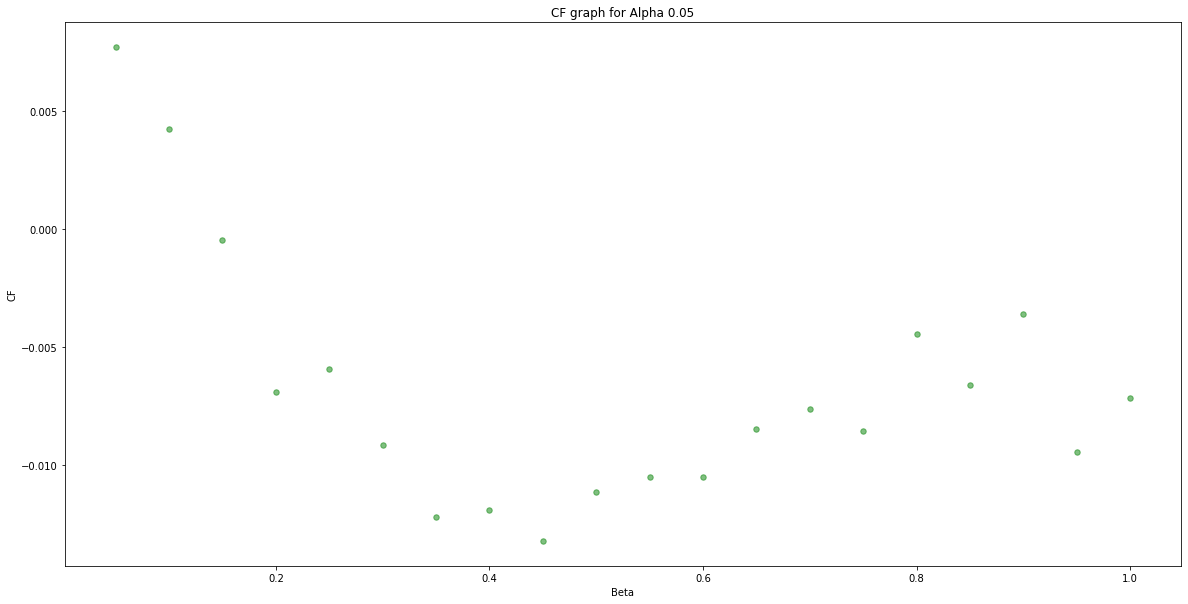

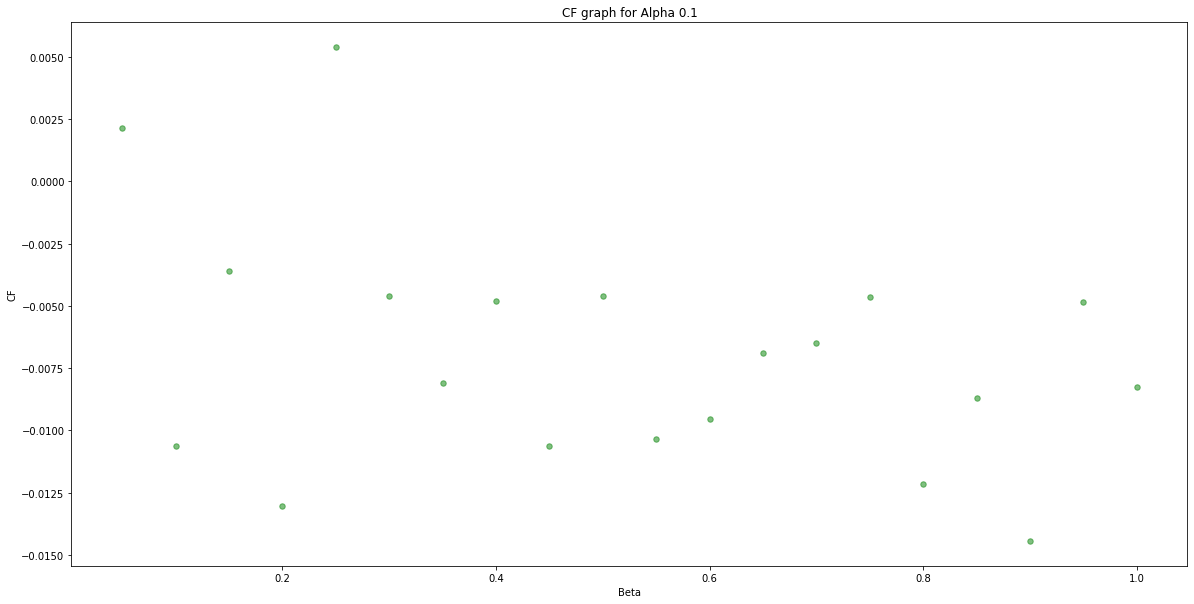

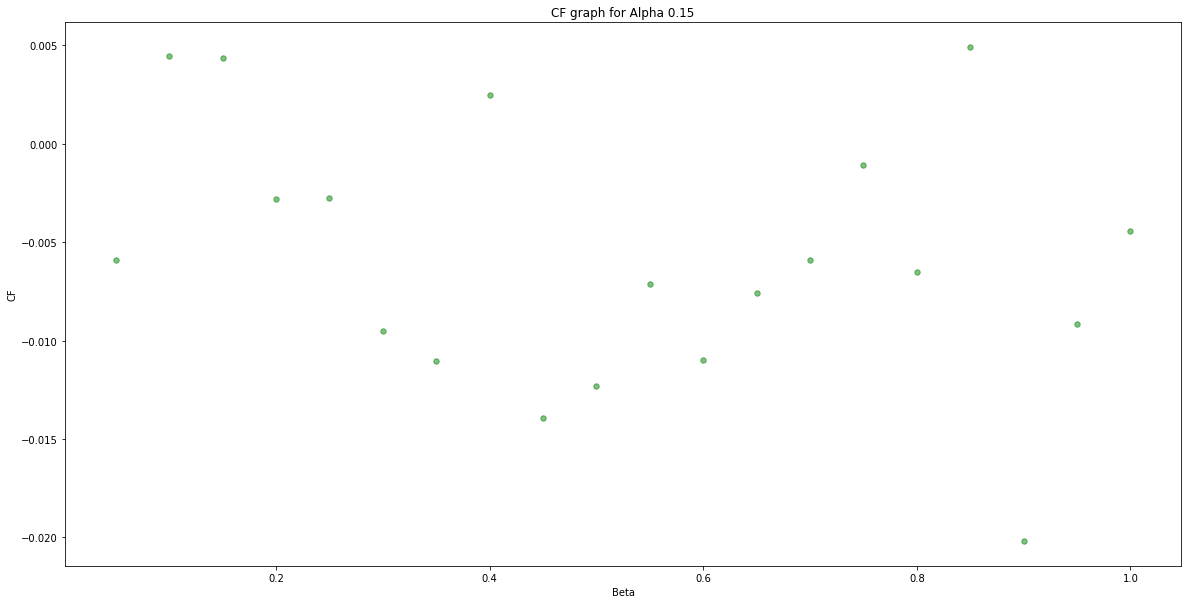

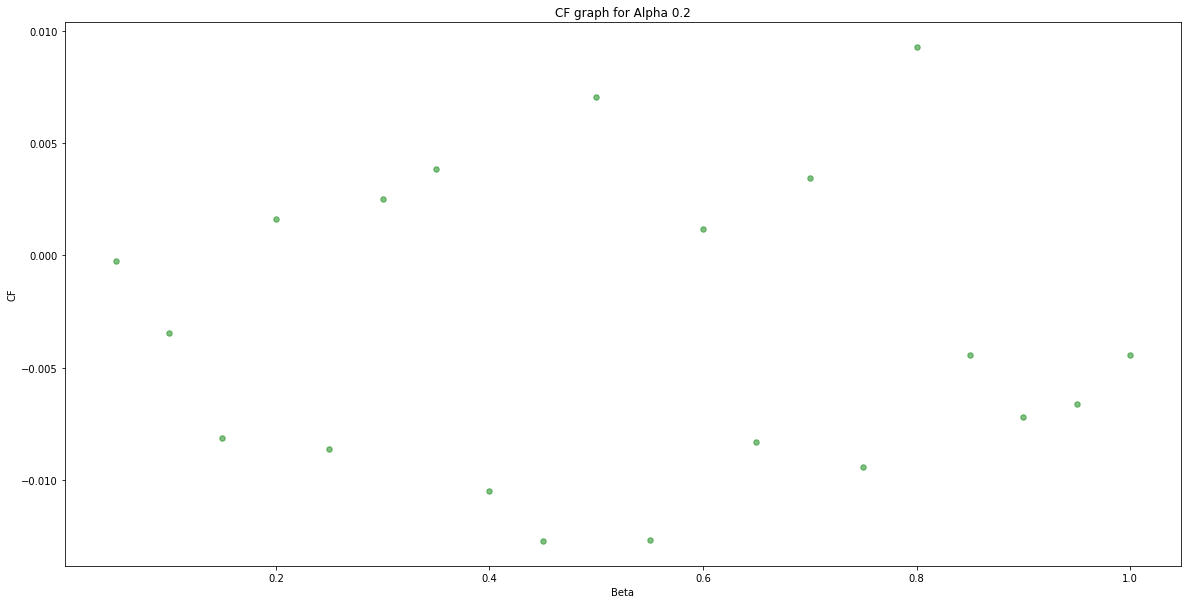

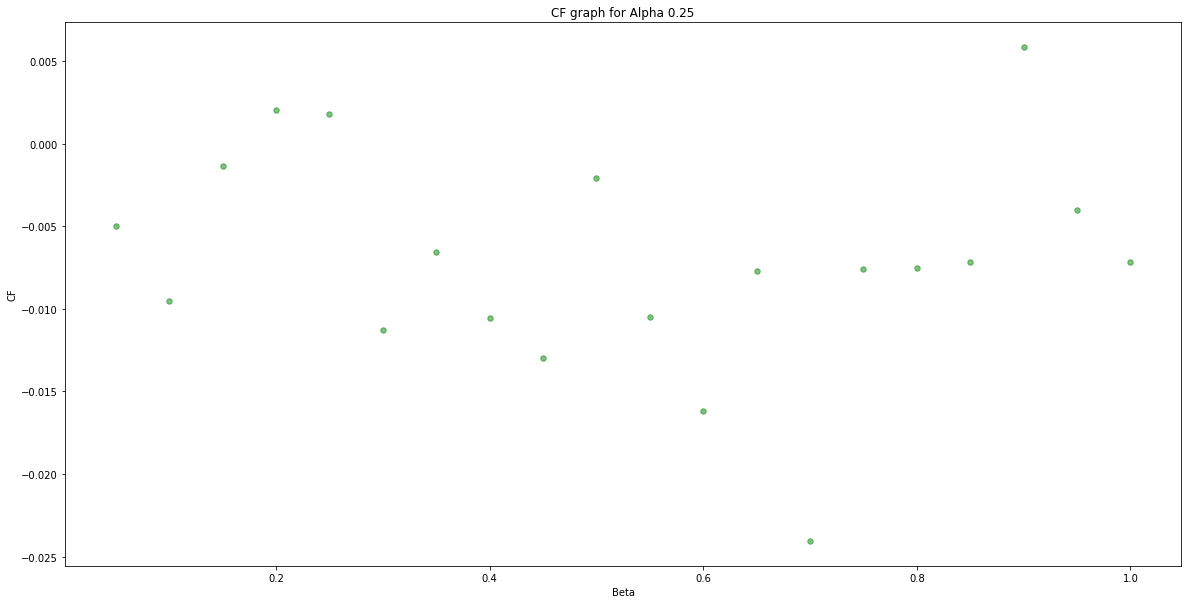

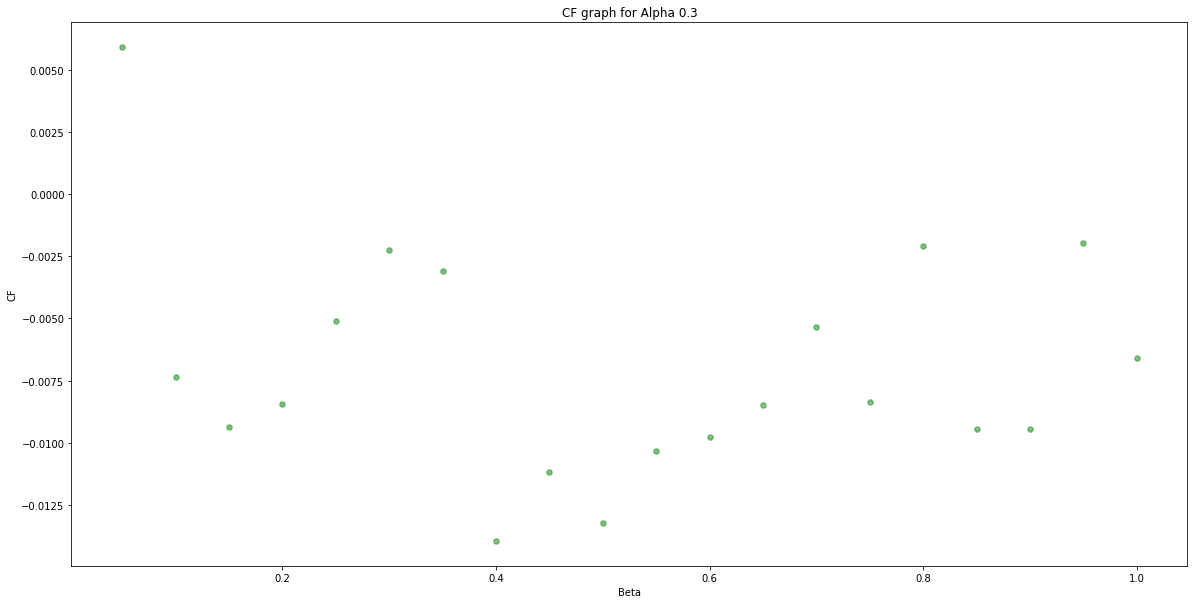

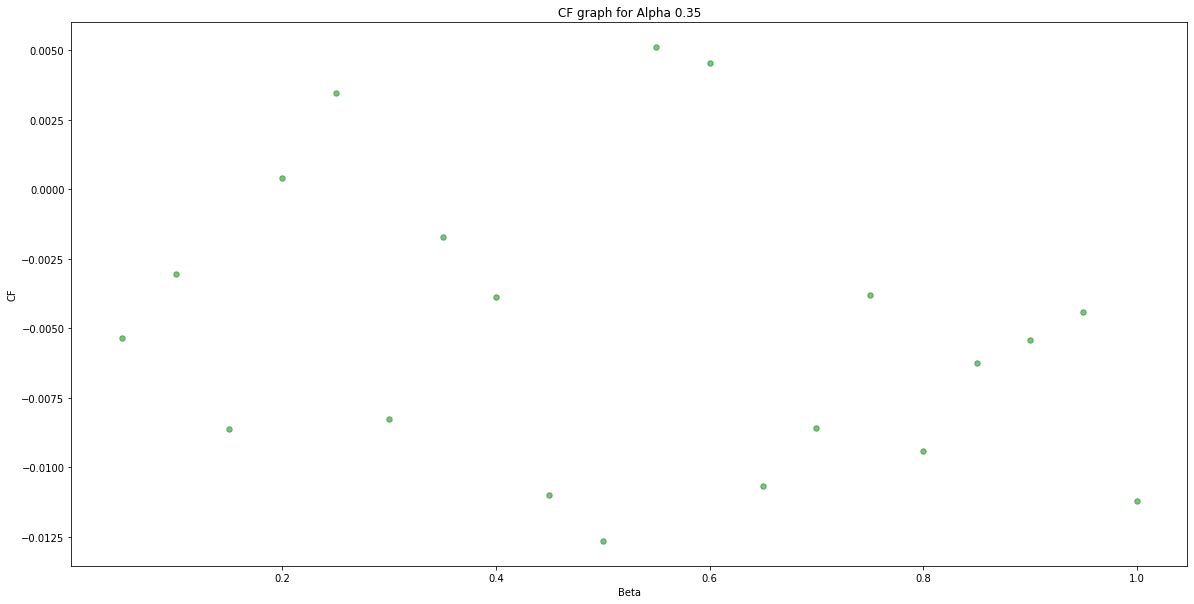

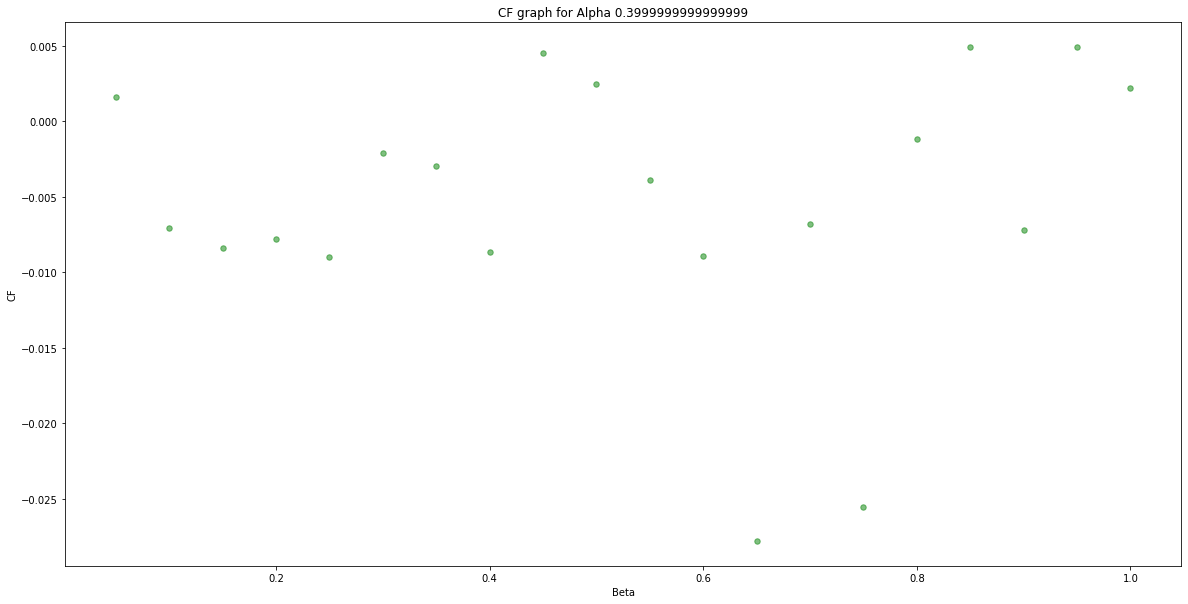

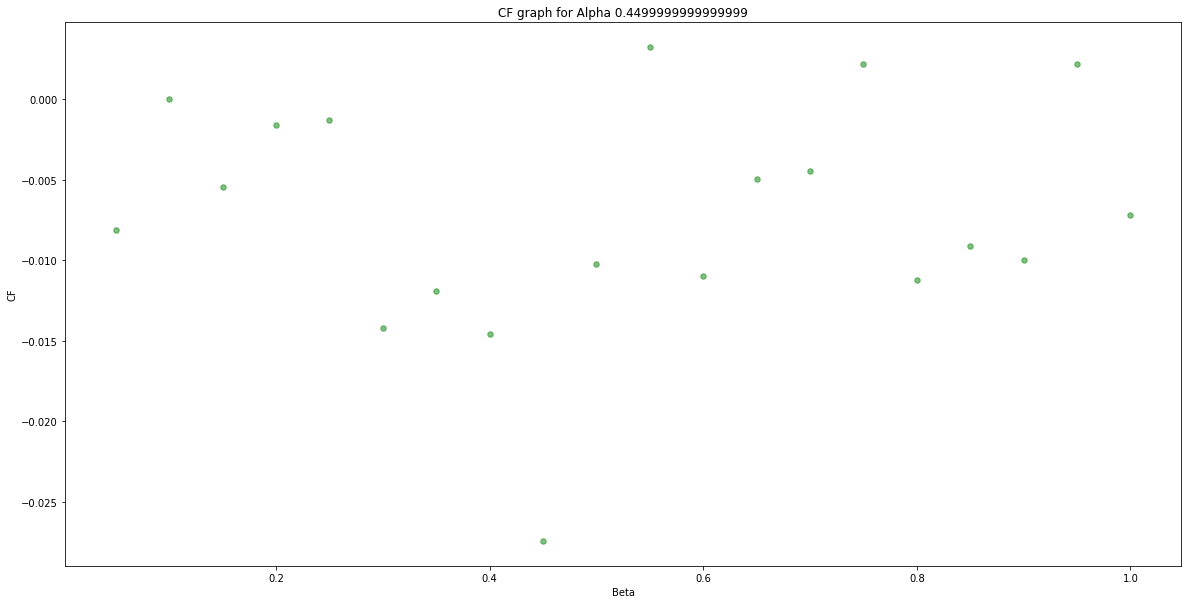

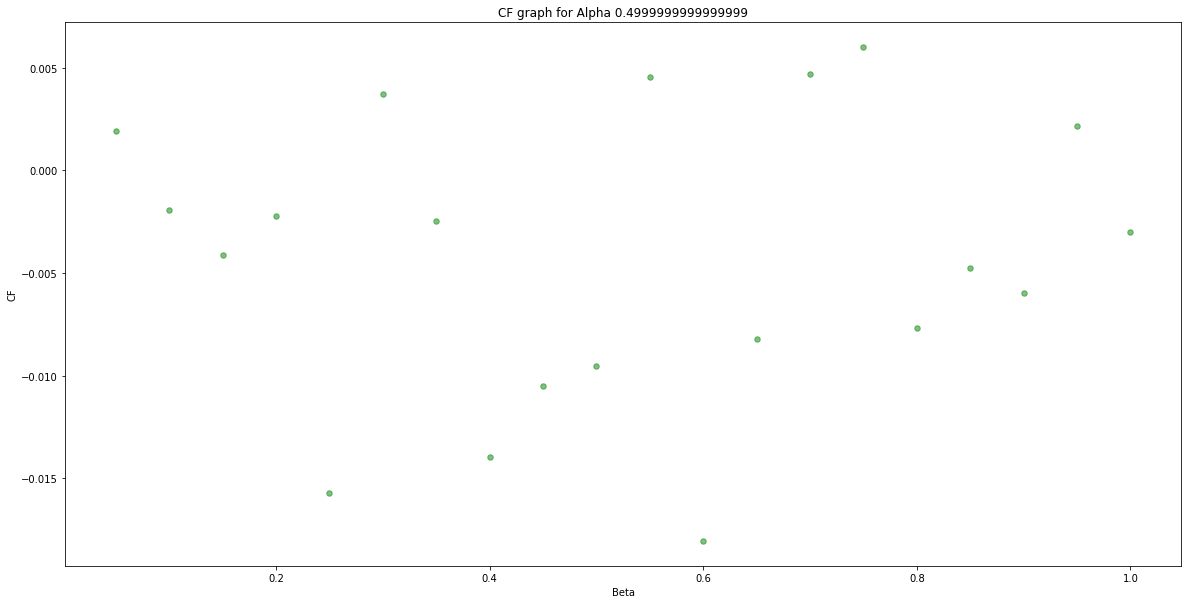

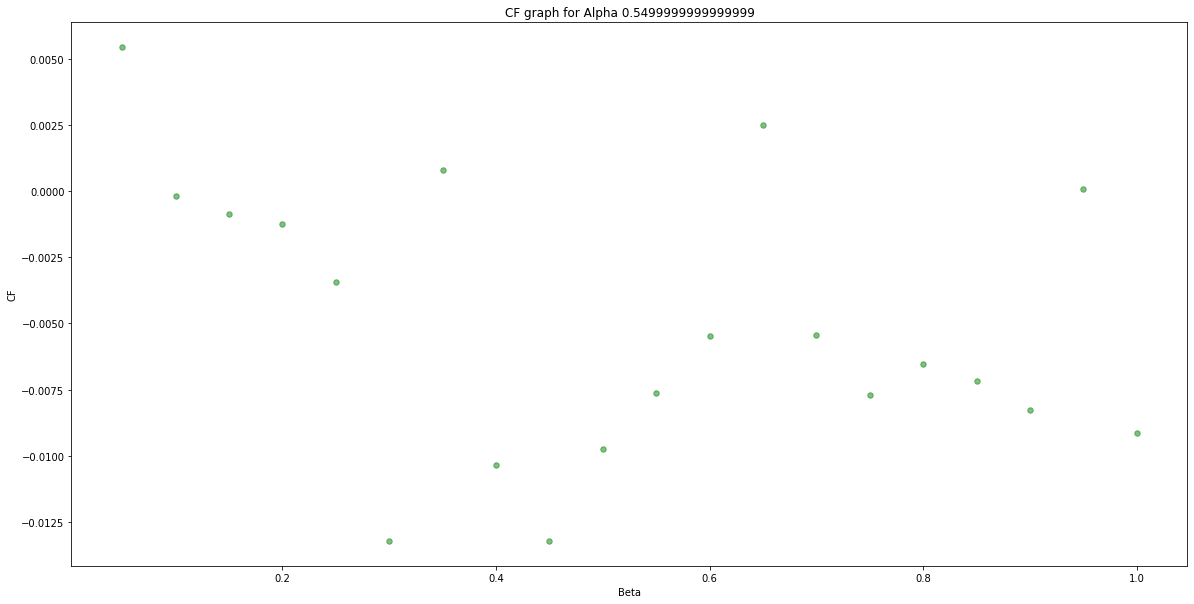

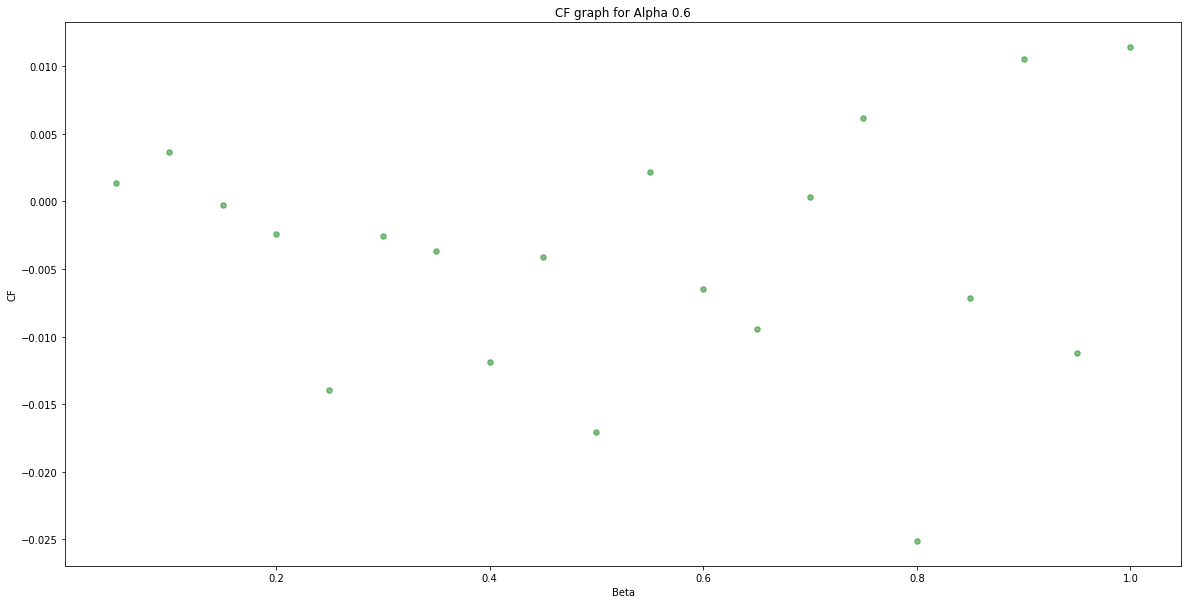

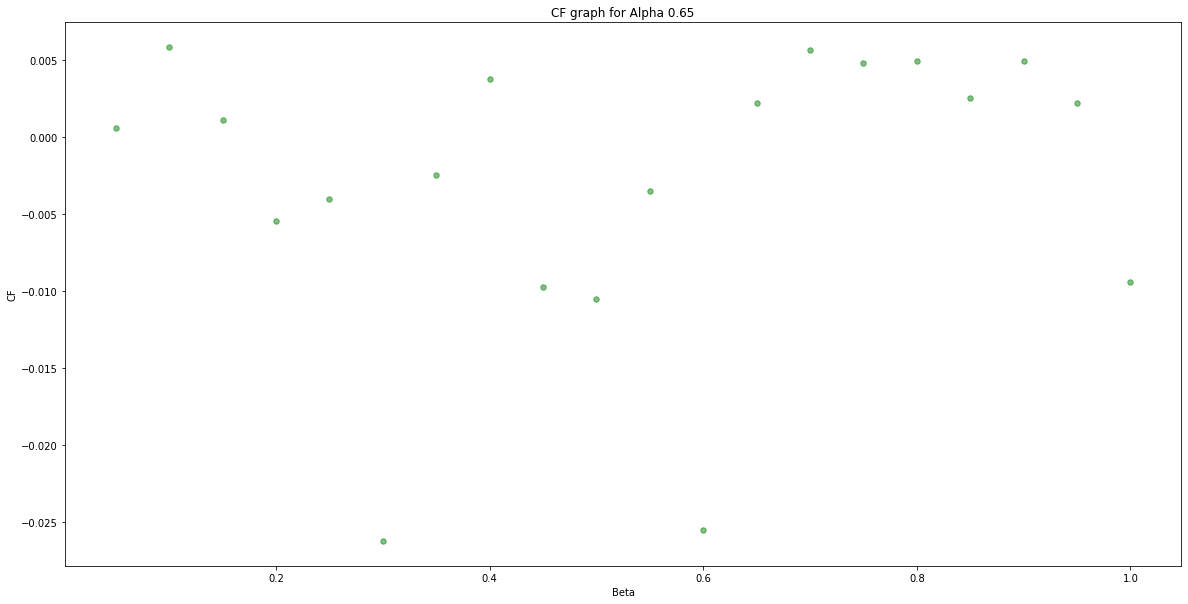

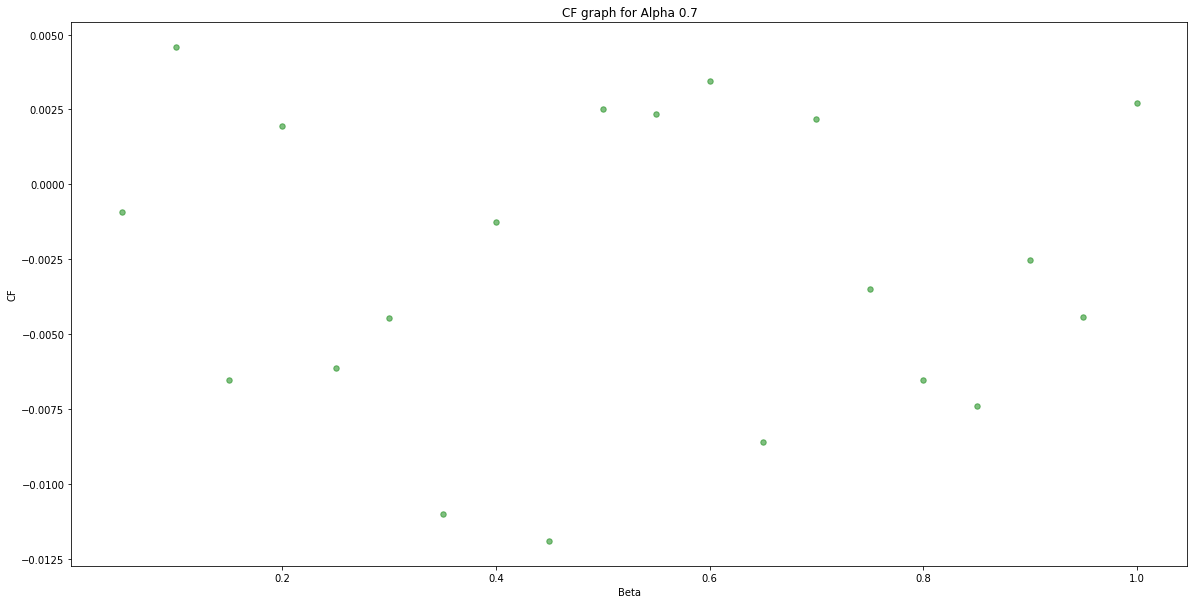

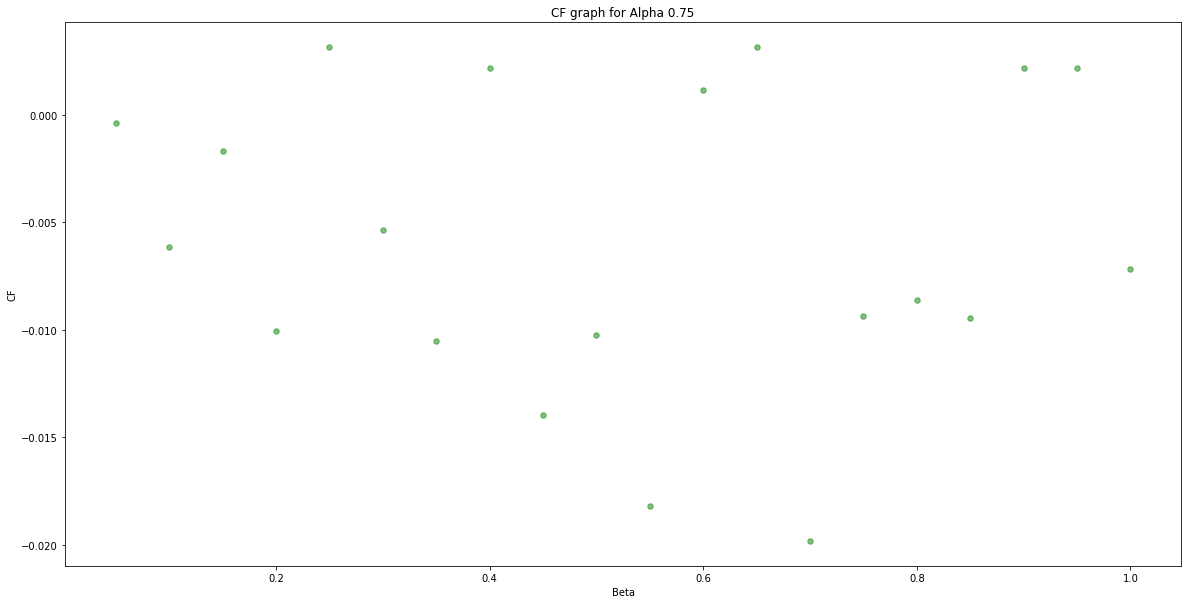

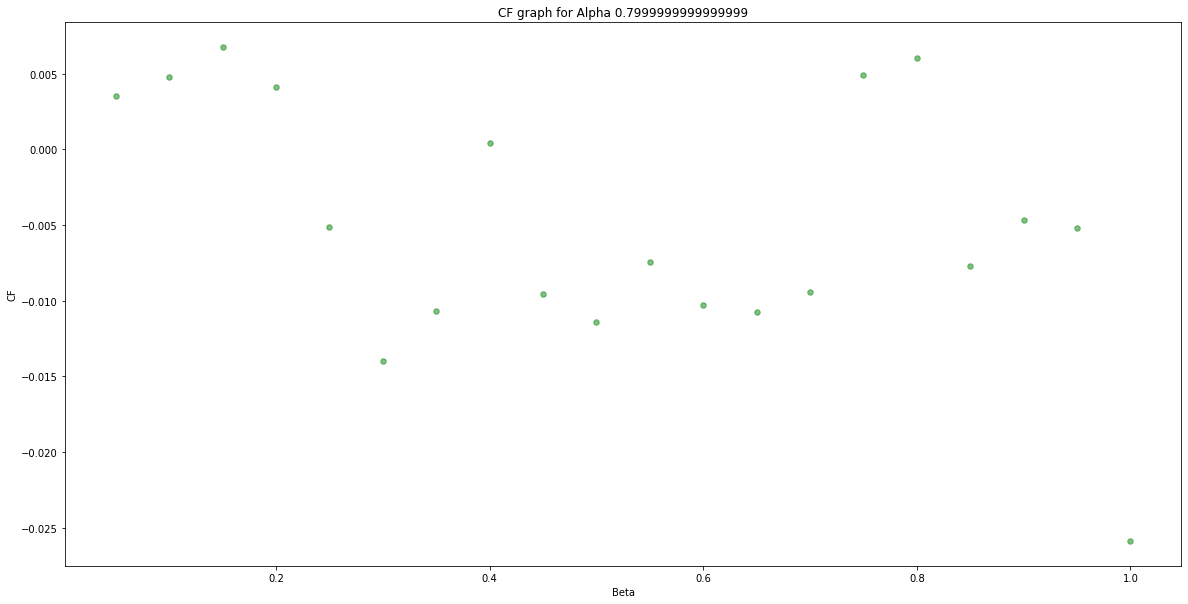

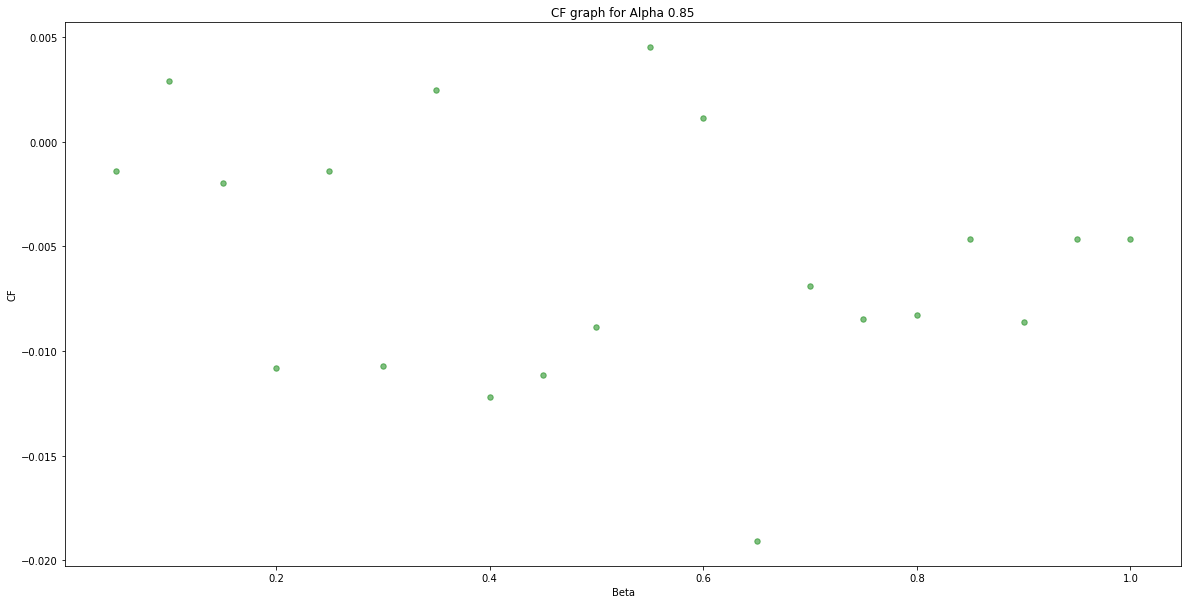

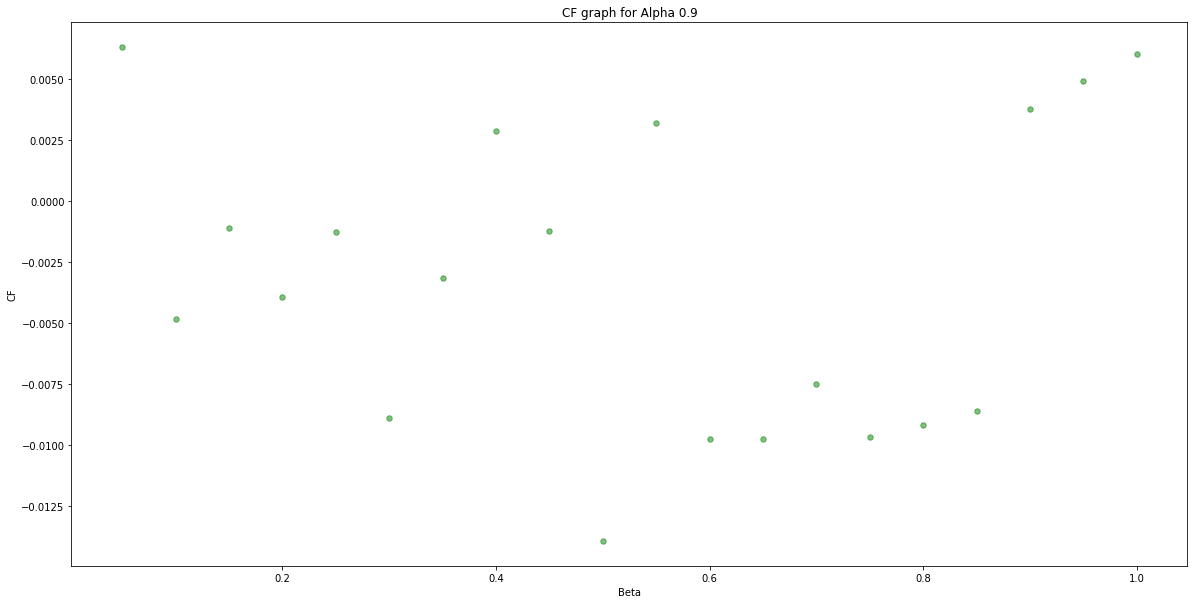

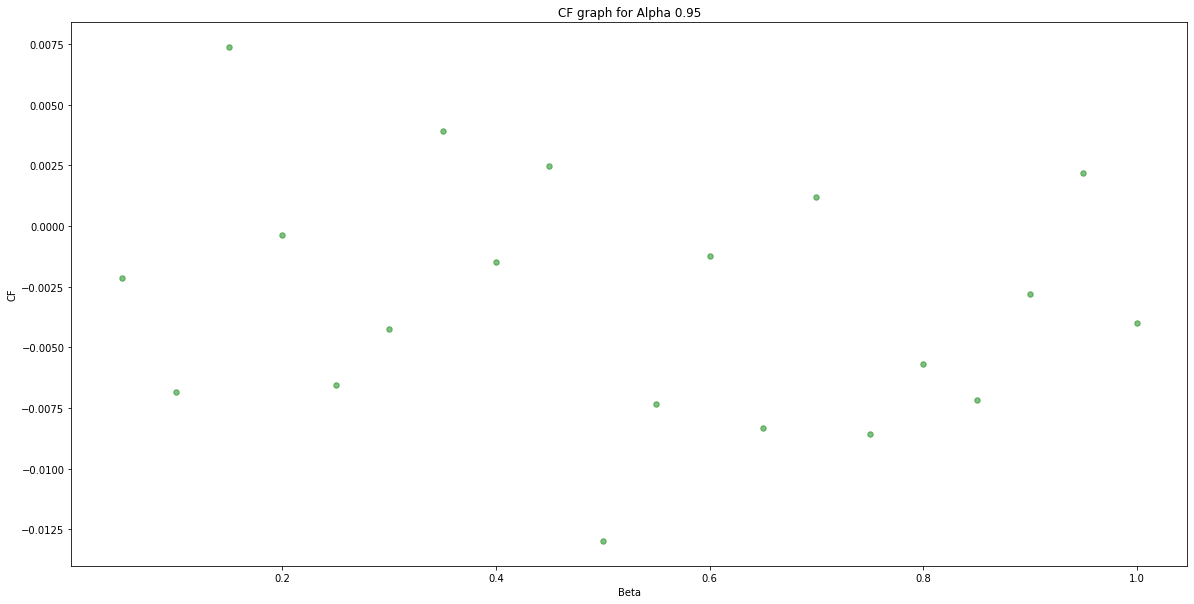

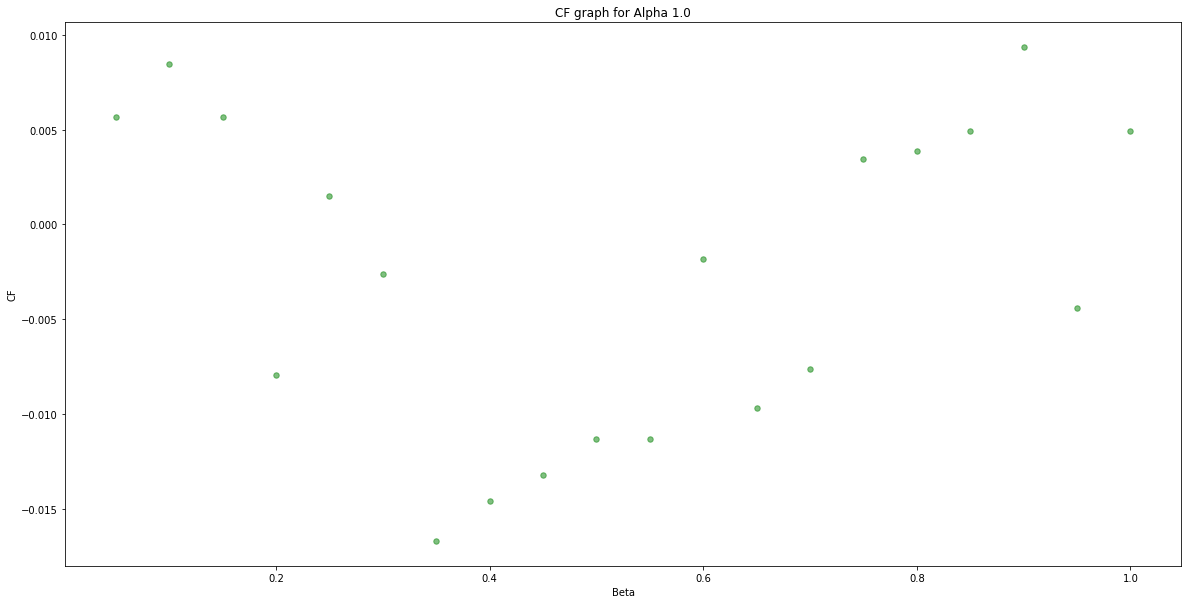

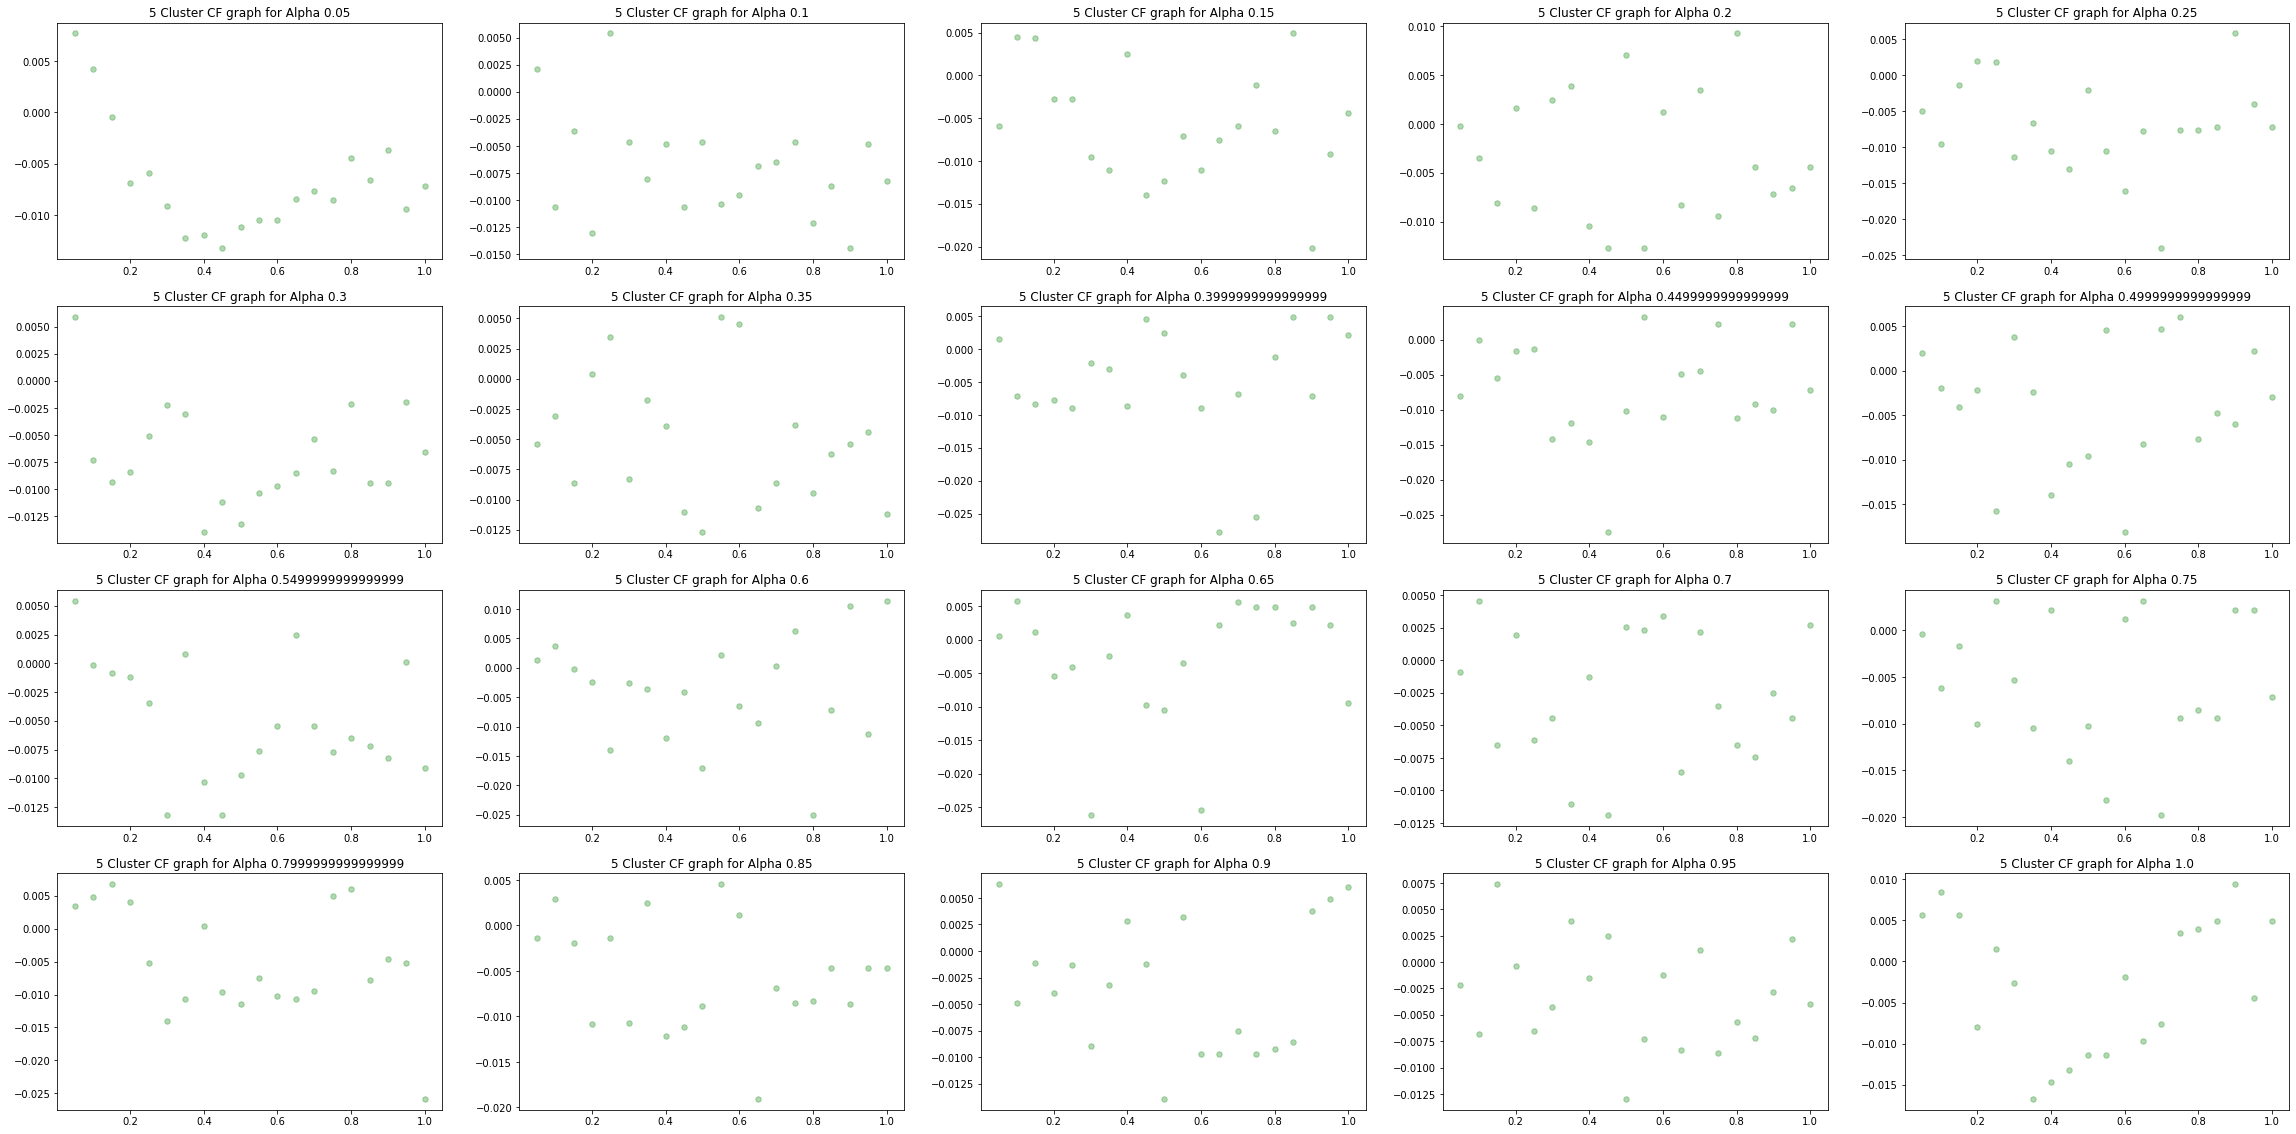

In [ ]:
for k in range(3,11) : 
  ThisFile = os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{k}.csv')
        
  
  if os.path.exists(ThisFile) : 
    data = pd.read_csv(ThisFile)
    print(data.shape)
    if not os.path.exists(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Alpha')) : os.makedirs(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Alpha'))
    if not os.path.exists(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Beta')) : os.makedirs(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Beta'))
    
    Values = {}
    for i in sorted(list(data['Alpha'].unique())): 
      ThisData = data[data['Alpha']==i]
      x,y = [],[]
      for m in set(ThisData['Beta'].tolist()) : 
        SpecificData = data[data['Alpha']==i][data['Beta']==m]
        x.append(m)
        y.append(SpecificData['AllCF'].mean())
      Values[i] = [x,y]

    for n in range(20):
      x,y =  Values[list(Values.keys())[n]][0],Values[list(Values.keys())[n]][1]
      plt.figure(figsize = (20, 10))
      plt.title(f'CF graph for Alpha {list(Values.keys())[n]}')
      plt.xlabel('Beta')
      plt.ylabel('CF')
      plt.scatter(x,y,s=30,alpha=0.5,color= 'g') 
      plt.savefig(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Alpha',f'{k} Cluster CF graph for Alpha {list(Values.keys())[n]}.png'))

    n=0
    plt.figure(figsize = (40,20))
    for i in range(20) : 
      n+=1
      plt.subplot(4,5,n)
      x,y =  Values[list(Values.keys())[n-1]][0],Values[list(Values.keys())[n-1]][1]
      plt.title(f'{k} Cluster CF graph for Alpha {list(Values.keys())[n-1]}')
      plt.scatter(x,y,s=30,alpha=0.3,color= 'g') 
    plt.savefig(os.path.join(MainPath,SelectedData,'07 Scatterplot for Clusters',f'Another Cluster {k} graph for Alpha',f'{k} Cluster CF graph for Different Alpha.png')) 

In [ ]:
x = 5


In [ ]:
# import pandas as pd

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Data/PhD/Week 18 BT Business/111.csv')
# data.drop('Unnamed: 0',axis=1,inplace=True)
# data

In [ ]:
# data['0'].value_counts()

In [ ]:
# data['1'].tolist()[0]

In [ ]:
# data['1'].tolist()[0].split(':')

In [ ]:
# for i in data['1'].tolist() : 
#   print('Group Index is : ' + i.split(':')[5].split(", 'T")[0])

#   for j,k in zip(range(18,27),['AllBCV','AllWCV','MeanBCV','MinWCV','MaxBCV','MeanWCV','MinBCV','MaxWCV','CohBCV','AllCF']) : 
#     print(f"Value of {k} is {  i.split(':')[j].split(',')[0]}  " )
#   print('Words are : ')
#   print(i.split(':')[8].split(r'\n')[0])
#   print(i.split(':')[9].split(r'\n')[0])
  
#   print('-----------------------------------------------')





In [ ]:
data

,Unnamed: 0,IDs,Alpha,Beta,A,B,WCV,AllBCV,AllCF,MeanBCV,MeanCF,MinBCV,MinCF,MaxBCV,MaxCF,CohBCV,CohCF
0,0,1,0.65,0.1,0.01,0.0100,1.535762,1.524238,0.000115,0.350544,0.011852,0.498791,0.010370,18.240944,-0.167052,-0.141710,0.016775
1,1,2,0.65,0.1,0.01,0.2575,1.535762,1.524238,-0.377134,0.350544,-0.074908,0.498791,-0.113081,18.240944,-4.681686,-0.141710,0.051848
2,2,3,0.65,0.1,0.01,0.5050,1.535762,1.524238,-0.754383,0.350544,-0.161667,0.498791,-0.236532,18.240944,-9.196319,-0.141710,0.086921
3,3,4,0.65,0.1,0.01,0.7525,1.535762,1.524238,-1.131632,0.350544,-0.248427,0.498791,-0.359982,18.240944,-13.710953,-0.141710,0.121994
4,4,5,0.65,0.1,0.01,1.0000,1.535762,1.524238,-1.508880,0.350544,-0.335187,0.498791,-0.483433,18.240944,-18.225587,-0.141710,0.157068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,121995,121996,0.60,0.9,1.00,0.0100,1.267584,1.246763,1.255116,0.239024,1.265193,0.280976,1.264774,6.830567,1.199278,-0.025672,1.267840
121996,121996,121997,0.60,0.9,1.00,0.2575,1.267584,1.246763,0.946542,0.239024,1.206035,0.280976,1.195232,6.830567,-0.491287,-0.025672,1.274194
121997,121997,121998,0.60,0.9,1.00,0.5050,1.267584,1.246763,0.637968,0.239024,1.146876,0.280976,1.125691,6.830567,-2.181853,-0.025672,1.280548
121998,121998,121999,0.60,0.9,1.00,0.7525,1.267584,1.246763,0.329395,0.239024,1.087718,0.280976,1.056149,6.830567,-3.872418,-0.025672,1.286902


In [ ]:
# import numpy as np
# for k in range(10) : 
#   W1 = list(np.random.randn(300))
#   W2 = list(np.random.randn(300))
#   print('For Euclidean Distance')
#   print(f'      Normal Equation is {np.sqrt(sum([(float(i)-float(j))**2 for i,j in zip(W1,W2)]))} & LinAlg Equation is {np.linalg.norm(np.array(W1)-np.array(W2), ord = 2)}')
#   print('For Manhattan Distance')
#   print(f'      Normal Equation is {sum([abs(float(i)-float(j)) for i,j in zip(W1,W2)])} & LinAlg Equation is {np.linalg.norm(np.array(W1)-np.array(W2), ord = 1)}')
#   print('For Correlation-based Distance')
#   mean1 ,mean2= float(np.mean(W1)) , float(np.mean(W2) )
#   ss1,ss2 = sum([(float(i)-mean1)**2 for i in W1]),sum([(float(j)-mean2)**2 for j in W2])
#   numerator = sum([(float(i)-mean1)*(float(j)-mean2) for i,j in zip(W1,W2)])
#   ThisResult = 1 - numerator/np.sqrt(ss1*ss2)
#   print(f'      Normal Equation is {ThisResult} & LinAlg Equation is { 1 - np.corrcoef(W1,W2)[0][1]}')    
#   print('-----------------------------------------------')
  


# 8) Tables Analysis

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
Tables = True
if Tables : 
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data'
  Files = [i for i in os.listdir(Path) if i[:7] == 'Cleaned']

  ColName = {'BTBusiness.csv':'Description','Vodafone Final Reviews.csv':'reviewBody','Orange TrustPilot Reviews.csv':'reviewBody','BT TrustPilot Reviews.csv':'reviewBody',
            'BT Forums Community.csv':'Description','VirginMedia TrustPilot Reviews.csv':'reviewBody'}


  CustomizedStopWords =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
                          'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
                          'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through','to', 'from', 'in',
                          'on', 'off', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such','only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
                          'will', 'just', 'don', "don't", 'should', "should've", '&amp','amp','lia','li','ul','ol','blockquote','strong','table','font','image','someone','anyone','everyone','hello','hi','morning','can','use','evening','bye','tr']

  CustomizedStopWords = [i.lower().strip() for i in CustomizedStopWords]
  DataDict = {}
  for File in Files : 
    data = pd.read_csv(os.path.join(Path,File))
    print(data.shape)
    FileName = File.replace('Cleaned_','').replace('.csv','')
    DataDict[FileName] = {'Sample Size' : data.shape[0]}
    ThisCol = ColName[str(File).replace('Cleaned_','')]
    RawText,CleanedText = [str(i) for i in data[ThisCol].tolist()],[str(i) for i in data['CleanedText'].tolist()]
    DataDict[FileName]['Total Number of Words Before Cleaning'] = len(' '.join(RawText).split())
    DataDict[FileName]['Total Number of Words After Cleaning'] = len((' '.join(CleanedText)).split())
    NRawText,NCleanedText = [len(i.split()) for i in RawText],[len(i.split()) for i in CleanedText]
    DataDict[FileName]['Mean Number of Words Before Cleaning'] = np.round(np.mean(NRawText))
    DataDict[FileName]['Mean Number of Words After  Cleaning'] = np.round(np.mean(NCleanedText))
    DataDict[FileName]['Min Number of Words Before Cleaning'] = np.round(np.min(NRawText))
    DataDict[FileName]['Min Number of Words After  Cleaning'] = np.round(np.min(NCleanedText))  
    DataDict[FileName]['Max Number of Words Before Cleaning'] = np.round(np.max(NRawText))
    DataDict[FileName]['Max Number of Words After  Cleaning'] = np.round(np.max(NCleanedText))  
    DataDict[FileName]['SD Number of Words Before Cleaning'] = np.round(np.std(NRawText))
    DataDict[FileName]['SD Number of Words After  Cleaning'] = np.round(np.std(NCleanedText))  
    DataDict[FileName]['Percentage of SW in Words'] = np.round(len([i for i in ' '.join(RawText).split() if i.lower().strip() in CustomizedStopWords]) *100 / len(' '.join(RawText).split()),2)
  DataDict

(998, 18)
(376, 17)
(1980, 18)
(1506, 17)
(1979, 18)
(2085, 17)


In [ ]:
if Tables :  
  pd.DataFrame(DataDict).T

In [ ]:
if Tables :
  pd.DataFrame(DataDict).T.to_csv('/content/drive/MyDrive/Data/PhD/Week 24 All Data/DataAnalysis.csv')
  

In [ ]:
if Tables :
  AllResult = pd.DataFrame()
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  DataDict = {}
  for File in Folders : 
    if os.path.exists(os.path.join(Path,File,'06 Combined CFs','CombinedCFs5.csv')) : 
      data = pd.read_csv(os.path.join(Path,File,'06 Combined CFs','CombinedCFs5.csv'))
      DataDict[File] = {'Alpha':{},'Beta':{},'Range of CF':{},'SD of CF':{}}
      for Type in ['WBCV','AllBCV','MeanBCV','MinBCV','MaxBCV','CohBCV','EqualParameters_AllBCV','EqualParameters_MeanBCV','EqualParameters_MinBCV','EqualParameters_MaxBCV','EqualParameters_CohBCV'] : 
        DataDict[File]['Alpha'][Type] = data[data[Type] == data[Type].min()]['Alpha'].values[0]
        DataDict[File]['Beta'][Type] = data[data[Type] == data[Type].min()]['Beta'].values[0]
        DataDict[File]['Range of CF'][Type] = data[Type].max()-data[Type].min()
        DataDict[File]['SD of CF'][Type] = data[Type].std()
      

  Round = 2
  
  D = pd.DataFrame(DataDict['BTBusiness']) 
  Word = 'BTBusiness'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.1&0.5&0.59 & 0.15 &  BTBusiness \\
AllBCV  &0.1&0.5&0.6& 0.15 &  BTBusiness \\
MeanBCV &0.05&0.05&0.4& 0.09 &  BTBusiness \\
MinBCV   &0.6&1.0&0.49& 0.08 &  BTBusiness \\
MaxBCV  &0.1&0.5&24.5& 7.15 &  BTBusiness \\
CohBCV  &0.1&0.25&0.18& 0.04 &  BTBusiness \\
EqualParameters\_AllBCV   &0.4&0.65&0.08& 0.01 &  BTBusiness \\
EqualParameters\_MeanBCV  &0.7&0.65&0.39& 0.08 &  BTBusiness \\
EqualParameters\_MinBCV  &0.95&0.15&0.54& 0.12 &  BTBusiness \\
EqualParameters\_MaxBCV  &0.35&0.85&23.97& 7.02 &  BTBusiness \\
EqualParameters\_CohBCV  &0.9&0.85&0.64& 0.16 &  BTBusiness \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'BTBusiness'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :
  D = pd.DataFrame(DataDict['Orange TrustPilot Reviews']) 
  Word = 'Orange'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.95&0.7&0.5 & 0.08 &  Orange \\
AllBCV  &0.95&0.7&0.53& 0.07 &  Orange \\
MeanBCV &0.3&1.0&0.43& 0.05 &  Orange \\
MinBCV   &1.0&0.95&0.61& 0.04 &  Orange \\
MaxBCV  &0.45&0.05&4.34& 0.54 &  Orange \\
CohBCV  &0.2&0.8&0.32& 0.06 &  Orange \\
EqualParameters\_AllBCV   &0.95&0.4&0.15& 0.02 &  Orange \\
EqualParameters\_MeanBCV  &0.95&0.7&0.68& 0.12 &  Orange \\
EqualParameters\_MinBCV  &0.6&0.95&0.59& 0.09 &  Orange \\
EqualParameters\_MaxBCV  &0.2&0.55&4.49& 0.57 &  Orange \\
EqualParameters\_CohBCV  &0.95&0.7&0.71& 0.13 &  Orange \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'Orange'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :
  D = pd.DataFrame(DataDict['BT Forums Community']) 
  Word = 'BTCommunity'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.85&0.9&0.54 & 0.08 &  BTCommunity \\
AllBCV  &0.85&0.9&0.47& 0.08 &  BTCommunity \\
MeanBCV &0.6&0.75&0.35& 0.06 &  BTCommunity \\
MinBCV   &0.9&0.95&0.55& 0.09 &  BTCommunity \\
MaxBCV  &0.85&0.9&16.23& 3.18 &  BTCommunity \\
CohBCV  &0.85&0.85&0.18& 0.03 &  BTCommunity \\
EqualParameters\_AllBCV   &0.5&0.9&0.12& 0.02 &  BTCommunity \\
EqualParameters\_MeanBCV  &0.85&0.9&0.54& 0.07 &  BTCommunity \\
EqualParameters\_MinBCV  &0.75&0.95&0.51& 0.1 &  BTCommunity \\
EqualParameters\_MaxBCV  &0.05&0.9&15.69& 3.13 &  BTCommunity \\
EqualParameters\_CohBCV  &0.85&0.9&0.56& 0.09 &  BTCommunity \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'BTCommunity'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :
  D = pd.DataFrame(DataDict['BT TrustPilot Reviews']) 
  Word = 'BTTrustPilot'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.75&0.8&0.35 & 0.05 &  BTTrustPilot \\
AllBCV  &0.5&0.85&97.86& 42.1 &  BTTrustPilot \\
MeanBCV &0.05&0.9&98.95& 42.56 &  BTTrustPilot \\
MinBCV   &0.75&0.55&98.72& 42.48 &  BTTrustPilot \\
MaxBCV  &0.2&0.55&95.38& 40.33 &  BTTrustPilot \\
CohBCV  &0.15&0.6&0.33& 0.11 &  BTTrustPilot \\
EqualParameters\_AllBCV   &0.2&1.0&99.07& 42.62 &  BTTrustPilot \\
EqualParameters\_MeanBCV  &0.2&1.0&98.25& 42.16 &  BTTrustPilot \\
EqualParameters\_MinBCV  &0.75&0.8&98.26& 42.24 &  BTTrustPilot \\
EqualParameters\_MaxBCV  &0.9&0.05&111.42& 44.41 &  BTTrustPilot \\
EqualParameters\_CohBCV  &0.75&0.8&0.57& 0.14 &  BTTrustPilot \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'BTTrustPilot'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :
  D = pd.DataFrame(DataDict['Vodafone Final Reviews']) 
  Word = 'Vodafone'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.8&0.9&0.67 & 0.13 &  Vodafone \\
AllBCV  &0.8&0.9&0.67& 0.14 &  Vodafone \\
MeanBCV &0.35&1.0&0.51& 0.1 &  Vodafone \\
MinBCV   &0.5&0.65&0.51& 0.09 &  Vodafone \\
MaxBCV  &0.3&0.05&7.12& 1.97 &  Vodafone \\
CohBCV  &0.75&0.35&0.33& 0.08 &  Vodafone \\
EqualParameters\_AllBCV   &0.5&0.85&0.19& 0.03 &  Vodafone \\
EqualParameters\_MeanBCV  &0.8&0.9&0.66& 0.09 &  Vodafone \\
EqualParameters\_MinBCV  &0.8&0.9&0.62& 0.08 &  Vodafone \\
EqualParameters\_MaxBCV  &0.4&0.5&6.9& 1.88 &  Vodafone \\
EqualParameters\_CohBCV  &0.8&0.9&0.71& 0.12 &  Vodafone \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'Vodafone'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :
  D = pd.DataFrame(DataDict['VirginMedia TrustPilot Reviews']) 
  Word = 'VirginMedia'
  Slash = '\\' + '\\'
  k=-1
  k+=1
  print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_AllBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MeanBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MinBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  k+=1
  print(f"EqualParameters\_CohBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash} [1ex] ")

WBCV  &0.45&0.25&0.73 & 0.17 &  VirginMedia \\
AllBCV  &0.45&0.25&97.94& 20.77 &  VirginMedia \\
MeanBCV &0.2&0.95&98.87& 21.01 &  VirginMedia \\
MinBCV   &0.8&0.2&98.68& 21.01 &  VirginMedia \\
MaxBCV  &0.8&0.85&94.27& 20.48 &  VirginMedia \\
CohBCV  &0.35&0.9&0.29& 0.07 &  VirginMedia \\
EqualParameters\_AllBCV   &1.0&0.65&99.06& 21.08 &  VirginMedia \\
EqualParameters\_MeanBCV  &0.95&0.9&98.26& 20.84 &  VirginMedia \\
EqualParameters\_MinBCV  &0.45&0.25&98.24& 20.84 &  VirginMedia \\
EqualParameters\_MaxBCV  &0.15&0.65&124.35& 24.72 &  VirginMedia \\
EqualParameters\_CohBCV  &0.85&0.25&0.79& 0.18 &  VirginMedia \\ [1ex] 


In [ ]:
if Tables :
  D['Data'] = 'VirginMedia'
  AllResult = pd.concat([AllResult,D],axis=0)
  AllResult

In [ ]:
if Tables :AllResult.to_csv('/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_CombinedBestValues.csv')

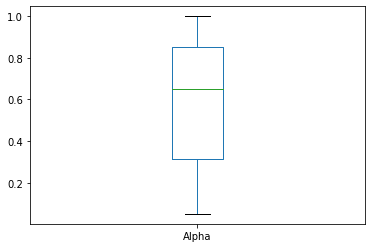

In [ ]:
if Tables :AllResult.boxplot(column =['Alpha'], grid = False)

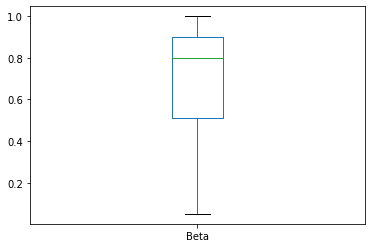

In [ ]:
if Tables :AllResult.boxplot(column =['Beta'], grid = False)

In [ ]:
if Tables :AllResult.describe().T.head()

In [ ]:
if Tables :AllResult.describe().T.to_csv('/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_CombinedBestValuesStatistics.csv')

In [ ]:
A = AllResult.describe().T
A

,count,mean,std,min,25%,50%,75%,max
Alpha,66.0,0.578788,0.307103,0.050000,0.312500,0.650000,0.850000,1.000000
Beta,66.0,0.684091,0.283950,0.050000,0.512500,0.800000,0.900000,1.000000
Range of CF,66.0,26.227478,42.742830,0.077654,0.491992,0.629543,24.369665,124.345360
SD of CF,66.0,8.164142,14.545829,0.013533,0.077413,0.126953,7.116722,44.407901


In [ ]:
Slash = '\\' + '\\'
for i in A.iterrows() : 
  V = '&'.join([str(np.round(j,Round)) for j in  i[1].values[1:]])
  print(f'{i[0]} & {V} {Slash}')
  

  # print(f"WBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)} & {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} ")
  # k+=1
  # print(f"AllBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  # k+=1
  # print(f"MeanBCV &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  # k+=1
  # print(f"MinBCV   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")
  # k+=1
  # print(f"MaxBCV  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} &  {Word} {Slash}")



Alpha & 0.58&0.31&0.05&0.31&0.65&0.85&1.0 \\
Beta & 0.68&0.28&0.05&0.51&0.8&0.9&1.0 \\
Range of CF & 26.23&42.74&0.08&0.49&0.63&24.37&124.35 \\
SD of CF & 8.16&14.55&0.01&0.08&0.13&7.12&44.41 \\


In [ ]:

Alpha & 0.49 & 0.27 & 0.05 & 0.21 & 0.55 & 0.75 & 1.0\\
Beta & 0.64 & 0.33 & 0.05 & 0.37 & 0.75 & 0.95 & 1.0\\
Range of CF & 26.44 & 42.74 & 0.1 & 0.39 & 0.62 & 21.15 & 124.32\\
SD of CF  & 7.55 & 13.73 & 0.02 & 0.07 & 0.12 & 7.28 & 42.71\\[1ex] % [1ex] adds vertical 

In [ ]:
Tables = True
import pandas as pd
import os

In [ ]:
if Tables :
  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0] =='C']

  for File in DataFiles : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    print(File)
    Text = ' '.join([str(i) for i in data['CleanedText'].tolist()]).split()
    print(list(pd.Series(Text).value_counts().index[:10]))


  # Cleaned_BTBusiness.csv
  # ['bt', 'not', 'business', 'phone', 'email', 'get', 'would', 'no', 'new', 'number']
  # Cleaned_BT Forums Community.csv
  # ['bt', 'td', 'not', 'get', 'no', 'tr', 'would', 'up', 'new', 'now']
  # Cleaned_Orange TrustPilot Reviews.csv
  # ['orange', 'not', 'phone', 'customer', 'service', 'no', 'would', 'get', 'up', 'contract']
  # Cleaned_VirginMedia TrustPilot Reviews.csv
  # ['not', 'virgin', 'service', 'no', 'customer', 'get', 'up', 'would', 'internet', 'phone']
  # Cleaned_Vodafone Final Reviews.csv
  # ['not', 'vodafone', 'phone', 'customer', 'no', 'service', 'get', 'contract', 'told', 'would']
  # Cleaned_BT TrustPilot Reviews.csv
  # ['bt', 'not', 'no', 'service', 'would', 'up', 'get', 'phone', 'customer', 'told']  

Cleaned_Orange TrustPilot Reviews.csv
['orange', 'not', 'phone', 'customer', 'service', 'no', 'would', 'get', 'up', 'contract']
Cleaned_BTBusiness.csv
['bt', 'not', 'business', 'phone', 'email', 'get', 'would', 'no', 'new', 'number']
Cleaned_VirginMedia TrustPilot Reviews.csv
['not', 'virgin', 'service', 'no', 'customer', 'get', 'up', 'would', 'internet', 'phone']
Cleaned_BT Forums Community.csv
['bt', 'td', 'not', 'get', 'no', 'would', 'up', 'new', 'now', 'tv']
Cleaned_Vodafone Final Reviews.csv
['not', 'vodafone', 'phone', 'customer', 'no', 'service', 'get', 'contract', 'told', 'would']
Cleaned_BT TrustPilot Reviews.csv
['bt', 'not', 'no', 'service', 'would', 'up', 'get', 'phone', 'customer', 'told']


In [ ]:
if Tables :
  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0] =='C']

  for File in DataFiles : 
    data = pd.read_csv(os.path.join(MainPath ,'0 Data',File))
    print(File)
    Text = ' '.join([str(i) for i in data['CleanedText'].tolist()]).split()
    TextBG = [f'{Text[n]} {Text[n+1]}' for n in range(len(Text)-1)]
    print(list(pd.Series(TextBG).value_counts().index[:10]))


  # Cleaned_BTBusiness.csv
  # ['bt', 'not', 'business', 'phone', 'email', 'get', 'would', 'no', 'new', 'number']
  # Cleaned_BT Forums Community.csv
  # ['bt', 'td', 'not', 'get', 'no', 'tr', 'would', 'up', 'new', 'now']
  # Cleaned_Orange TrustPilot Reviews.csv
  # ['orange', 'not', 'phone', 'customer', 'service', 'no', 'would', 'get', 'up', 'contract']
  # Cleaned_VirginMedia TrustPilot Reviews.csv
  # ['not', 'virgin', 'service', 'no', 'customer', 'get', 'up', 'would', 'internet', 'phone']
  # Cleaned_Vodafone Final Reviews.csv
  # ['not', 'vodafone', 'phone', 'customer', 'no', 'service', 'get', 'contract', 'told', 'would']
  # Cleaned_BT TrustPilot Reviews.csv
  # ['bt', 'not', 'no', 'service', 'would', 'up', 'get', 'phone', 'customer', 'told']  

Cleaned_Orange TrustPilot Reviews.csv
['customer service', 'customer services', 'orange customer', 'call back', 'mobile phone', 'told would', 'over years', 'orange years', 'said would', 'top up']
Cleaned_BTBusiness.csv
['bt business', 'set up', 'bt cloud', 'email address', 'cloud voice', 'smart hub', 'cloud phone', 'no longer', 'would like', 'phone line']
Cleaned_VirginMedia TrustPilot Reviews.csv
['customer service', 'virgin media', 'set up', 'customer services', 'no one', 'even though', 'could not', 'call back', 'signed up', 'direct debit']
Cleaned_BT Forums Community.csv
['td td', 'bt tv', 'smart hub', 'bt sport', 'span img', 'img span', 'span span', 'digital voice', 'set up', 'email address']
Cleaned_Vodafone Final Reviews.csv
['customer service', 'no one', 'even though', 'customer services', 'still not', 'told would', 'worst customer', 'could not', 'new phone', 'would not']
Cleaned_BT TrustPilot Reviews.csv
['customer service', 'no one', 'set up', 'bt customer', 'still no', 'open 

In [ ]:
TextBG[:10]

['broadband went',
 'went down',
 'down reported',
 'reported early',
 'early promise',
 'promise fix',
 'fix end',
 'end lots',
 'lots calls',
 'calls get']

In [ ]:
Text[:20]

['broadband',
 'went',
 'down',
 'reported',
 'early',
 'promise',
 'fix',
 'end',
 'lots',
 'calls',
 'get',
 'update',
 'no',
 'communication',
 'online',
 'tracking',
 'update',
 'finally',
 'told',
 'engineer']

In [ ]:
Tables = True

In [ ]:
if Tables :
  Round = 2
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  DataDict = {}
  for File in Folders :
    if os.path.exists(os.path.join(Path,File,'01 GSDMMFiles','Clusters Number 5.csv'))  : 
      data = pd.read_csv(os.path.join(Path,File,'01 GSDMMFiles','Clusters Number 5.csv'))
      print(f'For data {File}')
      Values = data['Loss'].tolist()
      # print(f'Min :  {np.round(np.min(Values),Round) } , Max  : {np.round(np.max(Values),Round)} , Mean  : {np.round(np.mean(Values),Round)} ,  SD  : {np.round(np.std(Values),Round)} ')
      print(f'{np.round(np.min(Values),Round) }& {np.round(np.max(Values),Round)}&{np.round(np.mean(Values),Round)}&{np.round(np.std(Values),Round)}')

For data BTBusiness
0.17& 1.59&0.88&0.27
For data Orange TrustPilot Reviews
0.5& 1.6&1.21&0.24
For data VirginMedia TrustPilot Reviews
0.31& 1.6&1.11&0.24
For data BT Forums Community
0.04& 1.2&0.47&0.26
For data Vodafone Final Reviews
0.43& 1.6&1.36&0.29
For data BT TrustPilot Reviews
0.29& 1.6&1.25&0.34


In [ ]:
if Tables :
  Slash = '\\' + '\\'
  Round = 2
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_CombinedBestValues.csv'
  data = pd.read_csv(Path)
  for j in range(66) : 
    L = [np.round(i,2) if type(i)!=str else i for i in data.iloc[j,:].tolist()]
    L = [str(i) for i in L]
    print(' & '.join(L) + Slash ) 

In [ ]:
if Tables :
  Slash = '\\' + '\\'
  Round = 2
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_CombinedBestValuesStatistics.csv'
  data = pd.read_csv(Path)
  for j in range(4) : 
    L = [np.round(i,2) if type(i)!=str else i for i in data.iloc[j,:].tolist()]
    L = [str(i) for i in L]
    print(' & '.join(L) + Slash ) 

In [ ]:
if Tables :
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  Data = pd.DataFrame()
  for File in Folders : 
    for Cluster in [3,5,10,15,20] : 
      data = pd.read_csv(os.path.join(Path,File,'06 Combined CFs',f'CombinedCFs{Cluster}.csv'))
      data['Dataset'] = File
      data['Clusters'] = Cluster
      Data = pd.concat([Data,data],axis=0)
      # print(Data.shape)

  #   DataDict[File] = {'Alpha':{},'Beta':{},'Range of CF':{},'SD of CF':{}}
  #   for Type in ['WBCV','AllBCV','MeanBCV','MinBCV','MaxBCV','CohBCV','EqualParameters_AllBCV','EqualParameters_MeanBCV','EqualParameters_MinBCV','EqualParameters_MaxBCV','EqualParameters_CohBCV'] : 
  #     DataDict[File]['Alpha'][Type] = data[data[Type] == data[Type].min()]['Alpha'].values[0]
  #     DataDict[File]['Beta'][Type] = data[data[Type] == data[Type].min()]['Beta'].values[0]
  #     DataDict[File]['Range of CF'][Type] = data[Type].max()-data[Type].min()
  #     DataDict[File]['SD of CF'][Type] = data[Type].std()
      

  # Round = 2
  # D = pd.DataFrame(DataDict['BTBusiness']) 
  # Slash = '\\' + '\\'
  # k=-1
  # k+=1
  # print(f"WCV (A=1, B=0) &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"AllBCV (A=0, B=1) &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MeanBCV (A=0, B=1) &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MinBCV (A=0, B=1)  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MaxBCV (A=0, B=1) &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"CohBCV (A=0, B=1)   &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"AllCF (A=B=1)  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MeanCF (A=B=1)  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MinCF (A=B=1)  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"MaxCF (A=B=1)  &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash}")
  # k+=1
  # print(f"CohCF (A=B=1) &{np.round(D['Alpha'].tolist()[k],Round)}&{np.round(D['Beta'].tolist()[k],Round)}&{np.round(D['Range of CF'].tolist()[k],Round)}& {np.round(D['SD of CF'].tolist()[k],Round)} {Slash} [1ex] % [1ex] adds vertical space")
  Data.reset_index(inplace = True)
  Data.drop(['index','Unnamed: 0','Alpha','Beta'],axis=1,inplace = True)
  Data

In [ ]:
Data

,AllBCV,CohBCV,EqualParameters_AllBCV,EqualParameters_CohBCV,EqualParameters_MaxBCV,EqualParameters_MeanBCV,EqualParameters_MinBCV,MaxBCV,MeanBCV,MinBCV,WBCV,MincF,Dataset,Clusters
0,1.264349,-0.241318,0.051554,1.557221,-3.201334,1.181095,0.976456,4.517237,0.134808,0.339448,1.315903,-3.201334,Orange TrustPilot Reviews,3
1,1.253363,-0.246452,0.030251,1.530067,-3.180330,1.108468,0.838798,4.463944,0.175146,0.444816,1.283614,-3.180330,Orange TrustPilot Reviews,5
2,1.186996,-0.139913,0.021779,1.348688,-4.138764,0.993842,0.837430,5.347539,0.214933,0.371345,1.208775,-4.138764,Orange TrustPilot Reviews,10
3,1.244525,-0.245169,0.034796,1.524490,-2.626109,1.118934,0.834505,3.905429,0.160387,0.444816,1.279321,-2.626109,Orange TrustPilot Reviews,15
4,1.254408,-0.148642,0.003649,1.406698,-3.759854,1.063057,0.842731,5.017910,0.194999,0.415326,1.258057,-3.759854,Orange TrustPilot Reviews,20
5,1.767899,-0.089852,0.011352,1.869103,-19.119412,1.386842,1.229459,20.898663,0.392409,0.549792,1.779251,-19.119412,BT Forums Community,3
6,1.536503,-0.090109,-0.023380,1.603232,-12.087707,1.073762,1.010053,13.600829,0.439360,0.503069,1.513122,-12.087707,BT Forums Community,5
7,1.560373,-0.073166,-0.013134,1.620405,-9.928965,1.171521,1.024760,11.476205,0.375719,0.522480,1.547240,-9.928965,BT Forums Community,10
8,1.730746,-0.053071,-0.016355,1.767463,-14.994440,1.261144,1.079571,16.708831,0.453248,0.634821,1.714392,-14.994440,BT Forums Community,15
9,1.650381,-0.053122,-0.017251,1.686252,-13.213131,1.190441,1.106011,14.846262,0.442689,0.527119,1.633131,-13.213131,BT Forums Community,20


In [ ]:
if Tables :
  Slash = '\\' + '\\'
  for N in range(6) : 
    D = Data[Data['Dataset']==Data['Dataset'].unique()[N]]
    print(Data['Dataset'].unique()[N])
    D.reset_index(inplace = True)
    D.drop(['index'],axis=1,inplace = True)
    for i in range(D.shape[0]) : 
      print(str(D.iloc[i,13])+ ' & ' + ' & '.join([str(np.round(j,2)) for j in D.iloc[i,:].tolist()[:12]]) + Slash )
    print('--------------------------------------')

Orange TrustPilot Reviews
3 & 1.26 & -0.24 & 0.05 & 1.56 & -3.2 & 1.18 & 0.98 & 4.52 & 0.13 & 0.34 & 1.32 & -3.2\\
5 & 1.25 & -0.25 & 0.03 & 1.53 & -3.18 & 1.11 & 0.84 & 4.46 & 0.18 & 0.44 & 1.28 & -3.18\\
10 & 1.19 & -0.14 & 0.02 & 1.35 & -4.14 & 0.99 & 0.84 & 5.35 & 0.21 & 0.37 & 1.21 & -4.14\\
15 & 1.24 & -0.25 & 0.03 & 1.52 & -2.63 & 1.12 & 0.83 & 3.91 & 0.16 & 0.44 & 1.28 & -2.63\\
20 & 1.25 & -0.15 & 0.0 & 1.41 & -3.76 & 1.06 & 0.84 & 5.02 & 0.19 & 0.42 & 1.26 & -3.76\\
--------------------------------------
BT Forums Community
3 & 1.77 & -0.09 & 0.01 & 1.87 & -19.12 & 1.39 & 1.23 & 20.9 & 0.39 & 0.55 & 1.78 & -19.12\\
5 & 1.54 & -0.09 & -0.02 & 1.6 & -12.09 & 1.07 & 1.01 & 13.6 & 0.44 & 0.5 & 1.51 & -12.09\\
10 & 1.56 & -0.07 & -0.01 & 1.62 & -9.93 & 1.17 & 1.02 & 11.48 & 0.38 & 0.52 & 1.55 & -9.93\\
15 & 1.73 & -0.05 & -0.02 & 1.77 & -14.99 & 1.26 & 1.08 & 16.71 & 0.45 & 0.63 & 1.71 & -14.99\\
20 & 1.65 & -0.05 & -0.02 & 1.69 & -13.21 & 1.19 & 1.11 & 14.85 & 0.44 & 0.53 & 1.63 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({'font.size': 24})

In [ ]:
Tables = True
if Tables : 
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data'
  Files = [i for i in os.listdir(Path) if i[:7] == 'Cleaned']
  NumberOfWords = {}
  for File in Files : 
    data = pd.read_csv(os.path.join(Path,File))
    FileName = File.replace('Cleaned_','').replace('.csv','')
    DataDict[FileName] =data['WordLength'].tolist()

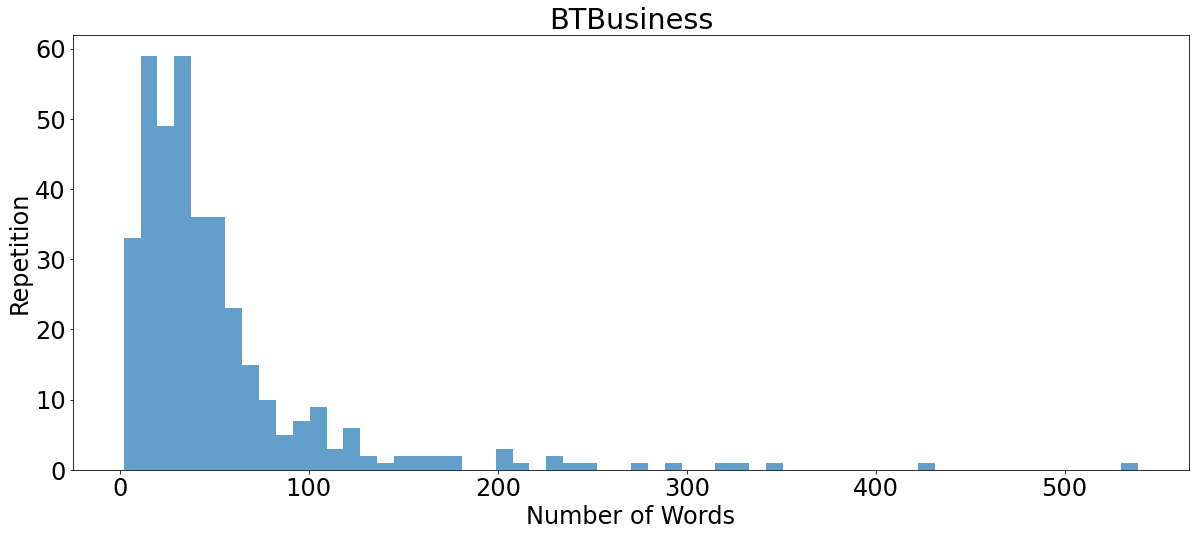

In [ ]:
k=-1
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

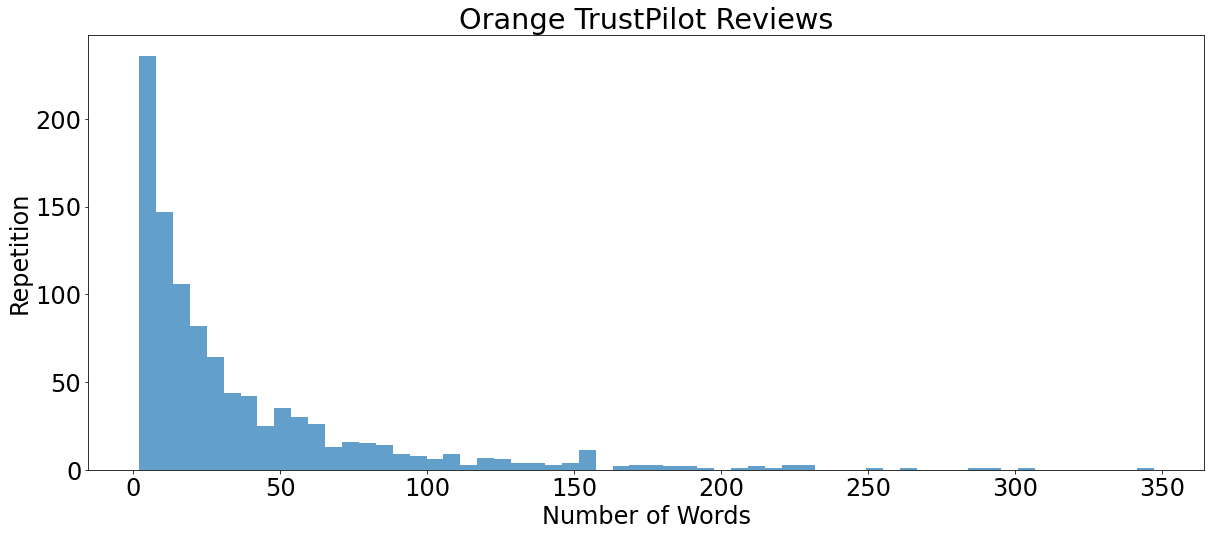

In [ ]:
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

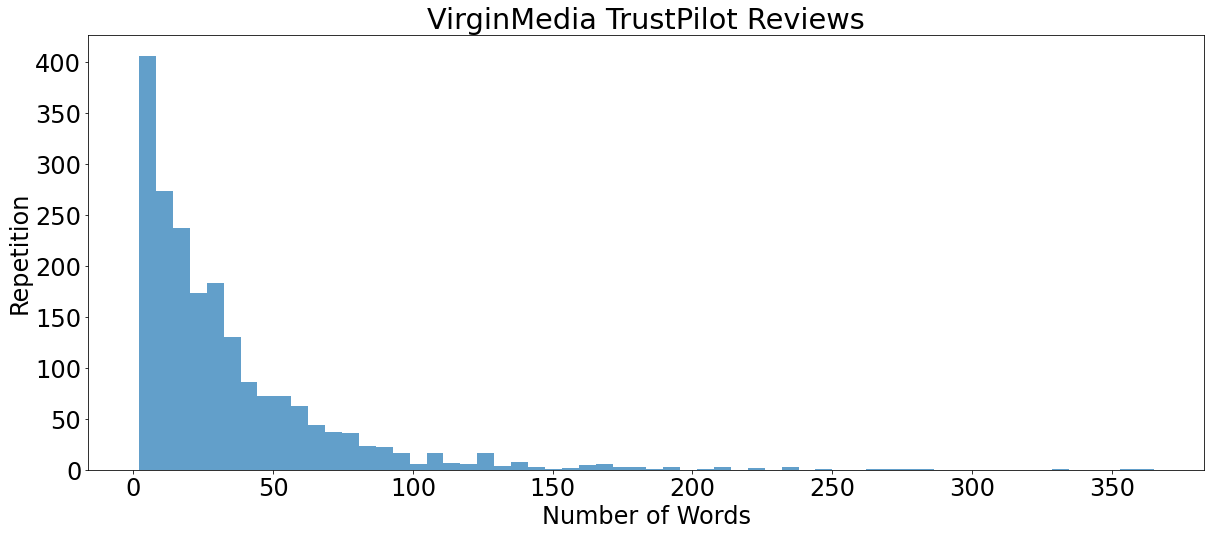

In [ ]:
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

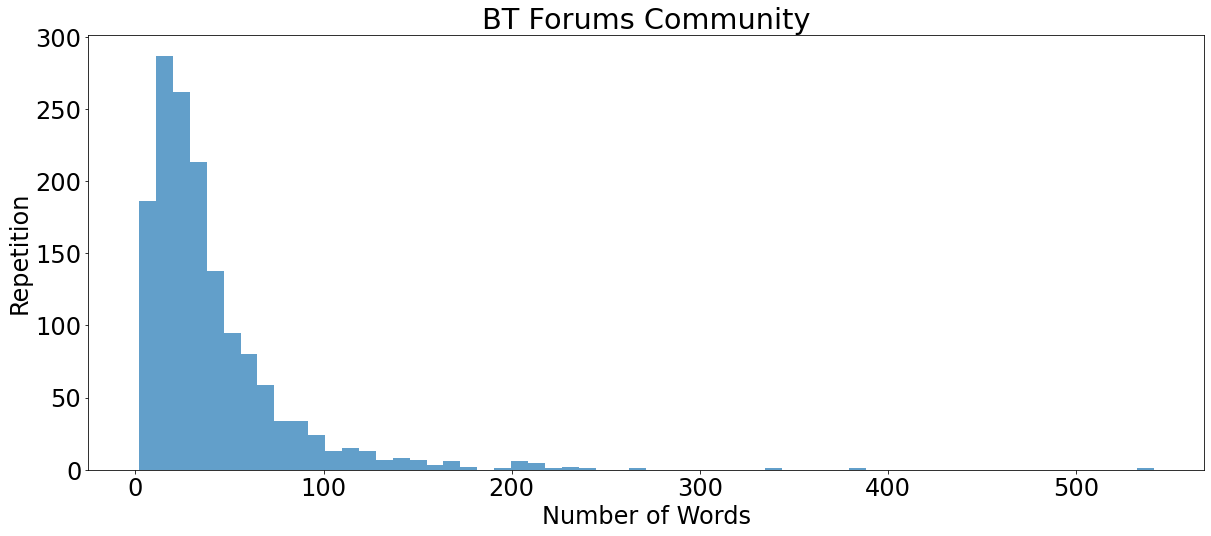

In [ ]:
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

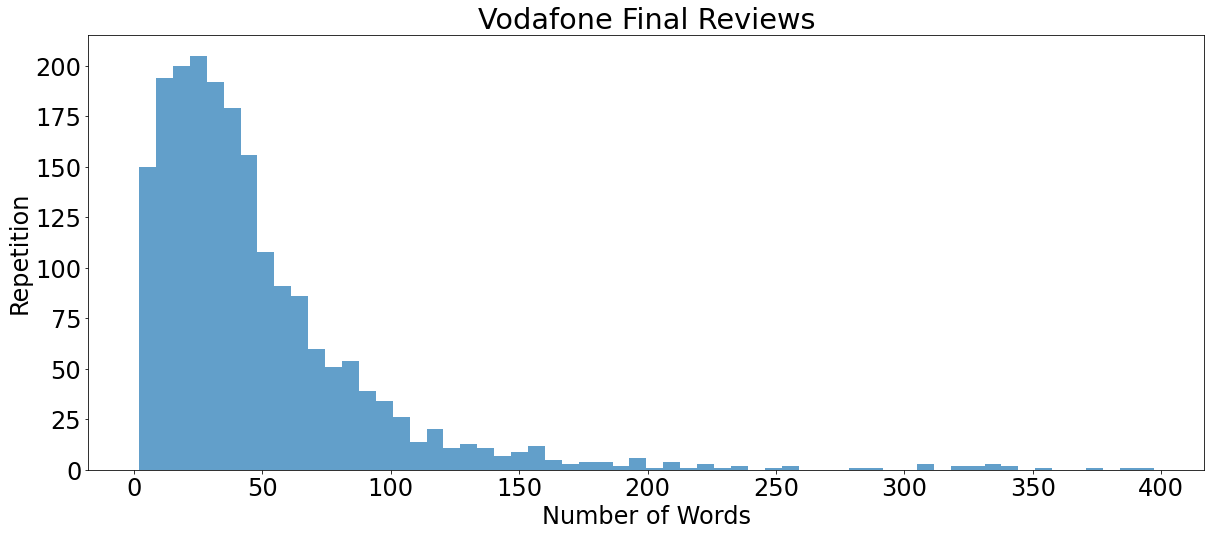

In [ ]:
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

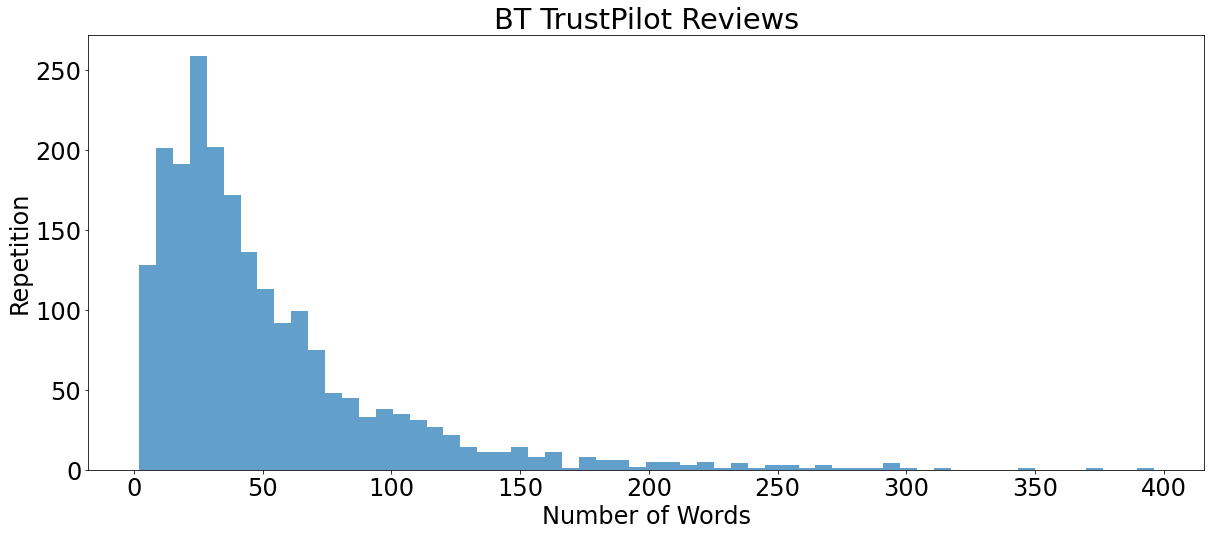

In [ ]:
k+=1
plt.figure(figsize = (20, 8))
plt.title(list(DataDict.keys())[k])
plt.xlabel('Number of Words')
plt.ylabel('Repetition')
plt.hist(DataDict[list(DataDict.keys())[k]], bins=60, alpha=0.7, histtype='bar')
plt.show()

In [17]:
Tables = True
import pandas as pd
import os
import numpy as np

In [18]:
List = [int(i) for i in data[data['Loss'] == data['Loss'].min()]['Doc Number'].values[0].strip('[]').split()]


In [20]:
Slash = '\\' + '\\'
if Tables :
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  for File in Folders : 
    ThisFile = os.path.join(Path,File,'01 GSDMMFiles','Clusters Number 5.csv')
    if os.path.exists(ThisFile) : 
      data = pd.read_csv(ThisFile)
      print(r'\hline ')
      print(str(File) + r'&  & & \\[0.5ex]')
      print(r' \hline')
      LeastLossWords = data[data['Loss'] == data['Loss'].min()]['Top Words'].values[0]
      List = [int(i) for i in data[data['Loss'] == data['Loss'].min()]['Doc Number'].values[0].strip('[]').split()]
      Sum = sum(List)
      AllWords = [i.split("'")[1::2] for i in LeastLossWords.split('\n')][1:]
      h = 0
      for i in AllWords : 
        h+=1
        print(f'Topic {h} & {str(",").join(i[:5])} & ** & {np.round(100*List[h-1]/Sum,2)}\\% {Slash}')
        if h == 5 : 
          print(f' & {str(",").join(i[5:])} & & {Slash} [0.5ex]')
        else : 
          print(f' & {str(",").join(i[5:])} & & {Slash} ')


\hline 
BTBusiness&  & & \\[0.5ex]
 \hline
Topic 1 & phone,number,line,business,broadband & ** & 17.85\% \\
 & tell,order,service,contract,time & & \\ 
Topic 2 & phone,number,work,business,line & ** & 17.32\% \\
 & connect,use,try,service,router & & \\ 
Topic 3 & email,send,account,address,use & ** & 17.32\% \\
 & access,password,message,outlook,business & & \\ 
Topic 4 & router,connect,try,ip,hub & ** & 19.16\% \\
 & set,address,business,use,work & & \\ 
Topic 5 & email,account,domain,business,address & ** & 28.35\% \\
 & try,want,set,host,need & & \\ [0.5ex]
\hline 
Orange TrustPilot Reviews&  & & \\[0.5ex]
 \hline
Topic 1 & phone,tell,customer,service,contract & ** & 19.51\% \\
 & pay,time,month,ask,orange & & \\ 
Topic 2 & customer,phone,service,year,contract & ** & 25.6\% \\
 & problem,deal,time,company,orange & & \\ 
Topic 3 & service,customer,network,signal,problem & ** & 13.86\% \\
 & phone,coverage,year,orange,deal & & \\ 
Topic 4 & service,customer,phone,company,time & ** & 1

In [22]:
# Slash = '\\' + '\\'
# if Tables :
#   Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data'
#   Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
#   Folders = [i for i in Folders if i[0]!= '0']
#   for File in Folders : 
#     ThisFile = os.path.join(Path,File,'01 GSDMMFiles','Clusters Number 5.csv')
#     if os.path.exists(ThisFile) : 
#       data = pd.read_csv(ThisFile)
#       OnesWords = data[data['Parameters']=='[0.1, 0.1]']['Top Words'].values[0]
#       AllWords = [i.split("'")[1::2] for i in OnesWords.split('\n')][1:]
#       for i in AllWords : 
#         print(f'{File} & {str(",").join(i[:5])} & ** {Slash}')
#         print(f'- & {str(",").join(i[5:])} & - {Slash}')

Slash = '\\' + '\\'
if Tables :
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  for File in Folders : 
    ThisFile = os.path.join(Path,File,'01 GSDMMFiles','Clusters Number 5.csv')
    if os.path.exists(ThisFile) : 
      data = pd.read_csv(ThisFile)
      print(r'\hline ')
      print(str(File) + r'&  & & \\[0.5ex]')
      print(r' \hline')
      LeastLossWords = data[data['Parameters']=='[0.1, 0.1]']['Top Words'].values[0]
      List = [int(i) for i in data[data['Parameters']=='[0.1, 0.1]']['Doc Number'].values[0].strip('[]').split()]
      Sum = sum(List)
      AllWords = [i.split("'")[1::2] for i in LeastLossWords.split('\n')][1:]
      h = 0
      for i in AllWords : 
        h+=1
        print(f'Topic {h} & {str(",").join(i[:5])} & ** & {np.round(100*List[h-1]/Sum,2)}\\% {Slash}')
        if h == 5 : 
          print(f' & {str(",").join(i[5:])} & & {Slash} [0.5ex]')
        else : 
          print(f' & {str(",").join(i[5:])} & & {Slash} ')


\hline 
BTBusiness&  & & \\[0.5ex]
 \hline
Topic 1 & phone,number,line,business,broadband & ** & 32.28\% \\
 & tell,order,service,time,work & & \\ 
Topic 2 & connect,try,router,work,use & ** & 27.56\% \\
 & ip,hub,business,phone,set & & \\ 
Topic 3 & email,account,address,business,send & ** & 3.15\% \\
 & domain,try,password,access,message & & \\ 
Topic 4 & domain,site,host,want,year & ** & 2.62\% \\
 & website,buy,post,loss,sell & & \\ 
Topic 5 & number,landline,business,check,service & ** & 34.38\% \\
 & help,phone,issue,wiring,recommend & & \\ [0.5ex]
\hline 
Orange TrustPilot Reviews&  & & \\[0.5ex]
 \hline
Topic 1 & service,customer,phone,year,problem & ** & 48.98\% \\
 & network,orange,deal,contract,signal & & \\ 
Topic 2 & phone,tell,customer,service,contract & ** & 5.3\% \\
 & pay,month,time,ask,year & & \\ 
Topic 3 & phone,buy,tell,internet,try & ** & 0.62\% \\
 & time,use,number,charge,credit & & \\ 
Topic 4 & lie,mugger,disjoint,stupidity,mark & ** & 0.18\% \\
 & interaction

In [ ]:
# def (Clusters,ShowResults = True) : 
#   global GetAllWords,SavedWords
#   global EmptySentences,EmptySentencesIndex
  
#   ClustersDiffs = []
#   BetweenDiffs = []
#   if ShowResults : print('Calculating Within Clusters Variance')
#   for Cl in Clusters['Top Words'].split('Cluster')[1:] : 
#     AllWords = Cl.split("'")[1::2]
#     if len(AllWords) > 5 : 
#       Diffs = []
#       for i in range(len(AllWords)-1) : 
#         for j in range(i+1,len(AllWords)) : 
#           if AllWords[i] in SavedWords.keys() and AllWords[j] in SavedWords.keys() : 
#             Diffs.append(float(WordDifference(AllWords[i],AllWords[j])))
#           else : 
#             Diffs.append(0)
#       if len(Diffs) <= 1 : 
#         EmptySentencesIndex+=1
#         EmptySentences[EmptySentencesIndex] = ['AllWords_Within',Clusters]
#         print(f'Total Empty Sentence {EmptySentencesIndex}')
#       ClustersDiffs.append(np.mean(Diffs))

# 9) Several Clusters

## 9.1) Functions

In [ ]:
# MainPath

'/content/drive/MyDrive/Data/PhD/Week 24 All Data'

In [ ]:
SeveralClusters =  True

if SeveralClusters : 
  MainPath,SelectedData = None,None
  def SCApplyGSDMM(K): 
    global MainPath,SelectedData
    if  os.path.exists(os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {K}.csv')) :
      print(f'Cluster {K} Exists')
      return None
    print(f'Applying for Cluster {K}')
    tokens_reviews = list(sent_to_words(data['CleanedText']))
    tokens_reviews = make_n_grams(tokens_reviews)
    reviews_lemmatized = lemmatization(tokens_reviews, allowed_postags=['NOUN', 'VERB', 'ADV'])
    reviews_lemmatized = remove_stopwords(reviews_lemmatized)
    print(reviews_lemmatized)
    np.random.seed(0)
    Results =[]
    Alpha = 0.1
    Beta = 0.1
    mgp = MovieGroupProcess(K=K, alpha=Alpha, beta=Beta, n_iters=30)
    vocab = set(x for review in reviews_lemmatized for x in review)
    n_terms = len(vocab)
    model = mgp.fit(reviews_lemmatized, n_terms)
    doc_count = np.array(mgp.cluster_doc_count)
    top_index = doc_count.argsort()[-20:][::-1]
    Loss =0
    for i in range(K) : 
      Loss += abs((1/K)-(doc_count[i]/sum(doc_count)))
    Results.append({'Parameters' : [Alpha,Beta],
                    'Loss':Loss,
                    'Doc Number':doc_count,
                    'Top Index':doc_count.argsort()[-20:][::-1],
                    'Top Words' : top_words(mgp,mgp.cluster_word_distribution, top_index, 10)[0]})
    
    ResultsDF = pd.DataFrame(columns = ['Parameters', 'Loss', 'Doc Number', 'Top Index', 'Top Words'])
    for n,i in enumerate(Results) : 
      ResultsDF.loc[n] = list(i.values())
    if not os.path.exists(os.path.join(MainPath,'SeveralClusters')) :  os.makedirs(os.path.join(MainPath,SelectedData,'SeveralClusters'))
    if not os.path.exists(os.path.join(MainPath,'SeveralClusters',SelectedData)) :  os.makedirs(os.path.join(MainPath,SelectedData,'SeveralClusters',SelectedData))
    if not os.path.exists(os.path.join(MainPath,'SeveralClusters',SelectedData,'01 GSDMMFiles')) :  os.makedirs(os.path.join(MainPath,'SeveralClusters',SelectedData,'01 GSDMMFiles'))
    ResultsDF.to_csv(os.path.join(MainPath,'SeveralClusters',SelectedData,'01 GSDMMFiles',f'Clusters Number {K}.csv'))  # saving in 01 folder
    return Results  

## 9.2) Reading Data

Read data files and other needed files

In [ ]:
if SeveralClusters : 
  MainPath = r'/content/drive/MyDrive/Data/PhD/Week 24 All Data'
  DataFiles = os.listdir(os.path.join(MainPath,'0 Data'))
  DataFiles = [i for i in DataFiles if i[0:7]=='Cleaned']
  print(DataFiles)

['Cleaned_Orange TrustPilot Reviews.csv', 'Cleaned_BT Forums Community.csv', 'Cleaned_BTBusiness.csv', 'Cleaned_VirginMedia TrustPilot Reviews.csv', 'Cleaned_Vodafone Final Reviews.csv', 'Cleaned_BT TrustPilot Reviews.csv']


## 9.3) Applying GSDMM

In [ ]:
if SeveralClusters : 
  for ThisData in tqdm(DataFiles) : 
    data = pd.read_csv(os.path.join(MainPath,'0 Data',ThisData))
    SelectedData= ThisData.split('.')[0].split('_')[1]
    for k in [3,5,10,15,20] : 
      SCApplyGSDMM(k)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
if SeveralClusters : 
  Round = 2
  Path = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'
  Folders = [name for name in os.listdir(Path) if os.path.isdir(os.path.join(Path, name)) ]
  Folders = [i for i in Folders if i[0]!= '0']
  DataDict = {}
  for File in Folders :
    DataDict[File] = {}
    for Cluster in os.listdir(os.path.join(Path,File,'01 GSDMMFiles')) : 
      C = Cluster.strip('.csv')
      data = pd.read_csv(os.path.join(Path,File,'01 GSDMMFiles',Cluster))
      for F in ['Parameters','Loss','Doc Number','Top Words'] : 
        DataDict[File][f'{C}_{F}'] = data[F][0]
  DataDict      

In [ ]:
if SeveralClusters : pd.DataFrame(DataDict).T.head()

In [ ]:
if SeveralClusters : pd.DataFrame(DataDict).T.to_csv('/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_ManyCusters.csv')

In [ ]:
pd.DataFrame(DataDict).T

,Clusters Number 3_Parameters,Clusters Number 3_Loss,Clusters Number 3_Doc Number,Clusters Number 3_Top Words,Clusters Number 10_Parameters,Clusters Number 10_Loss,Clusters Number 10_Doc Number,Clusters Number 10_Top Words,Clusters Number 15_Parameters,Clusters Number 15_Loss,Clusters Number 15_Doc Number,Clusters Number 15_Top Words,Clusters Number 20_Parameters,Clusters Number 20_Loss,Clusters Number 20_Doc Number,Clusters Number 20_Top Words,Clusters Number 5_Parameters,Clusters Number 5_Loss,Clusters Number 5_Doc Number,Clusters Number 5_Top Words
Orange TrustPilot Reviews,"[0.1, 0.1]",0.594522,[450 36 512],"\nCluster 2 : [('phone', 567), ('customer', 36...","[0.1, 0.1]",1.395992,[ 0 0 0 2 0 288 375 0 0 333],"\nCluster 6 : [('service', 188), ('customer', ...","[0.1, 0.1]",1.607081,[ 0 0 0 0 0 0 0 9 54 0 467 ...,"\nCluster 14 : [('phone', 537), ('tell', 343),...","[0.1, 0.1]",1.671944,[ 0 0 0 1 167 0 3 0 0 0 425 ...,"\nCluster 10 : [('service', 192), ('customer',...","[0.1, 0.1]",0.783968,[ 0 254 306 8 430],"\nCluster 4 : [('phone', 528), ('tell', 331), ..."
BT Forums Community,"[0.1, 0.1]",0.204515,[396 656 454],"\nCluster 1 : [('email', 326), ('try', 262), (...","[0.1, 0.1]",0.773705,[ 1 140 75 297 313 328 33 16 247 56],"\nCluster 5 : [('email', 289), ('try', 176), (...","[0.1, 0.1]",0.920053,[127 2 219 119 3 5 136 0 0 0 115 2...,"\nCluster 13 : [('email', 278), ('try', 179), ...","[0.1, 0.1]",1.120717,[ 2 0 156 22 169 0 2 0 125 0 238 ...,"\nCluster 16 : [('hub', 200), ('connect', 199)...","[0.1, 0.1]",0.361753,[ 61 269 347 489 340],"\nCluster 3 : [('try', 173), ('tv', 161), ('co..."
BTBusiness,"[0.1, 0.1]",0.200355,[ 94 119 163],"\nCluster 2 : [('phone', 213), ('number', 135)...","[0.1, 0.1]",1.048936,[ 3 16 4 6 21 91 0 16 63 156],"\nCluster 9 : [('phone', 207), ('number', 134)...","[0.1, 0.1]",1.10461,[ 0 3 6 33 0 33 46 13 0 2 87 ...,"\nCluster 14 : [('phone', 204), ('number', 134...","[0.1, 0.1]",1.254255,[ 12 16 13 70 86 3 0 0 0 4 15 ...,"\nCluster 19 : [('phone', 213), ('number', 136...","[0.1, 0.1]",0.491489,[ 76 118 15 43 124],"\nCluster 4 : [('phone', 189), ('number', 129)..."
VirginMedia TrustPilot Reviews,"[0.1, 0.1]",0.318182,[680 345 955],"\nCluster 2 : [('service', 749), ('customer', ...","[0.1, 0.1]",1.277778,[186 0 0 2 0 679 0 131 0 982],"\nCluster 9 : [('service', 796), ('customer', ...","[0.1, 0.1]",1.455556,[ 0 0 10 1 0 0 644 0 0 0 0 1...,"\nCluster 14 : [('service', 783), ('customer',...","[0.1, 0.1]",1.693939,[ 0 0 616 0 0 0 0 0 0 ...,"\nCluster 19 : [('service', 854), ('customer',...","[0.1, 0.1]",0.942424,[ 148 0 107 662 1063],"\nCluster 4 : [('service', 864), ('customer', ..."
Vodafone Final Reviews,"[0.1, 0.1]",0.454101,[ 450 420 1109],"\nCluster 2 : [('phone', 1197), ('vodafone', 9...","[0.1, 0.1]",1.270541,[ 1 0 48 170 98 393 0 0 9 ...,"\nCluster 9 : [('phone', 1257), ('vodafone', 1...","[0.1, 0.1]",1.511066,[ 0 0 11 0 0 0 0 523 0 ...,"\nCluster 14 : [('phone', 1201), ('vodafone', ...","[0.1, 0.1]",1.679788,[ 0 0 9 0 0 8 0 0 0 ...,"\nCluster 19 : [('phone', 1353), ('vodafone', ...","[0.1, 0.1]",0.976453,[ 325 38 95 159 1362],"\nCluster 4 : [('phone', 1315), ('vodafone', 1..."
BT TrustPilot Reviews,"[0.1, 0.1]",0.526619,[ 439 402 1244],"\nCluster 2 : [('service', 879), ('phone', 825...","[0.1, 0.1]",1.382734,[ 18 348 0 0 471 0 0 0 0 ...,"\nCluster 9 : [('service', 880), ('phone', 808...","[0.1, 0.1]",1.483933,[ 0 0 0 0 0 0 0 288 0 ...,"\nCluster 14 : [('service', 1004), ('phone', 9...","[0.1, 0.1]",1.632854,[ 0 0 69 0 1 0 0 0 185 ...,"\nCluster 19 : [('service', 980), ('phone', 93...","[0.1, 0.1]",0.858513,[ 262 15 161 335 1312],"\nCluster 4 : [('service', 920), ('phone', 857..."


## 9.4) Apply CFs

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Data/PhD/Week 24 All Data/0 Data/_ManyCusters.csv')
# data.head()

In [ ]:
# DataDict = {k:{i:{} for i in [3,5,10,15,20]} for k in data['Unnamed: 0'].tolist()}
# for i in [3,5,10,15,20] : 
#   for Type in data['Unnamed: 0'].tolist() : 
#     DataDict[Type][i] = [data[data['Unnamed: 0']==Type][f'Clusters Number {i}_Loss'].values[0],data[data['Unnamed: 0']==Type][f'Clusters Number {i}_Doc Number'].values[0],data[data['Unnamed: 0']==Type][f'Clusters Number {i}_Top Words'].values[0]]

# DataDict

In [ ]:
if SeveralClusters : 
  EnglishWE = pd.read_csv(os.path.join(MainPath ,'0 Data','_AllWordsWE.csv'))
  EnglishWE.head()

In [ ]:
if SeveralClusters : 
  EnglishWEDict = {}
  for i in range(EnglishWE.shape[0]) : 
    EnglishWEDict[EnglishWE['Word'][i]] = [EnglishWE[str(j)][i] for j in range(300)]

In [ ]:
if SeveralClusters : 
  EnglishWE = pd.read_csv(os.path.join(MainPath ,'0 Data','_AllWordsWE.csv'))
  GetAllWords = []
  MainPath = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    for w in range(3,21) : 
      ThisFile =os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {w}.csv')
      

      if os.path.exists(ThisFile) : 
        ResultsData = pd.read_csv(ThisFile)  
        # for i in range(w) : 
        #   ResultsData[f'Cluster {i}'] = ResultsData[f'Cluster {i}'].apply(lambda x :  ClusterClean(x))
        for i in ResultsData['Top Words'].tolist() : 
          for j in i.split('Cluster')[1:] : 
            GetAllWords.extend(j.split("'")[1::2]) 
  print(f'\nTotal Number of Unique Words {str(len(set(GetAllWords)))}')
  p = 0
  for i in set(GetAllWords) : 
    if i in EnglishWEDict.keys() : 
      p+=1
  print(f'Number of Exist Words is {p} and Percentage of Words Exists in English Words {100*np.round(p/len(set(GetAllWords)),3)} %')
  SavedWords = {}
  for word in GetAllWords : 
    if word in EnglishWEDict.keys() : 
      SavedWords[word] = EnglishWEDict[word]
  print(f'Number of Words in SavedWords {len(list(SavedWords.keys()))} ')


Total Number of Unique Words 289
Number of Exist Words is 275 and Percentage of Words Exists in English Words 95.19999999999999 %
Number of Words in SavedWords 275 


In [ ]:
if SeveralClusters : 
  MainPath = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    for w in range(3,21) : 
      ThisFile = os.path.join(MainPath,SelectedData,'01 GSDMMFiles',f'Clusters Number {w}.csv')

      if os.path.exists(ThisFile) : 
        ResultsData = pd.read_csv(ThisFile)  
        ResultsData['Parameters'] = ResultsData['Parameters'].apply(lambda x : [float(i) for i in x.strip('[]').split(',')])
        ResultsData['Doc Number'] = ResultsData['Doc Number'].apply(lambda x : [int(i) for i in x.strip('[]').split()])
        ResultsData['Top Index'] = ResultsData['Top Index'].apply(lambda x : [int(i) for i in x.strip('[]').split()])
        Losses = ResultsData['Loss'].tolist()
        Losses.sort()
        Losses = ResultsData['Loss'].tolist()
        Losses.sort()

        SortedResults = []
        for Loss in Losses : 
          for i in range(ResultsData.shape[0]) :
            if Loss ==ResultsData['Loss'][i] : 
              SortedResults.append({k:v for k,v in zip(list(ResultsData.keys()),[ResultsData[j][i] for j in list(ResultsData.keys())])})

        for i in tqdm (range(len(SortedResults))) : 
          for Cl in SortedResults[i]['Top Words'].split('Cluster')[1:] : 
            AllWords = Cl.split("'")[1::2]
        
        CostFunctionResults = {}
        for i in tqdm (range(len(SortedResults))) : 
          ThisClusterValue = list(ClustersCostFunctionAllWords(SortedResults[i],ShowResults=False))
          CostFunctionResults[i] = {'AllBCV':ThisClusterValue[0],'AllWCV':ThisClusterValue[1]}
      
        for i in tqdm (range(len(SortedResults))) : 
          ThisClusterValue = list(ClustersCostFunctionMean(SortedResults[i],ShowResults=False))
          CostFunctionResults[i]['MeanBCV'] = ThisClusterValue[0]
          CostFunctionResults[i]['MeanWCV'] = ThisClusterValue[1]
      
        for i in tqdm (range(len(SortedResults))) : 
          ThisClusterValue = list(ClustersCostFunctionMin(SortedResults[i],ShowResults=False))
          CostFunctionResults[i]['MinBCV'] = ThisClusterValue[0]
          CostFunctionResults[i]['MinWCV'] = ThisClusterValue[1]

        for i in tqdm (range(len(SortedResults))) : 
          ThisClusterValue = list(ClustersCostFunctionMax(SortedResults[i],ShowResults=False))
          CostFunctionResults[i]['MaxBCV'] = ThisClusterValue[0]
          CostFunctionResults[i]['MaxWCV'] = ThisClusterValue[1]
          CostFunctionResults[i]['CohBCV'] = ClustersCostFunctionCoherence(SortedResults[i],ShowResults=False)


        for i in tqdm(CostFunctionResults.keys()): 
          AllBCV =  CostFunctionResults[i]['AllBCV']
          AllWCV =  CostFunctionResults[i]['AllWCV']
          MeanBCV =  CostFunctionResults[i]['MeanBCV']
          MinBCV =  CostFunctionResults[i]['MinBCV']
          MaxBCV =  CostFunctionResults[i]['MaxBCV']    
          CohBCV = CostFunctionResults[i]['CohBCV']                 

          ThisAllD,ThisMeanD,ThisMinD,ThisMaxD,ThisCohD = {},{},{},{},{}
          l=0
          for a in np.linspace(0.01, 1, num=5) : 
            for b in np.linspace(0.01, 1, num=5): 
              l+=1
              ThisAllD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(AllBCV))]
              ThisMeanD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MeanBCV))]
              ThisMinD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MinBCV))]
              ThisMaxD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(MaxBCV))]
              ThisCohD[l] = [a,b,float(a*float(AllWCV)) - float(b*float(CohBCV))]
          CostFunctionResults[i]['AllCF'] = ThisAllD
          CostFunctionResults[i]['MeanCF'] = ThisMeanD
          CostFunctionResults[i]['MinCF'] = ThisMinD
          CostFunctionResults[i]['MaxCF'] = ThisMaxD
          CostFunctionResults[i]['CohCF'] = ThisCohD
        for i in range(len(SortedResults)) : 
          for Item in ['AllBCV','AllWCV','MeanBCV','MinWCV','MaxBCV','MeanWCV','MinBCV','MaxWCV','CohBCV','AllCF','MeanCF','MinCF','MaxCF','CohCF'] : 
            SortedResults[i][Item] = CostFunctionResults[i][Item]

        Alpha,Beta,A,B,AllBCV,MeanBCV,MinBCV,MaxBCV,CohBCV,WCV,IDs,AllCF,MeanCF,MinCF,MaxCF,CohCF = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
        n=0
        for i in SortedResults : 
          for k in i['MeanCF'].values() : 
            MeanCF.append(k[2])
          for k in i['MinCF'].values() : 
            MinCF.append(k[2])
          for k in i['MaxCF'].values() : 
            MaxCF.append(k[2])      
          for k in i['CohCF'].values() : 
            CohCF.append(k[2])      
          for j,k in i['AllCF'].items() : 
            n+=1
            IDs.append(n)
            AllCF.append(k[2])
            AllBCV.append(i['AllBCV'])
            MeanBCV.append(i['MeanBCV'])
            MinBCV.append(i['MinBCV'])
            MaxBCV.append(i['MaxBCV'])
            CohBCV.append(i['CohBCV'])
            WCV.append(i['AllWCV'])
            A.append(k[0])
            B.append(k[1])
            Alpha.append(i['Parameters'][0])
            Beta.append(i['Parameters'][1])

        ResultsDF = pd.DataFrame(list(zip(IDs,Alpha,Beta,A,B,WCV,AllBCV,AllCF,MeanBCV,MeanCF,MinBCV,MinCF,MaxBCV,MaxCF,CohBCV,CohCF)),columns = ['IDs','Alpha','Beta','A','B','WCV','AllBCV','AllCF','MeanBCV','MeanCF','MinBCV','MinCF','MaxBCV','MaxCF','CohBCV','CohCF'])
        if not os.path.exists(os.path.join(MainPath,SelectedData,'02 Result DF'))  :  os.makedirs(os.path.join(MainPath,SelectedData,'02 Result DF'))
        ResultsDF.to_csv(os.path.join(MainPath,SelectedData,'02 Result DF' ,f'ResultsDF{w}.csv'))

100%|██████████| 1/1 [00:00<00:00, 793.77it/s]


In [ ]:
MainPath

'/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'

In [ ]:
if SeveralClusters : 
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    for w in range(3,21) : 
      ThisFile = os.path.join(MainPath,SelectedData,'02 Result DF' ,f'ResultsDF{w}.csv')
      if not os.path.exists(os.path.join(MainPath,SelectedData,'03 Best Values')) :  os.makedirs(os.path.join(MainPath,SelectedData,'03 Best Values'))
      if os.path.exists(ThisFile) : 
        ResultsDF = pd.read_csv(ThisFile) 
        if 'index' in ResultsDF.columns : ResultsDF.drop(['index'],axis=1,inplace=True)
        if 'Unnamed: 0' in ResultsDF.columns : ResultsDF.drop(['Unnamed: 0'],axis=1,inplace=True)
        CalculatedCFs = ['AllCF','MeanCF','MinCF','MaxCF','CohCF']
        CFsDataFrame = pd.DataFrame()
        for CF in CalculatedCFs : 
          ResultLists = []
          for A in ResultsDF['A'].unique() : 
            for B in ResultsDF['B'].unique() : 
              MinCF = ResultsDF[ResultsDF['A'] == A][ResultsDF['B'] == B][CF].min()
              ThisList = ResultsDF[ResultsDF[CF] == MinCF].iloc[0,:].tolist()
              ResultLists.append([ThisList[0]] + ThisList[3:5]+ThisList[1:3]+ThisList[5:])
          col_names = ['Trial Number','A','B','Alpha','Beta','WCV','AllBCV','AllCF','MeanBCV','MeanCF','MinBCV','MinCF','MaxBCV','MaxCF','CohBCV','CohCF']
          
          ThisCFsDataFrame = pd.DataFrame(ResultLists, columns=col_names)
          ThisCFsDataFrame['SelectedCF'] = CF
          print(tabulate(ResultLists, headers=col_names, tablefmt="fancy_grid"))
          CFsDataFrame = pd.concat([CFsDataFrame,ThisCFsDataFrame],axis=0)
        CFsDataFrame.to_csv(os.path.join(MainPath,SelectedData,'03 Best Values',f'BestCFValue{w}.csv'))        

Streaming output truncated to the last 5000 lines.
│             17 │ 0.7525 │ 0.2575 │     0.1 │    0.1 │ 1.59982 │  1.60095 │  0.791621    │  0.397086 │  1.10162   │ 0.594843 │  1.05069   │  18.5345 │  -3.56876  │ -0.0931898 │ 1.22786   │
├────────────────┼────────┼────────┼─────────┼────────┼─────────┼──────────┼──────────────┼───────────┼────────────┼──────────┼────────────┼──────────┼────────────┼────────────┼───────────┤
│             18 │ 0.7525 │ 0.505  │     0.1 │    0.1 │ 1.59982 │  1.60095 │  0.395385    │  0.397086 │  1.00334   │ 0.594843 │  0.90347   │  18.5345 │  -8.15603  │ -0.0931898 │ 1.25093   │
├────────────────┼────────┼────────┼─────────┼────────┼─────────┼──────────┼──────────────┼───────────┼────────────┼──────────┼────────────┼──────────┼────────────┼────────────┼───────────┤
│             19 │ 0.7525 │ 0.7525 │     0.1 │    0.1 │ 1.59982 │  1.60095 │ -0.000850211 │  0.397086 │  0.905059  │ 0.594843 │  0.756247  │  18.5345 │ -12.7433   │ -0.0931898 │ 1.27399   │

In [ ]:
if SeveralClusters : 
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    Paths = [os.path.join(MainPath,SelectedData,'02 Result DF')  ,os.path.join(MainPath,SelectedData,'03 Best Values')]



    for Path in Paths : 
      if len(Path) > 1 : 
        for File in os.listdir(Path) : 
          ThisFile = os.path.join(Path,File)
          data = pd.read_csv(ThisFile)
          print(f'for file {File} Number of Nulss is {set(data.isna().sum().values)}')

for file ResultsDF3.csv Number of Nulss is {0}
for file ResultsDF10.csv Number of Nulss is {0}
for file ResultsDF15.csv Number of Nulss is {0}
for file ResultsDF20.csv Number of Nulss is {0}
for file ResultsDF5.csv Number of Nulss is {0}
for file BestCFValue3.csv Number of Nulss is {0}
for file BestCFValue10.csv Number of Nulss is {0}
for file BestCFValue15.csv Number of Nulss is {0}
for file BestCFValue20.csv Number of Nulss is {0}
for file BestCFValue5.csv Number of Nulss is {0}
for file ResultsDF3.csv Number of Nulss is {0}
for file ResultsDF10.csv Number of Nulss is {0}
for file ResultsDF15.csv Number of Nulss is {0}
for file ResultsDF20.csv Number of Nulss is {0}
for file ResultsDF5.csv Number of Nulss is {0}
for file BestCFValue3.csv Number of Nulss is {0}
for file BestCFValue10.csv Number of Nulss is {0}
for file BestCFValue15.csv Number of Nulss is {0}
for file BestCFValue20.csv Number of Nulss is {0}
for file BestCFValue5.csv Number of Nulss is {0}
for file ResultsDF3.csv Numb

## 9.5) Evaluation Methods

In [ ]:
MainPath = '/content/drive/MyDrive/Data/PhD/Week 24 All Data/SeveralClusters'
SeveralClusters = True
import pandas as pd
import os

In [ ]:
if SeveralClusters : 
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    for w in range(3,21) : 
      ThisFile =os.path.join(MainPath,SelectedData,'02 Result DF',f'ResultsDF{w}.csv')
      if os.path.exists(ThisFile) : 
        data = pd.read_csv(ThisFile)  
        print(f'for clutser {w} shape is  {data.shape}')
        for alpha in data['Alpha'].unique() : 
          for beta in data['Beta'].unique() : 
            if len(data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()) !=1 : print('error')
            if len(data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()) !=1 : print('error')
            if len(data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()) !=1 : print('error')
            if len(data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()) !=1 : print('error')
            if len(data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()) !=1 : print('error')

        AllBCVDict = {}
        n=0
        for alpha in data['Alpha'].unique() : 
          for beta in data['Beta'].unique() : 
            n+=1
            AllBCVDict[n] = {'Alpha': alpha,
                            'Beta':beta,
                            'AllBCV':data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()[0],
                            'MeanBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()[0],
                            'MinBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()[0],
                            'MaxBCV':data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()[0],
                            'WBCV':data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0],
                            'CohBCV':data[data['Alpha']==alpha][data['Beta']==beta]['CohBCV'].unique()[0],
                            'EqualParameters_AllBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['AllBCV'].unique()[0],
                            'EqualParameters_MeanBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MeanBCV'].unique()[0],
                            'EqualParameters_MinBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MinBCV'].unique()[0],
                            'EqualParameters_MaxBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['MaxBCV'].unique()[0],
                            'EqualParameters_CohBCV' : data[data['Alpha']==alpha][data['Beta']==beta]['WCV'].unique()[0] -data[data['Alpha']==alpha][data['Beta']==beta]['CohBCV'].unique()[0]}
        data = pd.DataFrame(AllBCVDict).T
        data.fillna(99,inplace=True)
        data['MincF'] = data.apply(lambda x : min(x.AllBCV,x.MeanBCV,x.MinBCV,x.MaxBCV,x.WBCV,x.CohBCV,x.EqualParameters_AllBCV,x.EqualParameters_MeanBCV,x.EqualParameters_MinBCV,x.EqualParameters_MaxBCV,x.EqualParameters_CohBCV),axis=1)
        data = data.sort_values(['Alpha', 'Beta'],ascending = [True, True])

        if not os.path.exists(os.path.join(MainPath,SelectedData, '06 Combined CFs')) :  os.makedirs(os.path.join(MainPath,SelectedData, '06 Combined CFs'))
        data.to_csv(os.path.join(MainPath,SelectedData, '06 Combined CFs',f'CombinedCFs{w}.csv'))

for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (25, 17)
for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (25, 17)
for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (25, 17)
for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (25, 17)
for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (25, 17)
for clutser 3 shape is  (25, 17)
for clutser 5 shape is  (25, 17)
for clutser 10 shape is  (25, 17)
for clutser 15 shape is  (25, 17)
for clutser 20 shape is  (

In [ ]:
if SeveralClusters : 
  MinCFDict = {}
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    MinCFDict[SelectedData] = {}
    for w in [3,5,10,15,20] : 
      ThisFile = os.path.join(MainPath,SelectedData,'06 Combined CFs' ,f'CombinedCFs{w}.csv')
      if os.path.exists(ThisFile) : 
        ResultsDF = pd.read_csv(ThisFile) 
        print(ResultsDF.shape)
        MinCFDict[SelectedData][w] = ResultsDF['MincF'][0]
  MinCFDict

(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)
(1, 15)


In [ ]:
MinCFDict[Type].values()

KeyError: ignored

In [ ]:
MinCFDict[Type].values()

dict_values([-3.201334336471934, -3.180329978089058, -4.138763854572372, -2.626108558472658, -3.7598539109208375])

In [ ]:
plt.rcParams.update({'font.size': 18})

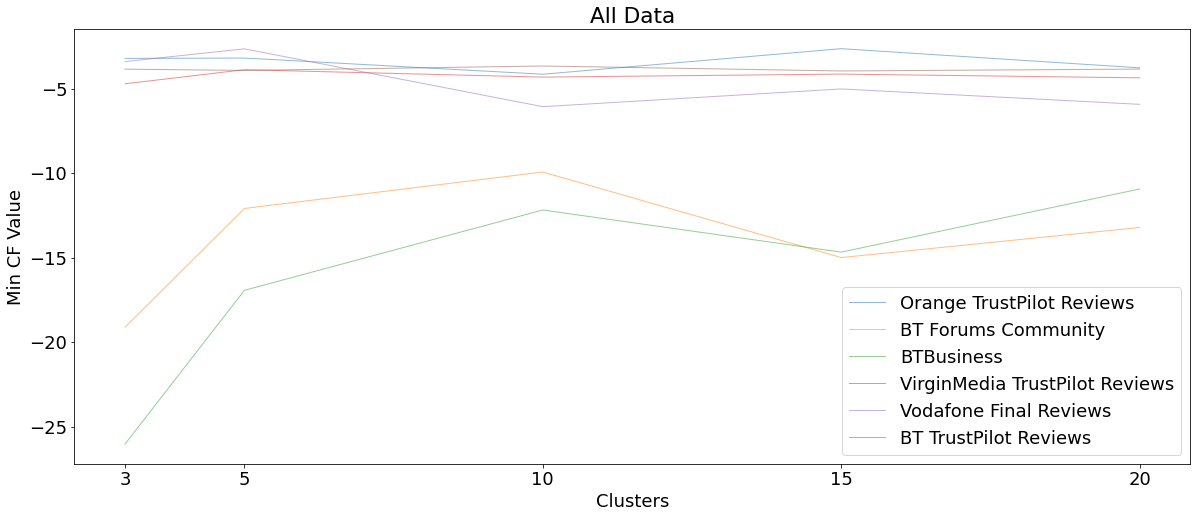

In [ ]:
if SeveralClusters : 
  plt.figure(figsize = (20, 8))
  plt.title('All Data')
  plt.xlabel('Clusters')
  plt.ylabel('Min CF Value')

  for Type in MinCFDict.keys() : 
    plt.plot([3,5,10,15,20],list(MinCFDict[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

  plt.xticks([3,5,10,15,20])
  plt.legend()
  plt.show()

In [ ]:
SeveralClusters= True

In [ ]:
if SeveralClusters : 
  MinCFDict = {}
  for SelectedData in ['Orange TrustPilot Reviews','BT Forums Community','BTBusiness','VirginMedia TrustPilot Reviews','Vodafone Final Reviews','BT TrustPilot Reviews'] : 
    MinCFDict[SelectedData] = {}
    for Type in ['WCV','AllBCV', 'AllCF', 'MeanBCV', 'MeanCF', 'MinBCV', 'MinCF', 'MaxBCV','MaxCF', 'CohBCV', 'CohCF'] : 
      MinCFDict[SelectedData][Type] = {}
      for w in [3,5,10,15,20] : 
        ThisFile = os.path.join(MainPath,SelectedData,'03 Best Values' ,f'BestCFValue{w}.csv')
        if os.path.exists(ThisFile) : 
          ResultsDF = pd.read_csv(ThisFile) 
          # print(ResultsDF.head())
          MinCFDict[SelectedData][Type][w] = ResultsDF[Type].min()
          
  MinCFDict

In [ ]:
if SeveralClusters :  MinCFDict.keys()

In [ ]:
k=-1
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
ThisData

{'WCV': {3: 1.3159031492954127,
  5: 1.2836143391710833,
  10: 1.2087748898102826,
  15: 1.279320892959037,
  20: 1.258056533541866},
 'AllBCV': {3: 1.2643490528104735,
  5: 1.2533632146571003,
  10: 1.186996172257395,
  15: 1.2445253576115496,
  20: 1.2544080183537958},
 'AllCF': {3: -1.251190021317519,
  5: -1.2405270712653895,
  10: -1.174908423359292,
  15: -1.2317321486819592,
  20: -1.241827453018377},
 'MeanBCV': {3: 0.1348080473409361,
  5: 0.175146115968837,
  10: 0.2149329912888943,
  15: 0.1603873658402566,
  20: 0.1949990581145229},
 'MeanCF': {3: -0.121649015847982,
  5: -0.1623099725771261,
  10: -0.2028452423907914,
  15: -0.1475941569106662,
  20: -0.1824184927791042},
 'MinBCV': {3: 0.3394476105207542,
  5: 0.4448161356161471,
  10: 0.3713452417101717,
  15: 0.4448161356161471,
  20: 0.4153260334294451},
 'MinCF': {3: -0.3262885790278001,
  5: -0.4319799922244363,
  10: -0.3592574928120689,
  15: -0.4320229266865568,
  20: -0.4027454680940264},
 'MaxBCV': {3: 4.5172374

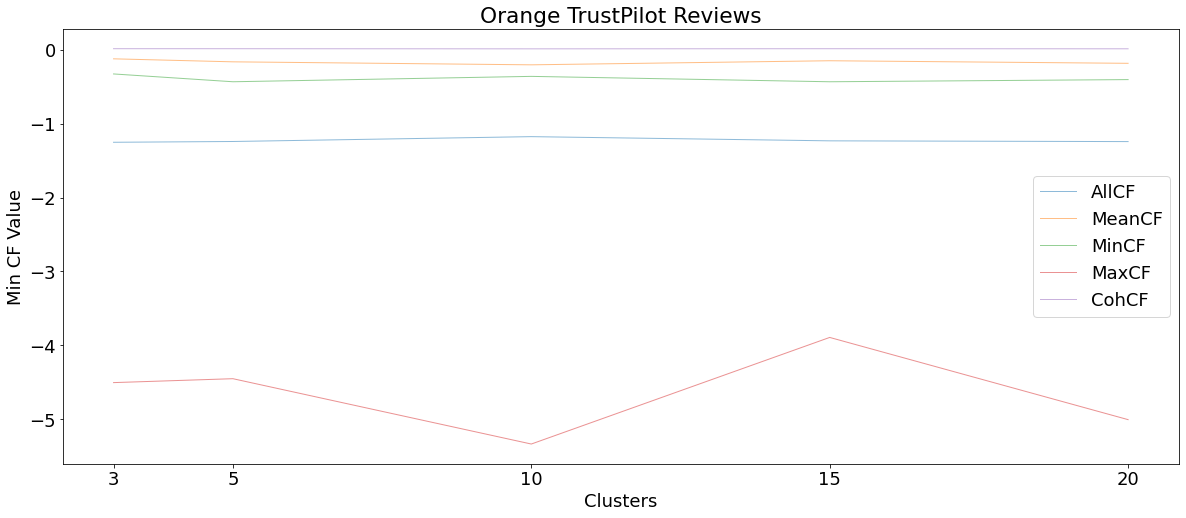

In [ ]:
k=-1
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()

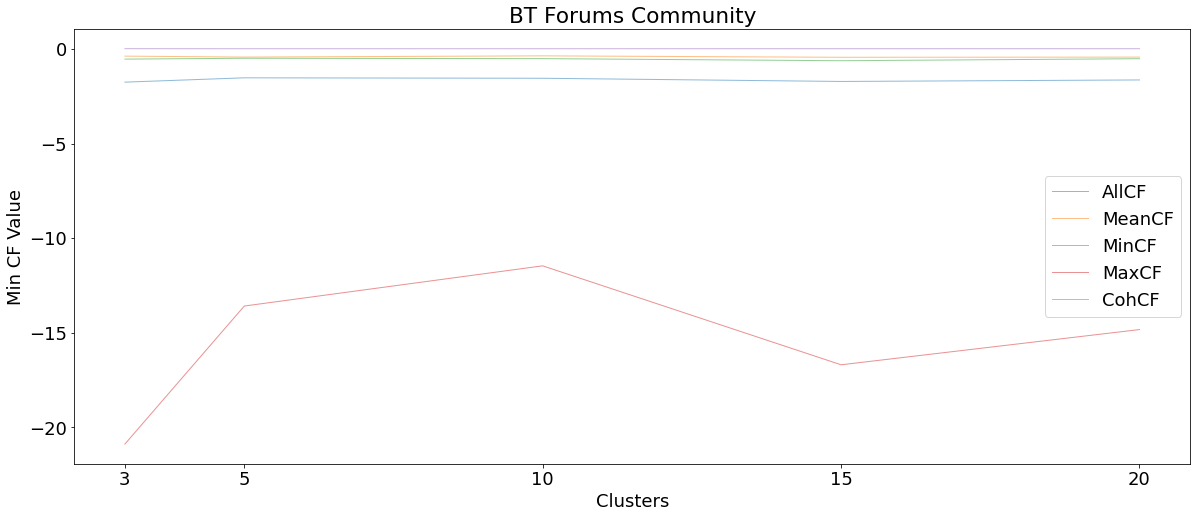

In [ ]:
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()

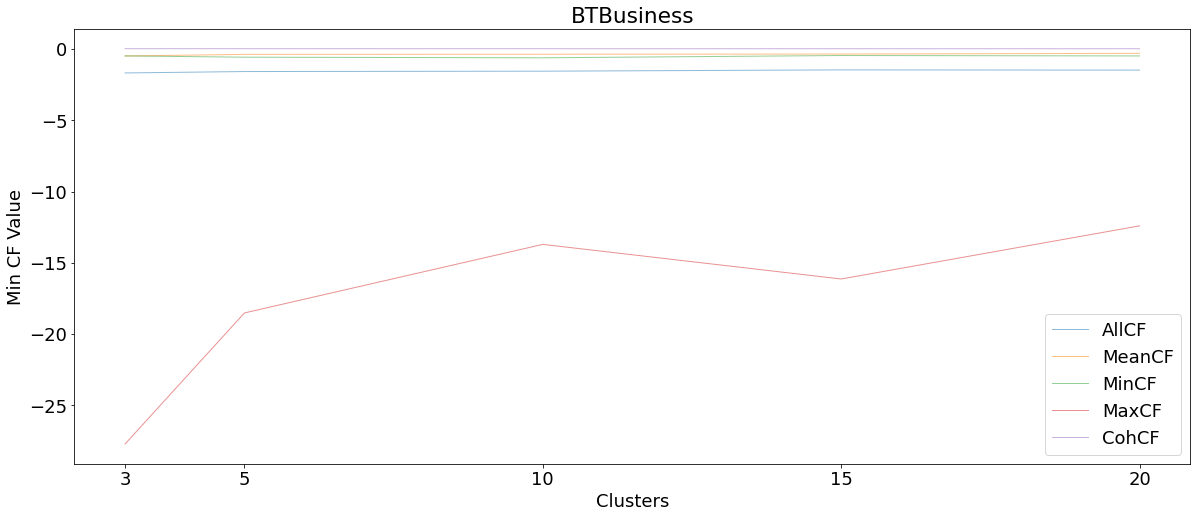

In [ ]:
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()

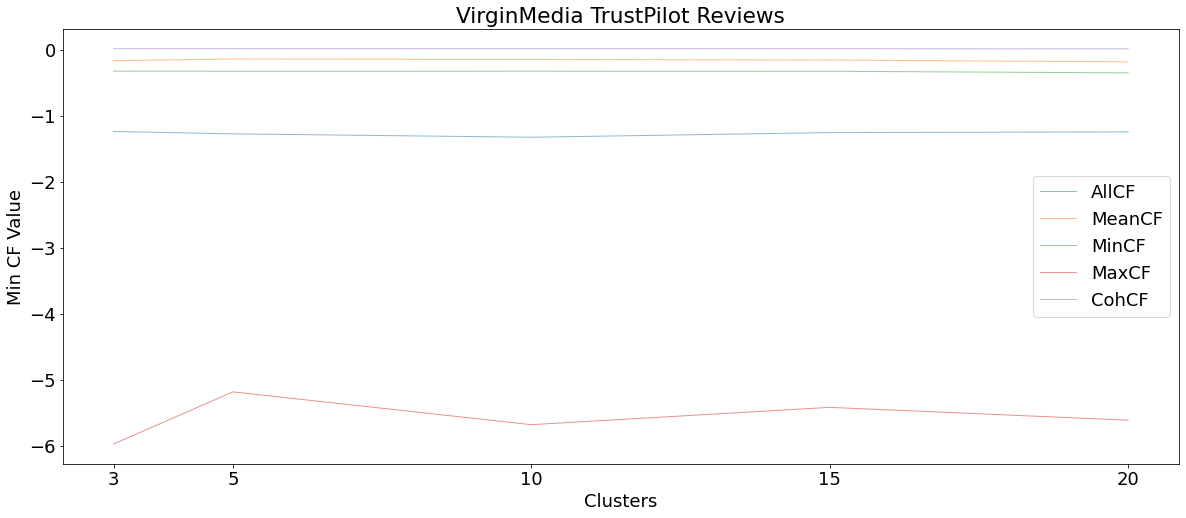

In [ ]:
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()

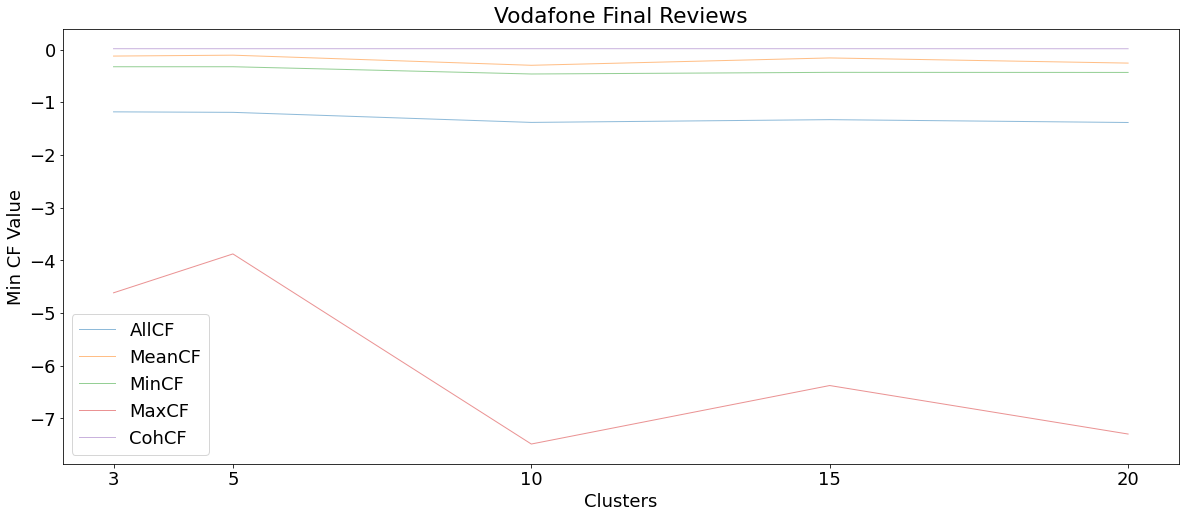

In [ ]:
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()

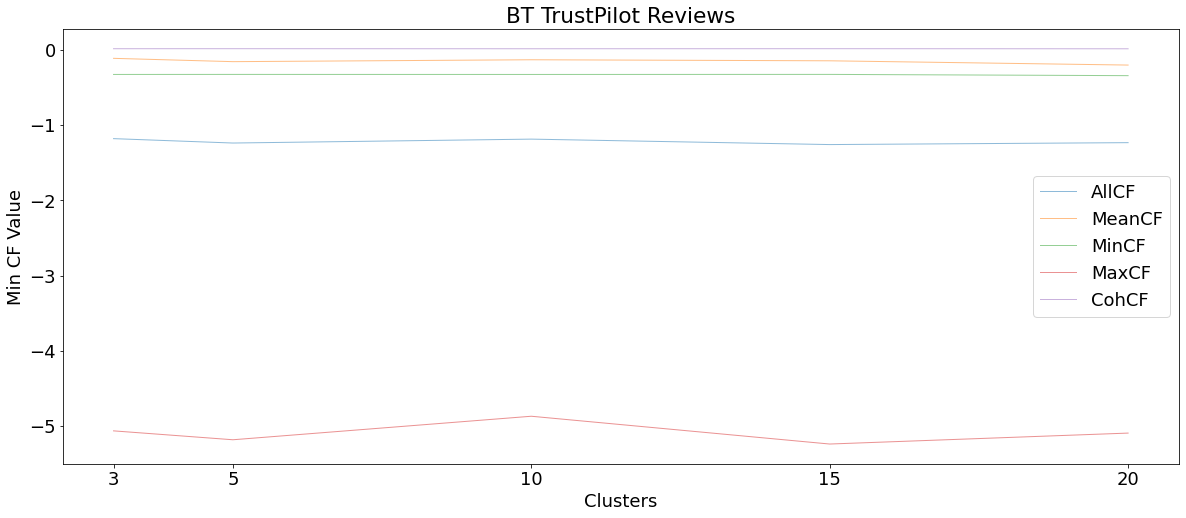

In [ ]:
k+=1
ThisData = MinCFDict[list(MinCFDict.keys())[k]]
plt.figure(figsize = (20, 8))
plt.title(list(MinCFDict.keys())[k])
plt.xlabel('Clusters')
plt.ylabel('Min CF Value')

for Type in ThisData.keys() : 
  if 'CF' in str(Type) : 
    plt.plot([3,5,10,15,20],list(ThisData[Type].values()),linewidth=1,alpha=0.5,linestyle = 'solid',label = Type) 

plt.xticks([3,5,10,15,20])
plt.legend()
plt.show()